In [ ]:
!pip install pythainlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.9/17.9 MB 25.2 MB/s eta 0:00:00


In [ ]:
!pip install thaitextaug

In [ ]:
!pip install scikeras==0.12.0

In [ ]:
from pythainlp import word_tokenize
from pythainlp.augment import WordNetAug
from pythainlp.corpus import thai_stopwords
from pythainlp.corpus import wordnet
from pythainlp.tokenize import word_tokenize as pythainlp_word_tokenize
import random

[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
import re
import pandas as pd
import numpy as np
import nltk
# Download Thai WordNet
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

# Data Preprocessing

- Data Augmentation

In [ ]:
def augment_text(text, num_sentences=1):
    tokens = word_tokenize(text, engine="newmm")
    augmented_sentences = []

    for _ in range(num_sentences):
        augmented_tokens = tokens.copy()
        for i, token in enumerate(tokens):
            if random.random() < 0.7:  # Replace 70% of the words
                aug = WordNetAug()
                synonyms = aug.augment(token)
                if synonyms:
                    synonym = random.choice(synonyms)
                    augmented_tokens[i] = synonym[0]
        augmented_sentences.append("".join(augmented_tokens))

    return augmented_sentences

def augment_file(input_file, output_file):
    with open(input_file, 'r', encoding='utf-8') as f:
        original_sentences = f.readlines()

    augmented_sentences = []
    for sentence in original_sentences:
        augmented_sentences.extend(augment_text(sentence))

    with open(output_file, 'w', encoding='utf-8') as f:
        f.writelines(original_sentences)
        f.writelines(augmented_sentences)

In [ ]:
input_file_path = '/content/THHam.txt'
output_file_path = '/content/ham_aug.txt'
augment_file(input_file_path, output_file_path)

In [ ]:
input_file_path = '/content/THFraud.txt'
output_file_path = '/content/fraud_aug.txt'
augment_file(input_file_path, output_file_path)

In [ ]:
import csv

# Function to read text file, drop duplicates, and convert to CSV
def txt_to_csv(input_file, output_file, label):
    with open(input_file, 'r') as txtfile:
        lines = txtfile.readlines()

    # Remove duplicates
    lines = list(set(lines))

    # Add label to each line
    labeled_data = [(line.strip(), label) for line in lines]

    # Write data to CSV
    with open(output_file, 'a', newline='') as csvfile:
        writer = csv.writer(csvfile)
        # Check if the file is empty to add header
        if csvfile.tell() == 0:
            writer.writerow(['text', 'label'])  # Header
        writer.writerows(labeled_data)

# Paths to your text files
ham_txt_file = 'ham_aug.txt'
fraud_txt_file = 'fraud_aug.txt'

# Path to output merged CSV file
merged_csv_file = 'merged_data.csv'

# Convert text files to CSV and merge them
txt_to_csv(ham_txt_file, merged_csv_file, label=0)
txt_to_csv(fraud_txt_file, merged_csv_file, label=1)

print("Merge complete!")

Merge complete!


In [ ]:
# Load merged data
merged_data_path = "merged_data.csv"  # Update with your merged data file path
merged_data = pd.read_csv(merged_data_path)

In [ ]:
merged_data

,text,label
0,"บ,ชเล,ข,วันที่,เลข,คณิตศาสตร์,เวลา,เลข,คณิตศาส...",0
1,"แจก,โทรศัพท์มือถือ,เอา,ปีใหม่,ฟรี,เลข,เฉพาะ,คณ...",0
2,"เชียร์,มันส์,ทะลุ,จอ,ซื้อ,เก่า,ลด,เลย,ตัวเลข,ต...",0
3,"รับ,โค้ด,ส่ง,ฟรี,เลข,ใบ,เฉพาะ,คุณ,รีบ,ใช้,เลย,...",0
4,"ทรู,พอยท์,แลก,ลุ้น,ร่ำรวย,แจก,ใหญ่,ที่ทำด้วยทอ...",0
...,...,...
1354,"สวัสดี,ค่ะ,เนื่องจาก,คุณ,เป็น,ผู้ใช้,ที่,มีประ...",1
1355,"ยินดี,ด้วย,คุณ,เป็น,ผู้,ออกความเห็น,ทำเครื่องห...",1
1356,"พิเศษ,เฉพาะ,คุณ,ปาน,นภา,รับ,ฟรี,ส่วนลด,รวม,มูล...",1
1357,"รับ,ส่วนลด,ยู,นิ,ลี,เวอร์,สูงสุด,เลขที่,และ,ยก...",1


In [ ]:
merged_data.dropna(inplace=True)

In [ ]:
duplicate_rows = merged_data[merged_data.duplicated()]

# Print the duplicate rows
print("Duplicate rows:")
print(duplicate_rows)

# Check the number of duplicate rows
print("Number of duplicate rows:", len(duplicate_rows))

Duplicate rows:
Empty DataFrame
Columns: [text, label]
Index: []
Number of duplicate rows: 0


In [ ]:
merged_data = merged_data.sample(frac=1, random_state=42)  # Shuffle the DataFrame

# Print the shuffled DataFrame
print("Shuffled DataFrame:")
print(merged_data)

Shuffled DataFrame:
                                                   text  label
51    ควง,กลุ่มคน,เย้าหยอก,ฟรี,มี,เงินรางวัล,เล่นดนต...      0
1100  คุณ,บรรจุ,เงินเดือน,เลข,เข้าบัญชี,แล้ว,เข้า,ซิ...      1
1312  โชคดี,จอดรับ,ราคา,โทรศัพท์หา,ฟรี,คณิตศาสตร์,พร...      1
514   สาย,บิ,วตี้,อัป,ความ,สวย,ความงาม,ได้,ตลอด,ทั้ง...      0
927   ฝาก,เลข,รับ,เลข,แตก,หนัก,จัด,เต็ม,แตก,ง่าย,เลข...      1
...                                                 ...    ...
1096    กสิกร,ให้,คุณ,ยื่น,กู้,เลข,เลข,ใช้,สิทธิ์,ลิงก์      1
1131            เป็นเจ้าของ,พัสดุ,ตกค้าง,จาก,ต่างประเทศ      1
1295  ด่วน,ๆ,ตอนนี้,ไซต์,ปรับ,ปะทุ,รับ,ทุก,u,ส,เว็บไ...      1
861   อุปกรณ์เล่นเกม,ส,ใหม่,มา,เพียบ,ตีด้วยเครื่องตี...      1
1127  อนุมัติ,ภายในประเทศ,เลข,ยี่สิบสี่ชั่วโมง,ติดต่...      1

[1358 rows x 2 columns]


In [ ]:
merged_data

,text,label
51,"ควง,กลุ่มคน,เย้าหยอก,ฟรี,มี,เงินรางวัล,เล่นดนต...",0
1100,"คุณ,บรรจุ,เงินเดือน,เลข,เข้าบัญชี,แล้ว,เข้า,ซิ...",1
1312,"โชคดี,จอดรับ,ราคา,โทรศัพท์หา,ฟรี,คณิตศาสตร์,พร...",1
514,"สาย,บิ,วตี้,อัป,ความ,สวย,ความงาม,ได้,ตลอด,ทั้ง...",0
927,"ฝาก,เลข,รับ,เลข,แตก,หนัก,จัด,เต็ม,แตก,ง่าย,เลข...",1
...,...,...
1096,"กสิกร,ให้,คุณ,ยื่น,กู้,เลข,เลข,ใช้,สิทธิ์,ลิงก์",1
1131,"เป็นเจ้าของ,พัสดุ,ตกค้าง,จาก,ต่างประเทศ",1
1295,"ด่วน,ๆ,ตอนนี้,ไซต์,ปรับ,ปะทุ,รับ,ทุก,u,ส,เว็บไ...",1
861,"อุปกรณ์เล่นเกม,ส,ใหม่,มา,เพียบ,ตีด้วยเครื่องตี...",1


In [ ]:
# Assuming df is your DataFrame with two classes: '0' and '1'
minority_class = merged_data[merged_data['label'] == 1]
majority_class = merged_data[merged_data['label'] == 0]

# Determine the number of samples in the minority class
num_minority_samples = len(minority_class)

# Sample from the majority class to match the number of samples in the minority class
downsampled_majority_class = majority_class.sample(n=num_minority_samples, random_state=42)

# Concatenate the minority class DataFrame with the downsampled majority class DataFrame
merged_data = pd.concat([minority_class, downsampled_majority_class])

# Shuffle the balanced DataFrame (optional)
merged_data = merged_data.sample(frac=1, random_state=42)

# Print the balanced DataFrame
print(merged_data)


                                                   text  label
650   ตัวเลข,แม็ท,เซ,ลลต,สับ,รับ,ซัมเมอร์,คูปอง,ลด,ส...      0
876   จก,หนัก,จัดให้เป็นระเบียบ,เต็ม,ทดลอง,ฟรี,แม็ท,...      1
1073  ลิงก์,คลิก,รับ,ฟรี,คณิตศาสตร์,บาท,และ,สามารถ,ถ...      1
1309             ไพ,รส์รัฟ,รี,เครดิต,ทัทีเเค่คลิ๊,ลิงก์      1
745   พัสดุ,ของ,คุณ,ไม่,ได้รับ,การจัดส่ง,สินค้า,กรุณ...      1
...                                                 ...    ...
17    ลด,ฉ่ำ,ตาข่าย,เลข,คณิต,บ.,แม็ท,กลางวัน,จาก,เลข...      0
586           รหัส,ของ,คุณ,คือ,เลข,รหัส,มีอายุ,เลข,นาที      0
64    เลข,แม็ท,ซิม,อินเทอร์เน็ต,รายปี,หาร,เดือน,ละ,แ...      0
54    คุณ,สามารถ,กลายเป็น,มา,จ่าย,ง่ายๆ,ทำได้,ด้วยตั...      0
607   ลุ้น,เป็น,เศรษฐี,กด,เลข,สมัคร,บริการ,สุขภาพ,เล...      0

[1330 rows x 2 columns]


In [ ]:
merged_data['label'].value_counts()

label
0    665
1    665
Name: count, dtype: int64

In [ ]:
merged_data["processed_sentence"] = merged_data["text"].apply(lambda x: pythainlp_word_tokenize(x, engine='newmm'))


In [ ]:
merged_data["processed_sentence"]  = merged_data["processed_sentence"] .apply(' '.join)

In [ ]:
merged_data["processed_sentence"] = merged_data["processed_sentence"].apply(lambda x: ' '.join(x.split(',')))

In [ ]:
merged_data

,text,label,processed_sentence
650,"ตัวเลข,แม็ท,เซ,ลลต,สับ,รับ,ซัมเมอร์,คูปอง,ลด,ส...",0,ตัวเลข แม็ท เซ ลลต สับ รับ ซัมเมอร...
876,"จก,หนัก,จัดให้เป็นระเบียบ,เต็ม,ทดลอง,ฟรี,แม็ท,...",1,จก หนัก จัด ให้ เป็นระเบียบ เต็ม ทดลอง...
1073,"ลิงก์,คลิก,รับ,ฟรี,คณิตศาสตร์,บาท,และ,สามารถ,ถ...",1,ลิงก์ คลิก รับ ฟรี คณิตศาสตร์ บาท ...
1309,"ไพ,รส์รัฟ,รี,เครดิต,ทัทีเเค่คลิ๊,ลิงก์",1,ไพ รส์รัฟ รี เครดิต ทัทีเเค่คลิ๊ ลิงก์
745,"พัสดุ,ของ,คุณ,ไม่,ได้รับ,การจัดส่ง,สินค้า,กรุณ...",1,พัสดุ ของ คุณ ไม่ ได้รับ การจัดส่ง ...
...,...,...,...
17,"ลด,ฉ่ำ,ตาข่าย,เลข,คณิต,บ.,แม็ท,กลางวัน,จาก,เลข...",0,ลด ฉ่ำ ตาข่าย เลข คณิต บ. แม็ท ก...
586,"รหัส,ของ,คุณ,คือ,เลข,รหัส,มีอายุ,เลข,นาที",0,รหัส ของ คุณ คือ เลข รหัส มีอายุ ...
64,"เลข,แม็ท,ซิม,อินเทอร์เน็ต,รายปี,หาร,เดือน,ละ,แ...",0,เลข แม็ท ซิม อินเทอร์เน็ต รายปี หาร ...
54,"คุณ,สามารถ,กลายเป็น,มา,จ่าย,ง่ายๆ,ทำได้,ด้วยตั...",0,คุณ สามารถ กลายเป็น มา จ่าย ง่ายๆ ...


- Data Cleansing

In [ ]:
def change_word_thai(sms):
    regex = r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))"
    sms = re.sub(regex, 'ลิงก์', sms)
    sms= re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b','อีเมล์ ',sms)
    sms = re.sub(r'\b(?:\d{3}[-\.\s]??\d{3}[-\.\s]??\d{4}|\d{10})\b', 'เบอร์', sms)
    sms = re.sub(r'\b(?:\d{3}[-\.\s]??\d{7})\b', 'เบอร์', sms)
    sms = re.sub(r'\b(?:\d{2}[-\.\s]??\d{3}[-\.\s]??\d{4}|\d{9})\b', 'เบอร์', sms)
    sms = re.sub(r'\b\d{10}\b', 'เบอร์', sms)
    sms = re.sub(r'\b\d{9}\b', 'เบอร์', sms)
    sms = re.sub(r'\d+', 'เลข', sms)
    sms = re.sub(r'[£$฿]', 'ค่าเงิน', sms)
    sms = re.sub(r'id', 'ไอ', sms)
    sms = re.sub(r'[\"]', ' ', sms)
    sms = re.sub(r'line', 'ไลน์', sms)
    to_remov = {
                  "กู้":"กู้",
                  "ม.ค.":"มกราคม", "ก.พ.":"กุมภาพันธ์", "มี.ค.":"มีนาคม", "เม.ย.":"เมษายน",
                  "พ.ค.":"พฤษภาคม", "มิ.ย.":"มิถุนายน", "ก.ค.":"กรกฎาคม", "ส.ค.":"สิงหาคม",
                  "ก.ย.":"กันยายน", "ต.ค.":"ตุลาคม", "พ.ย.":"พฤศจิกายน", "ธ.ค.":"ธันวาคม",
                  "ขค.":"ข้อความ", "จ.":"จังหวัด","บ.":"บาท", "ต.":"ตำบล", "ธ.":"ธนาคาร"
                  }
    for char in to_remov.keys():
      sms = sms.replace(char, to_remov[char])
    pattern = re.compile(r"[^\u0E00-\u0E7F]+")  # Only match non-Thai characters
    sms = re.sub(pattern, ' ', sms)  # Replace non-Thai characters with space
    return sms

In [ ]:
# Create a new column 'change_sms' by applying the function to 'sms' column
merged_data["processed_sentence"]  = merged_data["processed_sentence"].apply(lambda x:  change_word_thai(x))


In [ ]:
merged_data

,text,label,processed_sentence
650,"ตัวเลข,แม็ท,เซ,ลลต,สับ,รับ,ซัมเมอร์,คูปอง,ลด,ส...",0,ตัวเลข แม็ท เซ ลลต สับ รับ ซัมเมอร์ คูปอง ลด ส...
876,"จก,หนัก,จัดให้เป็นระเบียบ,เต็ม,ทดลอง,ฟรี,แม็ท,...",1,จก หนัก จัด ให้ เป็นระเบียบ เต็ม ทดลอง ฟรี แม็...
1073,"ลิงก์,คลิก,รับ,ฟรี,คณิตศาสตร์,บาท,และ,สามารถ,ถ...",1,ลิงก์ คลิก รับ ฟรี คณิตศาสตร์ บาท และ สามารถ ถ...
1309,"ไพ,รส์รัฟ,รี,เครดิต,ทัทีเเค่คลิ๊,ลิงก์",1,ไพ รส์รัฟ รี เครดิต ทัทีเเค่คลิ๊ ลิงก์
745,"พัสดุ,ของ,คุณ,ไม่,ได้รับ,การจัดส่ง,สินค้า,กรุณ...",1,พัสดุ ของ คุณ ไม่ ได้รับ การจัดส่ง สินค้า กรุณ...
...,...,...,...
17,"ลด,ฉ่ำ,ตาข่าย,เลข,คณิต,บ.,แม็ท,กลางวัน,จาก,เลข...",0,ลด ฉ่ำ ตาข่าย เลข คณิต บาท แม็ท กลางวัน จาก เล...
586,"รหัส,ของ,คุณ,คือ,เลข,รหัส,มีอายุ,เลข,นาที",0,รหัส ของ คุณ คือ เลข รหัส มีอายุ เลข นาที
64,"เลข,แม็ท,ซิม,อินเทอร์เน็ต,รายปี,หาร,เดือน,ละ,แ...",0,เลข แม็ท ซิม อินเทอร์เน็ต รายปี หาร เดือน ละ แ...
54,"คุณ,สามารถ,กลายเป็น,มา,จ่าย,ง่ายๆ,ทำได้,ด้วยตั...",0,คุณ สามารถ กลายเป็น มา จ่าย ง่ายๆ ทำได้ ด้วยตั...


In [ ]:
# Select the row index for processing
n = 1

# Split the text into words
words = merged_data['processed_sentence'][n].split()

# Count the number of words
word_count = len(words)

# Print the original text, word count, and the list of words
print("sms: ", merged_data['processed_sentence'][n])
print("\ncount: ", word_count)
print("nltk: ", words)


sms:  แจก โทรศัพท์มือถือ เอา ปีใหม่ ฟรี เลข เฉพาะ คณิตศาสตร์ เดือน ธันวาคม แม็ท บรรเลง ฟรี จุด ทรู ไอ ถุงน้ำดี คลิก เลย ลิงก์

count:  20
nltk:  ['แจก', 'โทรศัพท์มือถือ', 'เอา', 'ปีใหม่', 'ฟรี', 'เลข', 'เฉพาะ', 'คณิตศาสตร์', 'เดือน', 'ธันวาคม', 'แม็ท', 'บรรเลง', 'ฟรี', 'จุด', 'ทรู', 'ไอ', 'ถุงน้ำดี', 'คลิก', 'เลย', 'ลิงก์']


In [ ]:
# Calculate the number of words in each text
merged_data['num_words'] = merged_data['processed_sentence'].apply(lambda x: len(x.split()))

# Find the row with the maximum number of words
max_words_row = merged_data.loc[merged_data['num_words'].idxmax()]

# Print the text in the row with the maximum number of words
print("Text in the row with the maximum number of words:")
print(max_words_row['processed_sentence'])

# Print the number of words in the row with the maximum number of words
print("Number of words in the row with the maximum number of words:", max_words_row['num_words'])

# Store the maximum number of words for further use
max_len = max_words_row['num_words']

Text in the row with the maximum number of words:
ได้รับ สมัครงาน แพ ลตฟอร์ ออนไลน์ ไม่ เติม เวลา ทำ เติม เวลา ก็ สามารถ ทำได้ แค่ ใช้ โทรศัพท์ ติด ตามตัว เครื่องคอมพิวเตอร์ ส่วนย่อย งาน รับซื้อ ของ ตามคำสั่ง จ่าย ใต้โต๊ะ ออนไลน์ เงิน จะ ได้รับ เป็น ชั่วโมง เลข เลข ค่าเงิน ธาตุ เงิน จะ ออก มอบ ต่อ ช่วง วัน ยิ่ง ผลิต เยอะ ยิ่ง ได้รับ เยอะ สถานที่ทำงาน ที่ บ้าน สามารถ ทำงาน ดิน ที่ บ้าน ได้ ภาวะ การทำงาน เวลาว่าง ก็ ทำได้ แต่ ต้อง ดู มือถือ ด้วย เรา ยินดี ตอบรับ คน ที่ มี งานประจำ การ เป็นอยู่ แม่ศรี เรือน คนตกงาน หรือ คน กระทำ พาร์ทไทม์ ใครก็ตาม สถานที่ ไม่ มีประสบการณ์ ก็ ทำได้ ค่ะ ไม่ กระทบ ต่อ งานหลัก การทำงาน ก็ ง่าย ต่อ คุณ หาก คุณ สนใจ งานติดต่อ ได้ที่ หรือ เบอร์โทรศัพท์ เบอร์
Number of words in the row with the maximum number of words: 109


- import file of final dataset

In [ ]:
merged_data.to_csv('final_data_th.csv', index=False, encoding='utf-8-sig')

In [ ]:
# Load file
final_df_path = "final_data_th.csv"
final_df = pd.read_csv(final_df_path)

In [ ]:
import _utils as fn
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.layers import Embedding, Dense,Dropout,Flatten,Bidirectional, LSTM, SimpleRNN, Conv1D, MaxPooling1D,GlobalMaxPooling1D
from keras.layers import GRU
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

In [ ]:
final_df['processed_sentence'][1]

'จก หนัก จัด ให้ เป็นระเบียบ เต็ม ทดลอง ฟรี แม็ท แม็ท ลิงก์'

- Word Embedding

In [ ]:
print("max_len: ", max_len)

max_len:  109


In [ ]:
#Splitting the data into dependent and independent variables i.e, features and the target columns
X = final_df['processed_sentence']
Y =  final_df['label']

#Splitting the data such that 20% will be used for testing and the remaining 82% will be used for training.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)


In [ ]:
len(X_train),len(Y_train),len(X_test),len(Y_test)

(1064, 1064, 266, 266)

In [ ]:
X_train = [str(text) if pd.notnull(text) else '' for text in X_train]

# Creating a Tokenizer and fitting it on the cleaned text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# Defining special tokens and updating the tokenizer's word index
special_vocab = {'<PAD>': 0, '<START>': 1, '<UNKNOWN>': 2, '<UNUSED>': 3}
tokenizer.word_index = {**special_vocab, **{word: index + 3 for word, index in tokenizer.word_index.items()}}


In [ ]:
tokenizer.word_index

{'<PAD>': 0,
 '<START>': 1,
 '<UNKNOWN>': 2,
 '<UNUSED>': 3,
 'เลข': 4,
 'ลิงก์': 5,
 'บาท': 6,
 'คุณ': 7,
 'คลิก': 8,
 'ฟรี': 9,
 'รับ': 10,
 'ที่': 11,
 'ทรู': 12,
 'คณิตศาสตร์': 13,
 'แม็ท': 14,
 'ได้': 15,
 'คณิต': 16,
 'ตัวเลข': 17,
 'สมัคร': 18,
 'ไม่': 19,
 'เลย': 20,
 'จาก': 21,
 'และ': 22,
 'วัน': 23,
 'ของ': 24,
 'กด': 25,
 'การ': 26,
 'มี': 27,
 'ให้': 28,
 'ไอ': 29,
 'ใช้': 30,
 'ด้วย': 31,
 'ได้รับ': 32,
 'แล้ว': 33,
 'ติดต่อ': 34,
 'ดี': 35,
 'หรือ': 36,
 'ลด': 37,
 'เพียง': 38,
 'เดือน': 39,
 'พอยท์': 40,
 'ลุ้น': 41,
 'สูงสุด': 42,
 'เป็น': 43,
 'เพื่อ': 44,
 'แจก': 45,
 'แอ': 46,
 'บริการ': 47,
 'เน็ต': 48,
 'เบอร์': 49,
 'ทุก': 50,
 'จ่าย': 51,
 'เล่น': 52,
 'ใน': 53,
 'ส่ง': 54,
 'ละ': 55,
 'สิทธิ์': 56,
 'พิเศษ': 57,
 'โทร': 58,
 'ส่วนลด': 59,
 'เฉพาะ': 60,
 'พร้อม': 61,
 'แลก': 62,
 'ผ่าน': 63,
 'วันที่': 64,
 'เลขที่': 65,
 'ท่าน': 66,
 'นี้': 67,
 'เพิ่มเติม': 68,
 'ป': 69,
 'เงิน': 70,
 'ค่า': 71,
 'ประกัน': 72,
 'ยินดี': 73,
 'มา': 74,
 'ถึง': 75,
 'กรุณา': 76,

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
print("Total words", vocab_size)

Total words 2137


In [ ]:
X_train = [[1] + [tokenizer.word_index.get(word, 2) for word in sentence.split()] for sentence in X_train]
X_test = [[1] + [tokenizer.word_index.get(word, 2) for word in sentence.split()] for sentence in X_test]

In [ ]:
# Pad sequences in X_train and X_test directly
x_train = pad_sequences(X_train, maxlen=max_len)
x_test = pad_sequences(X_test, maxlen=max_len)

In [ ]:
x_train

array([[   0,    0,    0, ...,    4,   16,    6],
       [   0,    0,    0, ...,  669, 1030,  111],
       [   0,    0,    0, ...,    4,    8,    5],
       ...,
       [   0,    0,    0, ...,    8,   20,    5],
       [   0,    0,    0, ...,   68,    8,    5],
       [   0,    0,    0, ...,  129,    8,    5]], dtype=int32)

In [ ]:
# Get all the words in the model
word_index = tokenizer.word_index
vocab = [word for word, idx in word_index.items()]

# Create a file text_classification_vocab.txt
with open('thai_text_classification_vocab.txt', 'w') as f:
    for i, word in enumerate(vocab):
        f.write(f"{word} {i}\n")


- Data for test

In [ ]:
test_data = pd.read_csv('exported_test_data.csv')


In [ ]:
# Convert text data in X_train to sequences of integers and pad them to maxlen
testdata = [[1] + [tokenizer.word_index.get(word, 2) for word in sentence.split()] for sentence in test_data['processed_sentence']]
testdata = pad_sequences(testdata, maxlen=max_len)
labeltest = test_data['label'].values

-

In [ ]:
# Train the model with early stopping
callbacks = [
    EarlyStopping(monitor='val_loss', patience=3,verbose=1,restore_best_weights=True, )
]


# Grid Search

# LSTM

- Use Gridsearch

In [ ]:
# Define a function to create the Keras model

def create_model_lstm():
    model = Sequential()
    # Add layers to the model
    model.add(Embedding(input_dim=vocab_size, output_dim=max_len, input_length=max_len))
    model.add(LSTM(32, return_sequences=True))
    model.add(Dropout(0.5))
    model.add(LSTM(32))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model with the specified optimizer
    model.compile(optimizer ='adam',loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create a KerasClassifier wrapper for use in GridSearchCV
lstm_grid = KerasClassifier(build_fn=create_model_lstm, verbose=1)

# Define the parameters to search
param_grid = {
    # Define the hyperparameters to search
    'epochs': [10, 20, 30],
    'batch_size': [32, 64, 128]
}


In [ ]:
# Create the GridSearchCV object
lstm_grid_search = GridSearchCV(estimator=lstm_grid, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1)

# Fit the grid search to the training data with early stopping callback
lstm_grid_search.fit(x_train, Y_train, validation_data=(x_test, Y_test), callbacks=callbacks)


Fitting 3 folds for each of 9 candidates, totalling 27 fits


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
23/23 [==============================] - 9s 212ms/step - loss: 0.6813 - accuracy: 0.6460 - val_loss: 0.6450 - val_accuracy: 0.6729
Epoch 2/10
23/23 [==============================] - 3s 109ms/step - loss: 0.5645 - accuracy: 0.7560 - val_loss: 0.4559 - val_accuracy: 0.8158
Epoch 3/10
23/23 [==============================] - 2s 109ms/step - loss: 0.3812 - accuracy: 0.8745 - val_loss: 0.3245 - val_accuracy: 0.8647
Epoch 4/10
23/23 [==============================] - 3s 112ms/step - loss: 0.1920 - accuracy: 0.9633 - val_loss: 0.2455 - val_accuracy: 0.8985
Epoch 5/10
23/23 [==============================] - 2s 101ms/step - loss: 0.1240 - accuracy: 0.9732 - val_loss: 0.2269 - val_accuracy: 0.9248
Epoch 6/10
23/23 [==============================] - 4s 169ms/step - loss: 0.0807 - accuracy: 0.9831 - val_loss: 0.2034 - val_accuracy: 0.9173
Epoch 7/10
23/23 [==============================] - 3s 131ms/step - loss: 0.0651 - accuracy: 0.9845 - val_loss: 0.2689 - val_accuracy: 0.9098
Epoch 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
23/23 [==============================] - 8s 146ms/step - loss: 0.6870 - accuracy: 0.5853 - val_loss: 0.6575 - val_accuracy: 0.7970
Epoch 2/10
23/23 [==============================] - 3s 110ms/step - loss: 0.5592 - accuracy: 0.7842 - val_loss: 0.4430 - val_accuracy: 0.8195
Epoch 3/10
23/23 [==============================] - 3s 136ms/step - loss: 0.3329 - accuracy: 0.9083 - val_loss: 0.2932 - val_accuracy: 0.8722
Epoch 4/10
23/23 [==============================] - 4s 154ms/step - loss: 0.1493 - accuracy: 0.9619 - val_loss: 0.2250 - val_accuracy: 0.9023
Epoch 5/10
23/23 [==============================] - 2s 106ms/step - loss: 0.0968 - accuracy: 0.9803 - val_loss: 0.1906 - val_accuracy: 0.9398
Epoch 6/10
23/23 [==============================] - 3s 111ms/step - loss: 0.0611 - accuracy: 0.9887 - val_loss: 0.2959 - val_accuracy: 0.9135
Epoch 7/10
23/23 [==============================] - 2s 101ms/step - loss: 0.0461 - accuracy: 0.9929 - val_loss: 0.2283 - val_accuracy: 0.9361
Epoch 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
23/23 [==============================] - 9s 212ms/step - loss: 0.6471 - accuracy: 0.7085 - val_loss: 0.5463 - val_accuracy: 0.7782
Epoch 2/10
23/23 [==============================] - 2s 102ms/step - loss: 0.4431 - accuracy: 0.8310 - val_loss: 0.4183 - val_accuracy: 0.8421
Epoch 3/10
23/23 [==============================] - 2s 109ms/step - loss: 0.2454 - accuracy: 0.9338 - val_loss: 0.3290 - val_accuracy: 0.8872
Epoch 4/10
23/23 [==============================] - 3s 111ms/step - loss: 0.1432 - accuracy: 0.9606 - val_loss: 0.2896 - val_accuracy: 0.9135
Epoch 5/10
23/23 [==============================] - 3s 122ms/step - loss: 0.0859 - accuracy: 0.9789 - val_loss: 0.2767 - val_accuracy: 0.9173
Epoch 6/10
23/23 [==============================] - 4s 158ms/step - loss: 0.0621 - accuracy: 0.9845 - val_loss: 0.2373 - val_accuracy: 0.9173
Epoch 7/10
23/23 [==============================] - 3s 111ms/step - loss: 0.0410 - accuracy: 0.9958 - val_loss: 0.2608 - val_accuracy: 0.9211
Epoch 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
23/23 [==============================] - 8s 145ms/step - loss: 0.6751 - accuracy: 0.6178 - val_loss: 0.6016 - val_accuracy: 0.7857
Epoch 2/20
23/23 [==============================] - 3s 138ms/step - loss: 0.4913 - accuracy: 0.8223 - val_loss: 0.3854 - val_accuracy: 0.8459
Epoch 3/20
23/23 [==============================] - 4s 152ms/step - loss: 0.2715 - accuracy: 0.9083 - val_loss: 0.2382 - val_accuracy: 0.9023
Epoch 4/20
23/23 [==============================] - 3s 112ms/step - loss: 0.1581 - accuracy: 0.9591 - val_loss: 0.2080 - val_accuracy: 0.9173
Epoch 5/20
23/23 [==============================] - 2s 109ms/step - loss: 0.1031 - accuracy: 0.9774 - val_loss: 0.2460 - val_accuracy: 0.9286
Epoch 6/20
23/23 [==============================] - 3s 109ms/step - loss: 0.0539 - accuracy: 0.9887 - val_loss: 0.3059 - val_accuracy: 0.9286
Epoch 7/20
23/23 [==============================] - 3s 149ms/step - loss: 0.0380 - accuracy: 0.9944 - val_loss: 0.3487 - val_accuracy: 0.9173
Epoch 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
23/23 [==============================] - 9s 220ms/step - loss: 0.6751 - accuracy: 0.6305 - val_loss: 0.6176 - val_accuracy: 0.6842
Epoch 2/20
23/23 [==============================] - 3s 112ms/step - loss: 0.5169 - accuracy: 0.8025 - val_loss: 0.4265 - val_accuracy: 0.8271
Epoch 3/20
23/23 [==============================] - 2s 105ms/step - loss: 0.2827 - accuracy: 0.9126 - val_loss: 0.2944 - val_accuracy: 0.8797
Epoch 4/20
23/23 [==============================] - 2s 105ms/step - loss: 0.1531 - accuracy: 0.9619 - val_loss: 0.2539 - val_accuracy: 0.8947
Epoch 5/20
23/23 [==============================] - 2s 109ms/step - loss: 0.1152 - accuracy: 0.9746 - val_loss: 0.1911 - val_accuracy: 0.9211
Epoch 6/20
23/23 [==============================] - 4s 178ms/step - loss: 0.0662 - accuracy: 0.9873 - val_loss: 0.1933 - val_accuracy: 0.9361
Epoch 7/20
23/23 [==============================] - 2s 105ms/step - loss: 0.0458 - accuracy: 0.9929 - val_loss: 0.1909 - val_accuracy: 0.9361
Epoch 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
23/23 [==============================] - 7s 144ms/step - loss: 0.6787 - accuracy: 0.5676 - val_loss: 0.6382 - val_accuracy: 0.7068
Epoch 2/20
23/23 [==============================] - 3s 111ms/step - loss: 0.5703 - accuracy: 0.7845 - val_loss: 0.5115 - val_accuracy: 0.8271
Epoch 3/20
23/23 [==============================] - 4s 181ms/step - loss: 0.3893 - accuracy: 0.9014 - val_loss: 0.3033 - val_accuracy: 0.8947
Epoch 4/20
23/23 [==============================] - 2s 106ms/step - loss: 0.2018 - accuracy: 0.9662 - val_loss: 0.2254 - val_accuracy: 0.9211
Epoch 5/20
23/23 [==============================] - 2s 108ms/step - loss: 0.0982 - accuracy: 0.9789 - val_loss: 0.2729 - val_accuracy: 0.9135
Epoch 6/20
23/23 [==============================] - 2s 106ms/step - loss: 0.0639 - accuracy: 0.9859 - val_loss: 0.2794 - val_accuracy: 0.9211
Epoch 7/20
23/23 [==============================] - 3s 111ms/step - loss: 0.0519 - accuracy: 0.9887 - val_loss: 0.2812 - val_accuracy: 0.9248
Epoch 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/30
23/23 [==============================] - 10s 165ms/step - loss: 0.6884 - accuracy: 0.5642 - val_loss: 0.6661 - val_accuracy: 0.7406
Epoch 2/30
23/23 [==============================] - 3s 115ms/step - loss: 0.5867 - accuracy: 0.7729 - val_loss: 0.4568 - val_accuracy: 0.8158
Epoch 3/30
23/23 [==============================] - 3s 112ms/step - loss: 0.3619 - accuracy: 0.8900 - val_loss: 0.2944 - val_accuracy: 0.8910
Epoch 4/30
23/23 [==============================] - 3s 119ms/step - loss: 0.1896 - accuracy: 0.9591 - val_loss: 0.2436 - val_accuracy: 0.9023
Epoch 5/30
23/23 [==============================] - 4s 161ms/step - loss: 0.1273 - accuracy: 0.9760 - val_loss: 0.2143 - val_accuracy: 0.9323
Epoch 6/30
23/23 [==============================] - 2s 104ms/step - loss: 0.1020 - accuracy: 0.9732 - val_loss: 0.2195 - val_accuracy: 0.9173
Epoch 7/30
23/23 [==============================] - 3s 113ms/step - loss: 0.0611 - accuracy: 0.9873 - val_loss: 0.2817 - val_accuracy: 0.9173
Epoch

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/30
23/23 [==============================] - 8s 146ms/step - loss: 0.6871 - accuracy: 0.5599 - val_loss: 0.6590 - val_accuracy: 0.7782
Epoch 2/30
23/23 [==============================] - 4s 168ms/step - loss: 0.5720 - accuracy: 0.7898 - val_loss: 0.4431 - val_accuracy: 0.8308
Epoch 3/30
23/23 [==============================] - 3s 117ms/step - loss: 0.3405 - accuracy: 0.8984 - val_loss: 0.3148 - val_accuracy: 0.8722
Epoch 4/30
23/23 [==============================] - 2s 108ms/step - loss: 0.1972 - accuracy: 0.9577 - val_loss: 0.2262 - val_accuracy: 0.9060
Epoch 5/30
23/23 [==============================] - 3s 114ms/step - loss: 0.1216 - accuracy: 0.9746 - val_loss: 0.1957 - val_accuracy: 0.9286
Epoch 6/30
23/23 [==============================] - 2s 108ms/step - loss: 0.0745 - accuracy: 0.9817 - val_loss: 0.2109 - val_accuracy: 0.9323
Epoch 7/30
23/23 [==============================] - 4s 161ms/step - loss: 0.0747 - accuracy: 0.9845 - val_loss: 0.2060 - val_accuracy: 0.9286
Epoch 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/30
23/23 [==============================] - 9s 221ms/step - loss: 0.6776 - accuracy: 0.6366 - val_loss: 0.6240 - val_accuracy: 0.6955
Epoch 2/30
23/23 [==============================] - 3s 116ms/step - loss: 0.5137 - accuracy: 0.8056 - val_loss: 0.4269 - val_accuracy: 0.8346
Epoch 3/30
23/23 [==============================] - 3s 115ms/step - loss: 0.2989 - accuracy: 0.9070 - val_loss: 0.3209 - val_accuracy: 0.8872
Epoch 4/30
23/23 [==============================] - 3s 110ms/step - loss: 0.1488 - accuracy: 0.9676 - val_loss: 0.2819 - val_accuracy: 0.9135
Epoch 5/30
23/23 [==============================] - 3s 120ms/step - loss: 0.1069 - accuracy: 0.9803 - val_loss: 0.3274 - val_accuracy: 0.9060
Epoch 6/30
23/23 [==============================] - 4s 155ms/step - loss: 0.0802 - accuracy: 0.9817 - val_loss: 0.3030 - val_accuracy: 0.9248
Epoch 7/30
23/23 [==============================] - 3s 115ms/step - loss: 0.0471 - accuracy: 0.9901 - val_loss: 0.3379 - val_accuracy: 0.9173
Epoch 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
12/12 [==============================] - 8s 229ms/step - loss: 0.6830 - accuracy: 0.5557 - val_loss: 0.6605 - val_accuracy: 0.6015
Epoch 2/10
12/12 [==============================] - 2s 136ms/step - loss: 0.6351 - accuracy: 0.6432 - val_loss: 0.5980 - val_accuracy: 0.7632
Epoch 3/10
12/12 [==============================] - 1s 123ms/step - loss: 0.5758 - accuracy: 0.8025 - val_loss: 0.5164 - val_accuracy: 0.8383
Epoch 4/10
12/12 [==============================] - 2s 126ms/step - loss: 0.4567 - accuracy: 0.8702 - val_loss: 0.3919 - val_accuracy: 0.8835
Epoch 5/10
12/12 [==============================] - 2s 134ms/step - loss: 0.3025 - accuracy: 0.9379 - val_loss: 0.2665 - val_accuracy: 0.9098
Epoch 6/10
12/12 [==============================] - 2s 197ms/step - loss: 0.1722 - accuracy: 0.9647 - val_loss: 0.2565 - val_accuracy: 0.9135
Epoch 7/10
12/12 [==============================] - 3s 216ms/step - loss: 0.1135 - accuracy: 0.9788 - val_loss: 0.1907 - val_accuracy: 0.9286
Epoch 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
12/12 [==============================] - 11s 260ms/step - loss: 0.6859 - accuracy: 0.5233 - val_loss: 0.6664 - val_accuracy: 0.5602
Epoch 2/10
12/12 [==============================] - 2s 173ms/step - loss: 0.6335 - accuracy: 0.7207 - val_loss: 0.5860 - val_accuracy: 0.7481
Epoch 3/10
12/12 [==============================] - 2s 168ms/step - loss: 0.5334 - accuracy: 0.8251 - val_loss: 0.4714 - val_accuracy: 0.8534
Epoch 4/10
12/12 [==============================] - 3s 215ms/step - loss: 0.3895 - accuracy: 0.8872 - val_loss: 0.3644 - val_accuracy: 0.8383
Epoch 5/10
12/12 [==============================] - 3s 276ms/step - loss: 0.2565 - accuracy: 0.9323 - val_loss: 0.2549 - val_accuracy: 0.9023
Epoch 6/10
12/12 [==============================] - 3s 272ms/step - loss: 0.1542 - accuracy: 0.9704 - val_loss: 0.1810 - val_accuracy: 0.9286
Epoch 7/10
12/12 [==============================] - 2s 169ms/step - loss: 0.1004 - accuracy: 0.9788 - val_loss: 0.1635 - val_accuracy: 0.9436
Epoch

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
12/12 [==============================] - 7s 224ms/step - loss: 0.6842 - accuracy: 0.6366 - val_loss: 0.6620 - val_accuracy: 0.6391
Epoch 2/10
12/12 [==============================] - 3s 231ms/step - loss: 0.6366 - accuracy: 0.6873 - val_loss: 0.5855 - val_accuracy: 0.7895
Epoch 3/10
12/12 [==============================] - 2s 187ms/step - loss: 0.5239 - accuracy: 0.8211 - val_loss: 0.4930 - val_accuracy: 0.7970
Epoch 4/10
12/12 [==============================] - 2s 152ms/step - loss: 0.4066 - accuracy: 0.8690 - val_loss: 0.3593 - val_accuracy: 0.8609
Epoch 5/10
12/12 [==============================] - 2s 130ms/step - loss: 0.2357 - accuracy: 0.9479 - val_loss: 0.2976 - val_accuracy: 0.8985
Epoch 6/10
12/12 [==============================] - 2s 147ms/step - loss: 0.1545 - accuracy: 0.9634 - val_loss: 0.3002 - val_accuracy: 0.9060
Epoch 7/10
12/12 [==============================] - 2s 144ms/step - loss: 0.1246 - accuracy: 0.9746 - val_loss: 0.2915 - val_accuracy: 0.9173
Epoch 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
12/12 [==============================] - 7s 221ms/step - loss: 0.6872 - accuracy: 0.6135 - val_loss: 0.6680 - val_accuracy: 0.7744
Epoch 2/20
12/12 [==============================] - 2s 144ms/step - loss: 0.6369 - accuracy: 0.7475 - val_loss: 0.5753 - val_accuracy: 0.7782
Epoch 3/20
12/12 [==============================] - 3s 211ms/step - loss: 0.5391 - accuracy: 0.8138 - val_loss: 0.4610 - val_accuracy: 0.8233
Epoch 4/20
12/12 [==============================] - 2s 201ms/step - loss: 0.4034 - accuracy: 0.8717 - val_loss: 0.3459 - val_accuracy: 0.8759
Epoch 5/20
12/12 [==============================] - 2s 135ms/step - loss: 0.2399 - accuracy: 0.9478 - val_loss: 0.2252 - val_accuracy: 0.9173
Epoch 6/20
12/12 [==============================] - 1s 124ms/step - loss: 0.1835 - accuracy: 0.9492 - val_loss: 0.2078 - val_accuracy: 0.9211
Epoch 7/20
12/12 [==============================] - 2s 125ms/step - loss: 0.1305 - accuracy: 0.9704 - val_loss: 0.2065 - val_accuracy: 0.9323
Epoch 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
12/12 [==============================] - 7s 214ms/step - loss: 0.6897 - accuracy: 0.5642 - val_loss: 0.6814 - val_accuracy: 0.7105
Epoch 2/20
12/12 [==============================] - 2s 185ms/step - loss: 0.6580 - accuracy: 0.7362 - val_loss: 0.6027 - val_accuracy: 0.7895
Epoch 3/20
12/12 [==============================] - 3s 211ms/step - loss: 0.5253 - accuracy: 0.8025 - val_loss: 0.4592 - val_accuracy: 0.8233
Epoch 4/20
12/12 [==============================] - 1s 125ms/step - loss: 0.3940 - accuracy: 0.8547 - val_loss: 0.3775 - val_accuracy: 0.8571
Epoch 5/20
12/12 [==============================] - 2s 138ms/step - loss: 0.2870 - accuracy: 0.9196 - val_loss: 0.2829 - val_accuracy: 0.8910
Epoch 6/20
12/12 [==============================] - 2s 134ms/step - loss: 0.1789 - accuracy: 0.9633 - val_loss: 0.2365 - val_accuracy: 0.9098
Epoch 7/20
12/12 [==============================] - 2s 127ms/step - loss: 0.1065 - accuracy: 0.9746 - val_loss: 0.2712 - val_accuracy: 0.9023
Epoch 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
12/12 [==============================] - 8s 288ms/step - loss: 0.6828 - accuracy: 0.6310 - val_loss: 0.6541 - val_accuracy: 0.7406
Epoch 2/20
12/12 [==============================] - 2s 140ms/step - loss: 0.5928 - accuracy: 0.7789 - val_loss: 0.5137 - val_accuracy: 0.7820
Epoch 3/20
12/12 [==============================] - 2s 153ms/step - loss: 0.4320 - accuracy: 0.8296 - val_loss: 0.4340 - val_accuracy: 0.8346
Epoch 4/20
12/12 [==============================] - 2s 135ms/step - loss: 0.3238 - accuracy: 0.8915 - val_loss: 0.3587 - val_accuracy: 0.8759
Epoch 5/20
12/12 [==============================] - 2s 143ms/step - loss: 0.2125 - accuracy: 0.9479 - val_loss: 0.2983 - val_accuracy: 0.9060
Epoch 6/20
12/12 [==============================] - 2s 137ms/step - loss: 0.1651 - accuracy: 0.9606 - val_loss: 0.2970 - val_accuracy: 0.9135
Epoch 7/20
12/12 [==============================] - 2s 188ms/step - loss: 0.1230 - accuracy: 0.9690 - val_loss: 0.3132 - val_accuracy: 0.9060
Epoch 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/30
12/12 [==============================] - 8s 229ms/step - loss: 0.6870 - accuracy: 0.5388 - val_loss: 0.6689 - val_accuracy: 0.7105
Epoch 2/30
12/12 [==============================] - 1s 122ms/step - loss: 0.6430 - accuracy: 0.7165 - val_loss: 0.5960 - val_accuracy: 0.7594
Epoch 3/30
12/12 [==============================] - 2s 136ms/step - loss: 0.5544 - accuracy: 0.8152 - val_loss: 0.4942 - val_accuracy: 0.8308
Epoch 4/30
12/12 [==============================] - 2s 160ms/step - loss: 0.4362 - accuracy: 0.8646 - val_loss: 0.3739 - val_accuracy: 0.8609
Epoch 5/30
12/12 [==============================] - 3s 214ms/step - loss: 0.2905 - accuracy: 0.9267 - val_loss: 0.2629 - val_accuracy: 0.9173
Epoch 6/30
12/12 [==============================] - 2s 138ms/step - loss: 0.1775 - accuracy: 0.9633 - val_loss: 0.2016 - val_accuracy: 0.9286
Epoch 7/30
12/12 [==============================] - 2s 193ms/step - loss: 0.1171 - accuracy: 0.9788 - val_loss: 0.1845 - val_accuracy: 0.9361
Epoch 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/30
12/12 [==============================] - 8s 321ms/step - loss: 0.6866 - accuracy: 0.6333 - val_loss: 0.6704 - val_accuracy: 0.8008
Epoch 2/30
12/12 [==============================] - 2s 128ms/step - loss: 0.6420 - accuracy: 0.7504 - val_loss: 0.5824 - val_accuracy: 0.7820
Epoch 3/30
12/12 [==============================] - 2s 138ms/step - loss: 0.5254 - accuracy: 0.8237 - val_loss: 0.4431 - val_accuracy: 0.8346
Epoch 4/30
12/12 [==============================] - 2s 149ms/step - loss: 0.3702 - accuracy: 0.8717 - val_loss: 0.3719 - val_accuracy: 0.8383
Epoch 5/30
12/12 [==============================] - 2s 132ms/step - loss: 0.2632 - accuracy: 0.9267 - val_loss: 0.2849 - val_accuracy: 0.8985
Epoch 6/30
12/12 [==============================] - 2s 145ms/step - loss: 0.1616 - accuracy: 0.9633 - val_loss: 0.2444 - val_accuracy: 0.9023
Epoch 7/30
12/12 [==============================] - 2s 162ms/step - loss: 0.1453 - accuracy: 0.9661 - val_loss: 0.2162 - val_accuracy: 0.9248
Epoch 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/30
12/12 [==============================] - 7s 214ms/step - loss: 0.6861 - accuracy: 0.6493 - val_loss: 0.6636 - val_accuracy: 0.7857
Epoch 2/30
12/12 [==============================] - 2s 167ms/step - loss: 0.6245 - accuracy: 0.7690 - val_loss: 0.5600 - val_accuracy: 0.7820
Epoch 3/30
12/12 [==============================] - 3s 234ms/step - loss: 0.4818 - accuracy: 0.8437 - val_loss: 0.4127 - val_accuracy: 0.8459
Epoch 4/30
12/12 [==============================] - 2s 150ms/step - loss: 0.3222 - accuracy: 0.8972 - val_loss: 0.3478 - val_accuracy: 0.8647
Epoch 5/30
12/12 [==============================] - 2s 135ms/step - loss: 0.1947 - accuracy: 0.9549 - val_loss: 0.2908 - val_accuracy: 0.9060
Epoch 6/30
12/12 [==============================] - 2s 128ms/step - loss: 0.1517 - accuracy: 0.9634 - val_loss: 0.3301 - val_accuracy: 0.8872
Epoch 7/30
12/12 [==============================] - 2s 139ms/step - loss: 0.1205 - accuracy: 0.9704 - val_loss: 0.2595 - val_accuracy: 0.9098
Epoch 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
6/6 [==============================] - 11s 484ms/step - loss: 0.6926 - accuracy: 0.4908 - val_loss: 0.6886 - val_accuracy: 0.7632
Epoch 2/10
6/6 [==============================] - 2s 261ms/step - loss: 0.6848 - accuracy: 0.6065 - val_loss: 0.6730 - val_accuracy: 0.6955
Epoch 3/10
6/6 [==============================] - 2s 275ms/step - loss: 0.6586 - accuracy: 0.6925 - val_loss: 0.6332 - val_accuracy: 0.7105
Epoch 4/10
6/6 [==============================] - 2s 288ms/step - loss: 0.6276 - accuracy: 0.7405 - val_loss: 0.5815 - val_accuracy: 0.7594
Epoch 5/10
6/6 [==============================] - 3s 463ms/step - loss: 0.5554 - accuracy: 0.7884 - val_loss: 0.5131 - val_accuracy: 0.8195
Epoch 6/10
6/6 [==============================] - 3s 427ms/step - loss: 0.4692 - accuracy: 0.8406 - val_loss: 0.4294 - val_accuracy: 0.8271
Epoch 7/10
6/6 [==============================] - 2s 303ms/step - loss: 0.3846 - accuracy: 0.8787 - val_loss: 0.3611 - val_accuracy: 0.8647
Epoch 8/10
6/6 [===

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
6/6 [==============================] - 8s 446ms/step - loss: 0.6898 - accuracy: 0.6319 - val_loss: 0.6812 - val_accuracy: 0.7368
Epoch 2/10
6/6 [==============================] - 2s 290ms/step - loss: 0.6670 - accuracy: 0.7475 - val_loss: 0.6428 - val_accuracy: 0.8008
Epoch 3/10
6/6 [==============================] - 2s 277ms/step - loss: 0.6133 - accuracy: 0.7969 - val_loss: 0.5639 - val_accuracy: 0.7970
Epoch 4/10
6/6 [==============================] - 2s 269ms/step - loss: 0.5112 - accuracy: 0.8209 - val_loss: 0.4730 - val_accuracy: 0.8158
Epoch 5/10
6/6 [==============================] - 2s 257ms/step - loss: 0.4299 - accuracy: 0.8561 - val_loss: 0.4160 - val_accuracy: 0.8346
Epoch 6/10
6/6 [==============================] - 3s 420ms/step - loss: 0.3437 - accuracy: 0.8928 - val_loss: 0.3662 - val_accuracy: 0.8609
Epoch 7/10
6/6 [==============================] - 2s 385ms/step - loss: 0.2671 - accuracy: 0.9267 - val_loss: 0.3133 - val_accuracy: 0.8759
Epoch 8/10
6/6 [====

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
6/6 [==============================] - 8s 559ms/step - loss: 0.6825 - accuracy: 0.5070 - val_loss: 0.6638 - val_accuracy: 0.5338
Epoch 2/10
6/6 [==============================] - 1s 255ms/step - loss: 0.6532 - accuracy: 0.5746 - val_loss: 0.6282 - val_accuracy: 0.6466
Epoch 3/10
6/6 [==============================] - 1s 254ms/step - loss: 0.6162 - accuracy: 0.6817 - val_loss: 0.5974 - val_accuracy: 0.7744
Epoch 4/10
6/6 [==============================] - 2s 273ms/step - loss: 0.5807 - accuracy: 0.7577 - val_loss: 0.5563 - val_accuracy: 0.7970
Epoch 5/10
6/6 [==============================] - 2s 268ms/step - loss: 0.5174 - accuracy: 0.8451 - val_loss: 0.5038 - val_accuracy: 0.8421
Epoch 6/10
6/6 [==============================] - 2s 276ms/step - loss: 0.4399 - accuracy: 0.8944 - val_loss: 0.4387 - val_accuracy: 0.8609
Epoch 7/10
6/6 [==============================] - 2s 312ms/step - loss: 0.3587 - accuracy: 0.9338 - val_loss: 0.3574 - val_accuracy: 0.8910
Epoch 8/10
6/6 [====

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
6/6 [==============================] - 8s 673ms/step - loss: 0.6911 - accuracy: 0.5557 - val_loss: 0.6857 - val_accuracy: 0.7481
Epoch 2/20
6/6 [==============================] - 1s 209ms/step - loss: 0.6794 - accuracy: 0.6939 - val_loss: 0.6639 - val_accuracy: 0.7556
Epoch 3/20
6/6 [==============================] - 1s 243ms/step - loss: 0.6510 - accuracy: 0.7334 - val_loss: 0.6103 - val_accuracy: 0.7444
Epoch 4/20
6/6 [==============================] - 2s 264ms/step - loss: 0.5844 - accuracy: 0.7701 - val_loss: 0.5449 - val_accuracy: 0.8158
Epoch 5/20
6/6 [==============================] - 2s 263ms/step - loss: 0.5229 - accuracy: 0.8195 - val_loss: 0.4680 - val_accuracy: 0.8346
Epoch 6/20
6/6 [==============================] - 1s 232ms/step - loss: 0.4139 - accuracy: 0.8759 - val_loss: 0.3707 - val_accuracy: 0.8647
Epoch 7/20
6/6 [==============================] - 1s 230ms/step - loss: 0.2904 - accuracy: 0.9210 - val_loss: 0.3169 - val_accuracy: 0.8722
Epoch 8/20
6/6 [====

3/3 [==============================] - 1s 62ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
6/6 [==============================] - 7s 403ms/step - loss: 0.6904 - accuracy: 0.5966 - val_loss: 0.6834 - val_accuracy: 0.7932
Epoch 2/20
6/6 [==============================] - 1s 222ms/step - loss: 0.6740 - accuracy: 0.7419 - val_loss: 0.6553 - val_accuracy: 0.7669
Epoch 3/20
6/6 [==============================] - 1s 254ms/step - loss: 0.6290 - accuracy: 0.7447 - val_loss: 0.6003 - val_accuracy: 0.7368
Epoch 4/20
6/6 [==============================] - 1s 221ms/step - loss: 0.5573 - accuracy: 0.7786 - val_loss: 0.5284 - val_accuracy: 0.8195
Epoch 5/20
6/6 [==============================] - 1s 229ms/step - loss: 0.4900 - accuracy: 0.8449 - val_loss: 0.4598 - val_accuracy: 0.8459
Epoch 6/20
6/6 [==============================] - 2s 286ms/step - loss: 0.4019 - accuracy: 0.8801 - val_loss: 0.3815 - val_accuracy: 0.8571
Epoch 7/20
6/6 [==============================] - 3s 424ms/step - loss: 0.3138 - accuracy: 0.9154 - val_loss: 0.3135 - val_accuracy: 0.8722
Epoch 8/20
6/6 [====

3/3 [==============================] - 1s 63ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
6/6 [==============================] - 8s 604ms/step - loss: 0.6917 - accuracy: 0.5254 - val_loss: 0.6876 - val_accuracy: 0.7406
Epoch 2/20
6/6 [==============================] - 2s 306ms/step - loss: 0.6784 - accuracy: 0.7141 - val_loss: 0.6666 - val_accuracy: 0.7556
Epoch 3/20
6/6 [==============================] - 1s 257ms/step - loss: 0.6453 - accuracy: 0.7592 - val_loss: 0.6194 - val_accuracy: 0.7632
Epoch 4/20
6/6 [==============================] - 1s 230ms/step - loss: 0.5790 - accuracy: 0.7901 - val_loss: 0.5404 - val_accuracy: 0.8120
Epoch 5/20
6/6 [==============================] - 1s 229ms/step - loss: 0.4932 - accuracy: 0.8282 - val_loss: 0.4610 - val_accuracy: 0.8271
Epoch 6/20
6/6 [==============================] - 1s 219ms/step - loss: 0.4233 - accuracy: 0.8493 - val_loss: 0.4013 - val_accuracy: 0.8421
Epoch 7/20
6/6 [==============================] - 1s 208ms/step - loss: 0.3294 - accuracy: 0.9042 - val_loss: 0.3585 - val_accuracy: 0.8647
Epoch 8/20
6/6 [====

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/30
6/6 [==============================] - 7s 383ms/step - loss: 0.6905 - accuracy: 0.6093 - val_loss: 0.6848 - val_accuracy: 0.7256
Epoch 2/30
6/6 [==============================] - 1s 199ms/step - loss: 0.6757 - accuracy: 0.7264 - val_loss: 0.6587 - val_accuracy: 0.8008
Epoch 3/30
6/6 [==============================] - 1s 204ms/step - loss: 0.6366 - accuracy: 0.7645 - val_loss: 0.5983 - val_accuracy: 0.7744
Epoch 4/30
6/6 [==============================] - 1s 201ms/step - loss: 0.5534 - accuracy: 0.8039 - val_loss: 0.5004 - val_accuracy: 0.8233
Epoch 5/30
6/6 [==============================] - 1s 207ms/step - loss: 0.4510 - accuracy: 0.8420 - val_loss: 0.4207 - val_accuracy: 0.8271
Epoch 6/30
6/6 [==============================] - 2s 271ms/step - loss: 0.3680 - accuracy: 0.8815 - val_loss: 0.3575 - val_accuracy: 0.8647
Epoch 7/30
6/6 [==============================] - 2s 380ms/step - loss: 0.2668 - accuracy: 0.9224 - val_loss: 0.2899 - val_accuracy: 0.8947
Epoch 8/30
6/6 [====

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/30
6/6 [==============================] - 8s 489ms/step - loss: 0.6912 - accuracy: 0.5120 - val_loss: 0.6850 - val_accuracy: 0.5714
Epoch 2/30
6/6 [==============================] - 1s 197ms/step - loss: 0.6766 - accuracy: 0.6234 - val_loss: 0.6575 - val_accuracy: 0.7030
Epoch 3/30
6/6 [==============================] - 1s 217ms/step - loss: 0.6401 - accuracy: 0.6883 - val_loss: 0.6079 - val_accuracy: 0.7293
Epoch 4/30
6/6 [==============================] - 1s 257ms/step - loss: 0.5889 - accuracy: 0.7828 - val_loss: 0.5559 - val_accuracy: 0.8045
Epoch 5/30
6/6 [==============================] - 1s 228ms/step - loss: 0.5200 - accuracy: 0.8406 - val_loss: 0.4930 - val_accuracy: 0.8308
Epoch 6/30
6/6 [==============================] - 1s 212ms/step - loss: 0.4361 - accuracy: 0.8773 - val_loss: 0.4174 - val_accuracy: 0.8459
Epoch 7/30
6/6 [==============================] - 1s 204ms/step - loss: 0.3328 - accuracy: 0.9041 - val_loss: 0.3452 - val_accuracy: 0.8722
Epoch 8/30
6/6 [====

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/30
6/6 [==============================] - 6s 399ms/step - loss: 0.6901 - accuracy: 0.5113 - val_loss: 0.6813 - val_accuracy: 0.6015
Epoch 2/30
6/6 [==============================] - 2s 320ms/step - loss: 0.6633 - accuracy: 0.6099 - val_loss: 0.6464 - val_accuracy: 0.6617
Epoch 3/30
6/6 [==============================] - 2s 394ms/step - loss: 0.6282 - accuracy: 0.6423 - val_loss: 0.6037 - val_accuracy: 0.7444
Epoch 4/30
6/6 [==============================] - 1s 209ms/step - loss: 0.5881 - accuracy: 0.7563 - val_loss: 0.5666 - val_accuracy: 0.8271
Epoch 5/30
6/6 [==============================] - 1s 199ms/step - loss: 0.5341 - accuracy: 0.8479 - val_loss: 0.5151 - val_accuracy: 0.8421
Epoch 6/30
6/6 [==============================] - 1s 201ms/step - loss: 0.4868 - accuracy: 0.8845 - val_loss: 0.4519 - val_accuracy: 0.8722
Epoch 7/30
6/6 [==============================] - 1s 217ms/step - loss: 0.3858 - accuracy: 0.9310 - val_loss: 0.3665 - val_accuracy: 0.8797
Epoch 8/30
6/6 [====

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
34/34 [==============================] - 14s 196ms/step - loss: 0.6657 - accuracy: 0.6485 - val_loss: 0.5499 - val_accuracy: 0.8195
Epoch 2/10
34/34 [==============================] - 5s 139ms/step - loss: 0.4159 - accuracy: 0.8609 - val_loss: 0.3248 - val_accuracy: 0.8835
Epoch 3/10
34/34 [==============================] - 5s 134ms/step - loss: 0.1943 - accuracy: 0.9502 - val_loss: 0.2366 - val_accuracy: 0.9286
Epoch 4/10
34/34 [==============================] - 6s 185ms/step - loss: 0.1207 - accuracy: 0.9699 - val_loss: 0.2127 - val_accuracy: 0.9436
Epoch 5/10
34/34 [==============================] - 5s 137ms/step - loss: 0.0815 - accuracy: 0.9812 - val_loss: 0.2648 - val_accuracy: 0.9436
Epoch 6/10
34/34 [==============================] - 5s 138ms/step - loss: 0.0476 - accuracy: 0.9906 - val_loss: 0.2962 - val_accuracy: 0.9474
Epoch 7/10
34/34 [==============================] - 6s 180ms/step - loss: 0.0346 - accuracy: 0.9962 - val_loss: 0.2745 - val_accuracy: 0.9511
Epoch

GridSearchCV(cv=3,
             estimator=KerasClassifier(build_fn=<function create_model_lstm at 0x7d211f9870a0>),
             param_grid={'batch_size': [32, 64, 128], 'epochs': [10, 20, 30]},
             scoring='accuracy', verbose=1)

- Best Parameter

In [ ]:
# Print the best parameters found
print("Best parameters:", lstm_grid_search.best_params_)

# Print the best accuracy found
print("Best accuracy:", lstm_grid_search.best_score_)

Best parameters: {'batch_size': 32, 'epochs': 10}
Best accuracy: 0.9435956605925572


In [ ]:
# Get the best model
best_model = lstm_grid_search.best_estimator_

# Use the predict_proba method to get the predicted probabilities
y_pred_prob1 = best_model.predict_proba(x_test)

# Calculate the test loss manually using binary cross-entropy loss
from sklearn.metrics import log_loss
test_loss1 = log_loss(Y_test, y_pred_prob1)

# Print the test loss
print("Test loss of the best model:", test_loss1)


9/9 [==============================] - 1s 30ms/step
Test loss of the best model: 0.35940322986681755


- Best Accuracy

In [ ]:
from sklearn import metrics

# Print the loss and F1-score of the best model
print("best accuracy:", lstm_grid_search.best_score_)

# Get the best estimator
best_model = lstm_grid_search.best_estimator_

# Evaluate the best model on the test data
y_pred1 = best_model.predict(x_test)

# Calculate the F1-score
f1_score1 = metrics.f1_score(Y_test, y_pred1)

# Print the F1-score
print("F1-score of the best model on test data:", f1_score1)

# Print evaluation report of the best model
print("Evaluation report of the best model:")
print(metrics.classification_report(Y_test, y_pred1))


best accuracy: 0.9435956605925572
9/9 [==============================] - 0s 32ms/step
F1-score of the best model on test data: 0.9461538461538462
Evaluation report of the best model:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       133
           1       0.97      0.92      0.95       133

    accuracy                           0.95       266
   macro avg       0.95      0.95      0.95       266
weighted avg       0.95      0.95      0.95       266



- Use Best Parameter

- Model Training

In [ ]:
lstm_grid = Sequential()
lstm_grid.add(Embedding(input_dim=vocab_size, output_dim=max_len, input_length=max_len))
lstm_grid.add(LSTM(32, return_sequences=True))
lstm_grid.add(Dropout(0.5))
lstm_grid.add(LSTM(32))
lstm_grid.add(Dropout(0.5))
lstm_grid.add(Dense(32, activation='relu'))
lstm_grid.add(Dropout(0.5))
lstm_grid.add(Dense(1, activation='sigmoid'))
lstm_grid.compile(optimizer ='adam',loss='binary_crossentropy', metrics=['acc'])
lstm_grid.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_28 (Embedding)    (None, 109, 109)          232933    
                                                                 
 lstm_56 (LSTM)              (None, 109, 32)           18176     
                                                                 
 dropout_84 (Dropout)        (None, 109, 32)           0         
                                                                 
 lstm_57 (LSTM)              (None, 32)                8320      
                                                                 
 dropout_85 (Dropout)        (None, 32)                0         
                                                                 
 dense_56 (Dense)            (None, 32)                1056      
                                                                 
 dropout_86 (Dropout)        (None, 32)              

In [ ]:
history_lstm_grid = lstm_grid.fit(x_train, Y_train, epochs=10, batch_size=32,validation_data=(x_test, Y_test), callbacks=callbacks)

Epoch 1/10
34/34 [==============================] - 10s 164ms/step - loss: 0.6586 - acc: 0.6673 - val_loss: 0.5166 - val_acc: 0.7895
Epoch 2/10
34/34 [==============================] - 4s 107ms/step - loss: 0.4008 - acc: 0.8459 - val_loss: 0.3102 - val_acc: 0.8722
Epoch 3/10
34/34 [==============================] - 3s 102ms/step - loss: 0.1868 - acc: 0.9511 - val_loss: 0.2031 - val_acc: 0.9135
Epoch 4/10
34/34 [==============================] - 3s 103ms/step - loss: 0.1005 - acc: 0.9737 - val_loss: 0.1287 - val_acc: 0.9662
Epoch 5/10
34/34 [==============================] - 5s 147ms/step - loss: 0.0699 - acc: 0.9784 - val_loss: 0.1295 - val_acc: 0.9586
Epoch 6/10
34/34 [==============================] - 3s 99ms/step - loss: 0.0393 - acc: 0.9925 - val_loss: 0.3177 - val_acc: 0.9173
Epoch 7/10
34/34 [==============================] - 4s 105ms/step - loss: 0.0225 - acc: 0.9972 - val_loss: 0.2220 - val_acc: 0.9549
Epoch 7: early stopping


- Model Evaluation

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = lstm_grid.evaluate(x_test, Y_test)
print(f'Test accuracy: {test_acc * 100:.2f}%')
print(f'Test loss: {test_loss * 100:.2f}%')

9/9 [==============================] - 0s 24ms/step - loss: 0.1287 - acc: 0.9662
Test accuracy: 96.62%
Test loss: 12.87%


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred1 = lstm_grid.predict(x_test)
y_pred_binary1 = (y_pred1 > 0.5).astype(int)

conf_matrix1 = confusion_matrix(Y_test, y_pred_binary1)
print("Confusion Matrix:")
print(conf_matrix1)

classification_rep1 = classification_report(Y_test, y_pred_binary1)
print("Classification Report:")
print(classification_rep1)

9/9 [==============================] - 1s 27ms/step
Confusion Matrix:
[[128   5]
 [  4 129]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       133
           1       0.96      0.97      0.97       133

    accuracy                           0.97       266
   macro avg       0.97      0.97      0.97       266
weighted avg       0.97      0.97      0.97       266



Last train accuracy: 0.9971804618835449
Last validation accuracy: 0.9548872113227844


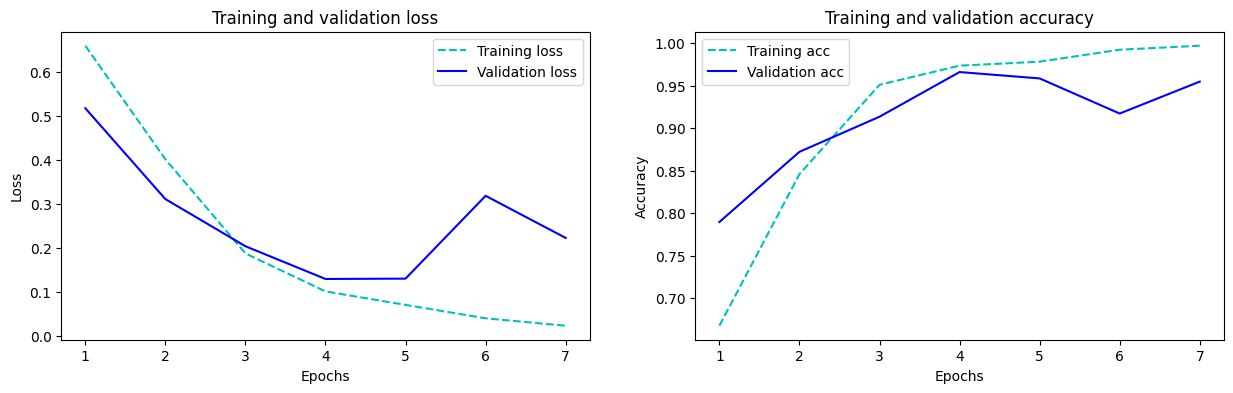

In [ ]:
fn.show_result(history_lstm_grid)

- Convert tflite model

In [ ]:
run_model = tf.function(lambda x: lstm_grid(x))
# This is important, let's fix the input size.
BATCH_SIZE = 1
STEPS =max_len

concrete_func = run_model.get_concrete_function(
    tf.TensorSpec([BATCH_SIZE,STEPS], lstm_grid.inputs[0].dtype))


# model directory.
MODEL_DIR = "keras_lstm"
lstm_grid.save(MODEL_DIR, save_format="tf", signatures=concrete_func)

converter = tf.lite.TFLiteConverter.from_saved_model(MODEL_DIR)
tflite_model = converter.convert()
# Save the TensorFlow Lite model to a file
file = open('thlstm_grid.tflite', 'wb')
file.write(tflite_model)
file.close()

In [ ]:
# Load the TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path='thlstm_grid.tflite')
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print("Input details:", input_details)
print("Output details:", output_details)

Input details: [{'name': 'serving_default_x:0', 'index': 0, 'shape': array([  1, 109], dtype=int32), 'shape_signature': array([  1, 109], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
Output details: [{'name': 'StatefulPartitionedCall:0', 'index': 44, 'shape': array([1, 1], dtype=int32), 'shape_signature': array([1, 1], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


- Check the saved Tflite model to see if it works efficiently

In [ ]:
# Load the TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path='thlstm_grid.tflite')
interpreter.allocate_tensors()

# Get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()


from sklearn.metrics import accuracy_score

# Initialize an empty list to store the predictions
predictions = []

# Iterate over each sample in the test dataset
for i in range(len(testdata)):
    # Get the input sequence for the current sample and convert it to FLOAT32
    input_sequence_float32 = testdata[i].reshape(1, -1).astype(np.float32)

    # Perform inference
    interpreter.set_tensor(input_details[0]['index'], input_sequence_float32)
    interpreter.invoke()

    # Get the output
    output_data = interpreter.get_tensor(output_details[0]['index'])

    # Convert output to binary prediction
    binary_prediction = (output_data > 0.5).astype(int)

    # Append the prediction to the list
    predictions.append(binary_prediction[0])

# accuracy for test data
accuracy1 = accuracy_score(labeltest, predictions)

# Print the accuracy for test data
print("Accuracy :", accuracy1)


Accuracy : 0.5


In [ ]:
# Display the predictions for each text
for i in range(len(test_data)):
    print("Text:", test_data['processed_sentence'][i])
    print("True Label:", labeltest[i])
    print("Predicted Label:", predictions[i])
    print()

Text: ﻿ รับ   รวม   สูงสุด   เมื่อ   ช้อป   แบรนด์   ดัง   ระดับโลก   ผ่าน   บริการ   เฉพาะ   ลูกค้า   บัตรเครดิต   วัน   สยาม   กสิกร   ไทย   เท่านั้น   ช้อป   เลย   คลิก
True Label: 1
Predicted Label: [0]

Text: สินค้า   ซ่อม   เสร็จ   แล้ว   สามารถ   ติดต่อ   รับ   สินค้า   คืน   ได้ที่   ศูนย์   บริการ
True Label: 0
Predicted Label: [1]

Text: คุณ   ได้รับ   สิทธิ์   ยื่น   สินเชื่อ   ติดต่อ
True Label: 1
Predicted Label: [1]

Text: รบกวน   ติดต่อ   ฝ่าย   บริการ   เพื่อ   ยืนยัน   รับ   ของ   ที่   ท่าน   ได้   สั่ง   ผ่าน   ทาง   บริการ   ออนไลน์
True Label: 0
Predicted Label: [1]

Text: ช้อป   ออนไลน์   ใช้   คูปอง   ลด   เพิ่ม   แล้ว   รับ   เพิ่ม   ที่   ถึง   กรกฎาคม   เท่านั้น   ช้อป   เลย   คลิก
True Label: 1
Predicted Label: [0]

Text: พิเศษ   เฉพาะ   ลูกค้า   ใหม่   รับ   คูปอง   ส่วนลด   สั่ง   พิซซ่า   หน้า   โปรด   ฟรี   ที่   แอ   ป
True Label: 0
Predicted Label: [0]

Text: ขออภัย   พัสดุ   ของ   ท่าน   จัดส่ง   ไม่   สำเร็จ   กรุณา   ตรวจสอบ   และ   ยืนยัน   การจัดส่

# BiLSTM

- Use Gridsearch

In [ ]:
# Define a function to create the Keras model
def create_model_bilstm():
    model = Sequential()
    # Add layers to the model
    model.add(Embedding(input_dim=vocab_size, output_dim=max_len, input_length=max_len))
    model.add(Bidirectional(LSTM(32, return_sequences=True)))
    model.add(Dropout(0.5))
    model.add(Bidirectional(LSTM(32)))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create a KerasClassifier wrapper for use in GridSearchCV
bilstm_grid= KerasClassifier(build_fn=create_model_bilstm, verbose=1)

# Define the parameters to search
param_grid = {
    # Define the hyperparameters to search
    'epochs': [10, 20, 30],
    'batch_size': [32, 64, 128]
}


In [ ]:
# Create the GridSearchCV object
bilstm_grid_search = GridSearchCV(estimator= bilstm_grid, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1)

# Fit the grid search to the training data with early stopping callback
bilstm_grid_search.fit(x_train, Y_train, validation_data=(x_test, Y_test), callbacks=callbacks)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
23/23 [==============================] - 17s 367ms/step - loss: 0.6812 - accuracy: 0.5726 - val_loss: 0.6312 - val_accuracy: 0.6353
Epoch 2/10
23/23 [==============================] - 5s 232ms/step - loss: 0.5483 - accuracy: 0.7870 - val_loss: 0.4193 - val_accuracy: 0.8195
Epoch 3/10
23/23 [==============================] - 7s 290ms/step - loss: 0.2998 - accuracy: 0.9097 - val_loss: 0.2431 - val_accuracy: 0.8985
Epoch 4/10
23/23 [==============================] - 5s 212ms/step - loss: 0.1224 - accuracy: 0.9718 - val_loss: 0.2383 - val_accuracy: 0.9098
Epoch 5/10
23/23 [==============================] - 5s 223ms/step - loss: 0.0565 - accuracy: 0.9915 - val_loss: 0.2272 - val_accuracy: 0.9436
Epoch 6/10
23/23 [==============================] - 7s 306ms/step - loss: 0.0294 - accuracy: 0.9944 - val_loss: 0.2862 - val_accuracy: 0.9323
Epoch 7/10
23/23 [==============================] - 5s 228ms/step - loss: 0.0204 - accuracy: 0.9929 - val_loss: 0.2937 - val_accuracy: 0.9398
Epoch

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
23/23 [==============================] - 16s 368ms/step - loss: 0.6794 - accuracy: 0.5755 - val_loss: 0.6201 - val_accuracy: 0.7218
Epoch 2/10
23/23 [==============================] - 6s 248ms/step - loss: 0.5113 - accuracy: 0.8025 - val_loss: 0.3870 - val_accuracy: 0.8534
Epoch 3/10
23/23 [==============================] - 4s 190ms/step - loss: 0.2799 - accuracy: 0.9224 - val_loss: 0.2388 - val_accuracy: 0.9211
Epoch 4/10
23/23 [==============================] - 6s 269ms/step - loss: 0.1579 - accuracy: 0.9591 - val_loss: 0.2009 - val_accuracy: 0.9248
Epoch 5/10
23/23 [==============================] - 4s 183ms/step - loss: 0.0771 - accuracy: 0.9845 - val_loss: 0.2200 - val_accuracy: 0.9398
Epoch 6/10
23/23 [==============================] - 5s 200ms/step - loss: 0.0329 - accuracy: 0.9958 - val_loss: 0.2477 - val_accuracy: 0.9474
Epoch 7/10
23/23 [==============================] - 6s 257ms/step - loss: 0.0128 - accuracy: 0.9986 - val_loss: 0.3256 - val_accuracy: 0.9398
Epoch

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
23/23 [==============================] - 16s 302ms/step - loss: 0.6838 - accuracy: 0.5521 - val_loss: 0.6442 - val_accuracy: 0.7068
Epoch 2/10
23/23 [==============================] - 5s 234ms/step - loss: 0.5813 - accuracy: 0.7437 - val_loss: 0.4908 - val_accuracy: 0.8008
Epoch 3/10
23/23 [==============================] - 4s 195ms/step - loss: 0.3469 - accuracy: 0.9042 - val_loss: 0.3096 - val_accuracy: 0.8835
Epoch 4/10
23/23 [==============================] - 5s 236ms/step - loss: 0.1624 - accuracy: 0.9592 - val_loss: 0.2388 - val_accuracy: 0.9248
Epoch 5/10
23/23 [==============================] - 5s 224ms/step - loss: 0.0841 - accuracy: 0.9775 - val_loss: 0.2596 - val_accuracy: 0.9248
Epoch 6/10
23/23 [==============================] - 4s 183ms/step - loss: 0.0588 - accuracy: 0.9887 - val_loss: 0.2034 - val_accuracy: 0.9474
Epoch 7/10
23/23 [==============================] - 6s 252ms/step - loss: 0.0306 - accuracy: 0.9972 - val_loss: 0.3795 - val_accuracy: 0.9211
Epoch

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
23/23 [==============================] - 14s 254ms/step - loss: 0.6879 - accuracy: 0.5176 - val_loss: 0.6690 - val_accuracy: 0.5075
Epoch 2/20
23/23 [==============================] - 6s 266ms/step - loss: 0.6349 - accuracy: 0.6601 - val_loss: 0.5200 - val_accuracy: 0.8120
Epoch 3/20
23/23 [==============================] - 4s 187ms/step - loss: 0.4184 - accuracy: 0.8745 - val_loss: 0.3034 - val_accuracy: 0.8797
Epoch 4/20
23/23 [==============================] - 4s 196ms/step - loss: 0.2272 - accuracy: 0.9379 - val_loss: 0.2256 - val_accuracy: 0.9248
Epoch 5/20
23/23 [==============================] - 6s 277ms/step - loss: 0.1435 - accuracy: 0.9704 - val_loss: 0.1980 - val_accuracy: 0.9248
Epoch 6/20
23/23 [==============================] - 4s 194ms/step - loss: 0.0609 - accuracy: 0.9873 - val_loss: 0.1976 - val_accuracy: 0.9436
Epoch 7/20
23/23 [==============================] - 4s 175ms/step - loss: 0.0331 - accuracy: 0.9958 - val_loss: 0.2669 - val_accuracy: 0.9286
Epoch

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
23/23 [==============================] - 16s 382ms/step - loss: 0.6691 - accuracy: 0.5825 - val_loss: 0.6029 - val_accuracy: 0.7293
Epoch 2/20
23/23 [==============================] - 5s 227ms/step - loss: 0.4850 - accuracy: 0.8223 - val_loss: 0.3967 - val_accuracy: 0.8383
Epoch 3/20
23/23 [==============================] - 7s 308ms/step - loss: 0.2978 - accuracy: 0.9196 - val_loss: 0.2799 - val_accuracy: 0.8797
Epoch 4/20
23/23 [==============================] - 5s 225ms/step - loss: 0.1674 - accuracy: 0.9591 - val_loss: 0.2303 - val_accuracy: 0.9248
Epoch 5/20
23/23 [==============================] - 6s 274ms/step - loss: 0.1106 - accuracy: 0.9788 - val_loss: 0.2492 - val_accuracy: 0.9248
Epoch 6/20
23/23 [==============================] - 5s 230ms/step - loss: 0.0651 - accuracy: 0.9887 - val_loss: 0.2429 - val_accuracy: 0.9323
Epoch 7/20
23/23 [==============================] - 5s 222ms/step - loss: 0.0382 - accuracy: 0.9929 - val_loss: 0.2604 - val_accuracy: 0.9398
Epoch

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
23/23 [==============================] - 15s 350ms/step - loss: 0.6893 - accuracy: 0.5366 - val_loss: 0.6678 - val_accuracy: 0.7218
Epoch 2/20
23/23 [==============================] - 5s 202ms/step - loss: 0.5575 - accuracy: 0.7789 - val_loss: 0.4329 - val_accuracy: 0.8383
Epoch 3/20
23/23 [==============================] - 5s 199ms/step - loss: 0.2755 - accuracy: 0.9268 - val_loss: 0.3248 - val_accuracy: 0.8797
Epoch 4/20
23/23 [==============================] - 6s 248ms/step - loss: 0.1613 - accuracy: 0.9634 - val_loss: 0.2467 - val_accuracy: 0.9173
Epoch 5/20
23/23 [==============================] - 4s 196ms/step - loss: 0.0924 - accuracy: 0.9775 - val_loss: 0.2324 - val_accuracy: 0.9323
Epoch 6/20
23/23 [==============================] - 5s 236ms/step - loss: 0.0536 - accuracy: 0.9859 - val_loss: 0.2474 - val_accuracy: 0.9398
Epoch 7/20
23/23 [==============================] - 5s 219ms/step - loss: 0.0251 - accuracy: 0.9958 - val_loss: 0.3166 - val_accuracy: 0.9323
Epoch

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/30
23/23 [==============================] - 15s 263ms/step - loss: 0.6803 - accuracy: 0.5769 - val_loss: 0.6358 - val_accuracy: 0.6165
Epoch 2/30
23/23 [==============================] - 4s 174ms/step - loss: 0.5264 - accuracy: 0.7913 - val_loss: 0.3977 - val_accuracy: 0.8534
Epoch 3/30
23/23 [==============================] - 6s 277ms/step - loss: 0.2859 - accuracy: 0.9351 - val_loss: 0.2486 - val_accuracy: 0.9135
Epoch 4/30
23/23 [==============================] - 6s 287ms/step - loss: 0.1455 - accuracy: 0.9732 - val_loss: 0.2587 - val_accuracy: 0.9135
Epoch 5/30
23/23 [==============================] - 6s 272ms/step - loss: 0.0885 - accuracy: 0.9788 - val_loss: 0.2610 - val_accuracy: 0.9323
Epoch 6/30
23/23 [==============================] - 4s 176ms/step - loss: 0.0723 - accuracy: 0.9859 - val_loss: 0.3570 - val_accuracy: 0.8872
Epoch 7/30
23/23 [==============================] - 4s 172ms/step - loss: 0.0382 - accuracy: 0.9958 - val_loss: 0.2959 - val_accuracy: 0.9361
Epoch

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/30
23/23 [==============================] - 15s 323ms/step - loss: 0.6852 - accuracy: 0.5571 - val_loss: 0.6556 - val_accuracy: 0.8120
Epoch 2/30
23/23 [==============================] - 4s 189ms/step - loss: 0.5420 - accuracy: 0.7913 - val_loss: 0.4168 - val_accuracy: 0.8308
Epoch 3/30
23/23 [==============================] - 4s 188ms/step - loss: 0.2952 - accuracy: 0.9126 - val_loss: 0.2325 - val_accuracy: 0.9023
Epoch 4/30
23/23 [==============================] - 6s 277ms/step - loss: 0.1314 - accuracy: 0.9690 - val_loss: 0.2605 - val_accuracy: 0.9286
Epoch 5/30
23/23 [==============================] - 6s 275ms/step - loss: 0.0651 - accuracy: 0.9859 - val_loss: 0.2832 - val_accuracy: 0.9361
Epoch 6/30
23/23 [==============================] - 5s 218ms/step - loss: 0.0264 - accuracy: 0.9972 - val_loss: 0.3174 - val_accuracy: 0.9398
Epoch 7/30
23/23 [==============================] - 5s 200ms/step - loss: 0.0200 - accuracy: 0.9986 - val_loss: 0.3757 - val_accuracy: 0.9361
Epoch

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/30
23/23 [==============================] - 22s 435ms/step - loss: 0.6884 - accuracy: 0.5296 - val_loss: 0.6592 - val_accuracy: 0.7331
Epoch 2/30
23/23 [==============================] - 6s 279ms/step - loss: 0.5485 - accuracy: 0.7859 - val_loss: 0.4285 - val_accuracy: 0.8271
Epoch 3/30
23/23 [==============================] - 7s 294ms/step - loss: 0.3012 - accuracy: 0.8887 - val_loss: 0.2736 - val_accuracy: 0.9060
Epoch 4/30
23/23 [==============================] - 7s 288ms/step - loss: 0.1482 - accuracy: 0.9592 - val_loss: 0.2281 - val_accuracy: 0.9323
Epoch 5/30
23/23 [==============================] - 8s 354ms/step - loss: 0.0891 - accuracy: 0.9775 - val_loss: 0.2324 - val_accuracy: 0.9398
Epoch 6/30
23/23 [==============================] - 6s 244ms/step - loss: 0.0559 - accuracy: 0.9845 - val_loss: 0.2530 - val_accuracy: 0.9361
Epoch 7/30
23/23 [==============================] - 7s 318ms/step - loss: 0.0286 - accuracy: 0.9958 - val_loss: 0.2806 - val_accuracy: 0.9398
Epoch

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
12/12 [==============================] - 14s 565ms/step - loss: 0.6905 - accuracy: 0.5190 - val_loss: 0.6784 - val_accuracy: 0.8083
Epoch 2/10
12/12 [==============================] - 3s 263ms/step - loss: 0.6439 - accuracy: 0.7504 - val_loss: 0.5709 - val_accuracy: 0.7556
Epoch 3/10
12/12 [==============================] - 3s 268ms/step - loss: 0.4837 - accuracy: 0.8039 - val_loss: 0.4197 - val_accuracy: 0.8308
Epoch 4/10
12/12 [==============================] - 3s 284ms/step - loss: 0.3528 - accuracy: 0.8801 - val_loss: 0.3015 - val_accuracy: 0.8872
Epoch 5/10
12/12 [==============================] - 5s 393ms/step - loss: 0.2046 - accuracy: 0.9436 - val_loss: 0.2505 - val_accuracy: 0.9060
Epoch 6/10
12/12 [==============================] - 4s 308ms/step - loss: 0.1190 - accuracy: 0.9690 - val_loss: 0.2238 - val_accuracy: 0.9323
Epoch 7/10
12/12 [==============================] - 3s 268ms/step - loss: 0.0907 - accuracy: 0.9817 - val_loss: 0.1972 - val_accuracy: 0.9436
Epoch

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
12/12 [==============================] - 15s 402ms/step - loss: 0.6892 - accuracy: 0.5656 - val_loss: 0.6764 - val_accuracy: 0.6692
Epoch 2/10
12/12 [==============================] - 3s 245ms/step - loss: 0.6490 - accuracy: 0.6742 - val_loss: 0.5994 - val_accuracy: 0.7105
Epoch 3/10
12/12 [==============================] - 4s 351ms/step - loss: 0.5403 - accuracy: 0.8082 - val_loss: 0.4497 - val_accuracy: 0.8346
Epoch 4/10
12/12 [==============================] - 3s 229ms/step - loss: 0.3924 - accuracy: 0.8801 - val_loss: 0.3516 - val_accuracy: 0.8496
Epoch 5/10
12/12 [==============================] - 3s 223ms/step - loss: 0.2257 - accuracy: 0.9394 - val_loss: 0.2307 - val_accuracy: 0.9173
Epoch 6/10
12/12 [==============================] - 3s 228ms/step - loss: 0.1193 - accuracy: 0.9760 - val_loss: 0.1771 - val_accuracy: 0.9361
Epoch 7/10
12/12 [==============================] - 4s 332ms/step - loss: 0.0923 - accuracy: 0.9690 - val_loss: 0.1689 - val_accuracy: 0.9586
Epoch

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
12/12 [==============================] - 13s 397ms/step - loss: 0.6895 - accuracy: 0.5394 - val_loss: 0.6751 - val_accuracy: 0.7669
Epoch 2/10
12/12 [==============================] - 4s 368ms/step - loss: 0.6382 - accuracy: 0.7310 - val_loss: 0.5633 - val_accuracy: 0.7970
Epoch 3/10
12/12 [==============================] - 3s 225ms/step - loss: 0.4792 - accuracy: 0.8338 - val_loss: 0.4281 - val_accuracy: 0.8383
Epoch 4/10
12/12 [==============================] - 3s 226ms/step - loss: 0.3287 - accuracy: 0.8930 - val_loss: 0.3446 - val_accuracy: 0.8759
Epoch 5/10
12/12 [==============================] - 3s 220ms/step - loss: 0.1822 - accuracy: 0.9507 - val_loss: 0.2673 - val_accuracy: 0.9286
Epoch 6/10
12/12 [==============================] - 4s 321ms/step - loss: 0.1245 - accuracy: 0.9718 - val_loss: 0.4775 - val_accuracy: 0.8797
Epoch 7/10
12/12 [==============================] - 4s 285ms/step - loss: 0.0868 - accuracy: 0.9803 - val_loss: 0.2321 - val_accuracy: 0.9398
Epoch

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
12/12 [==============================] - 13s 396ms/step - loss: 0.6923 - accuracy: 0.5021 - val_loss: 0.6875 - val_accuracy: 0.7932
Epoch 2/20
12/12 [==============================] - 4s 309ms/step - loss: 0.6738 - accuracy: 0.6643 - val_loss: 0.6309 - val_accuracy: 0.7932
Epoch 3/20
12/12 [==============================] - 4s 303ms/step - loss: 0.5662 - accuracy: 0.8096 - val_loss: 0.4541 - val_accuracy: 0.8346
Epoch 4/20
12/12 [==============================] - 3s 225ms/step - loss: 0.3928 - accuracy: 0.8632 - val_loss: 0.3547 - val_accuracy: 0.8609
Epoch 5/20
12/12 [==============================] - 3s 234ms/step - loss: 0.2534 - accuracy: 0.9182 - val_loss: 0.3206 - val_accuracy: 0.8872
Epoch 6/20
12/12 [==============================] - 3s 221ms/step - loss: 0.1553 - accuracy: 0.9661 - val_loss: 0.2406 - val_accuracy: 0.9173
Epoch 7/20
12/12 [==============================] - 5s 403ms/step - loss: 0.0908 - accuracy: 0.9732 - val_loss: 0.2075 - val_accuracy: 0.9361
Epoch

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
12/12 [==============================] - 15s 551ms/step - loss: 0.6929 - accuracy: 0.5106 - val_loss: 0.6818 - val_accuracy: 0.5602
Epoch 2/20
12/12 [==============================] - 5s 407ms/step - loss: 0.6495 - accuracy: 0.7010 - val_loss: 0.5764 - val_accuracy: 0.7519
Epoch 3/20
12/12 [==============================] - 4s 306ms/step - loss: 0.5244 - accuracy: 0.8025 - val_loss: 0.4309 - val_accuracy: 0.8346
Epoch 4/20
12/12 [==============================] - 4s 326ms/step - loss: 0.4100 - accuracy: 0.8463 - val_loss: 0.3710 - val_accuracy: 0.8459
Epoch 5/20
12/12 [==============================] - 7s 575ms/step - loss: 0.2593 - accuracy: 0.9351 - val_loss: 0.2639 - val_accuracy: 0.8985
Epoch 6/20
12/12 [==============================] - 4s 325ms/step - loss: 0.1624 - accuracy: 0.9690 - val_loss: 0.2577 - val_accuracy: 0.8985
Epoch 7/20
12/12 [==============================] - 4s 341ms/step - loss: 0.0953 - accuracy: 0.9831 - val_loss: 0.1934 - val_accuracy: 0.9436
Epoch

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
12/12 [==============================] - 15s 589ms/step - loss: 0.6928 - accuracy: 0.4958 - val_loss: 0.6826 - val_accuracy: 0.7556
Epoch 2/20
12/12 [==============================] - 3s 269ms/step - loss: 0.6613 - accuracy: 0.6901 - val_loss: 0.6059 - val_accuracy: 0.7406
Epoch 3/20
12/12 [==============================] - 3s 266ms/step - loss: 0.5394 - accuracy: 0.8014 - val_loss: 0.4434 - val_accuracy: 0.8308
Epoch 4/20
12/12 [==============================] - 4s 375ms/step - loss: 0.3980 - accuracy: 0.8479 - val_loss: 0.3609 - val_accuracy: 0.8609
Epoch 5/20
12/12 [==============================] - 4s 362ms/step - loss: 0.2374 - accuracy: 0.9366 - val_loss: 0.2617 - val_accuracy: 0.9098
Epoch 6/20
12/12 [==============================] - 3s 268ms/step - loss: 0.1623 - accuracy: 0.9662 - val_loss: 0.2376 - val_accuracy: 0.9248
Epoch 7/20
12/12 [==============================] - 3s 269ms/step - loss: 0.1261 - accuracy: 0.9761 - val_loss: 0.3642 - val_accuracy: 0.8910
Epoch

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/30
12/12 [==============================] - 15s 502ms/step - loss: 0.6912 - accuracy: 0.5275 - val_loss: 0.6823 - val_accuracy: 0.7970
Epoch 2/30
12/12 [==============================] - 5s 397ms/step - loss: 0.6589 - accuracy: 0.6925 - val_loss: 0.5940 - val_accuracy: 0.7782
Epoch 3/30
12/12 [==============================] - 3s 239ms/step - loss: 0.5319 - accuracy: 0.8237 - val_loss: 0.4433 - val_accuracy: 0.8195
Epoch 4/30
12/12 [==============================] - 3s 231ms/step - loss: 0.3598 - accuracy: 0.8970 - val_loss: 0.3059 - val_accuracy: 0.8910
Epoch 5/30
12/12 [==============================] - 3s 228ms/step - loss: 0.2010 - accuracy: 0.9520 - val_loss: 0.2425 - val_accuracy: 0.9173
Epoch 6/30
12/12 [==============================] - 4s 361ms/step - loss: 0.1312 - accuracy: 0.9690 - val_loss: 0.4378 - val_accuracy: 0.8684
Epoch 7/30
12/12 [==============================] - 3s 275ms/step - loss: 0.0870 - accuracy: 0.9760 - val_loss: 0.2363 - val_accuracy: 0.9323
Epoch

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/30
12/12 [==============================] - 14s 542ms/step - loss: 0.6885 - accuracy: 0.5331 - val_loss: 0.6713 - val_accuracy: 0.6955
Epoch 2/30
12/12 [==============================] - 3s 226ms/step - loss: 0.6319 - accuracy: 0.7052 - val_loss: 0.5644 - val_accuracy: 0.7895
Epoch 3/30
12/12 [==============================] - 3s 231ms/step - loss: 0.5100 - accuracy: 0.8138 - val_loss: 0.4297 - val_accuracy: 0.8383
Epoch 4/30
12/12 [==============================] - 3s 224ms/step - loss: 0.3385 - accuracy: 0.8956 - val_loss: 0.3393 - val_accuracy: 0.8684
Epoch 5/30
12/12 [==============================] - 4s 346ms/step - loss: 0.2076 - accuracy: 0.9535 - val_loss: 0.2078 - val_accuracy: 0.9248
Epoch 6/30
12/12 [==============================] - 3s 270ms/step - loss: 0.1717 - accuracy: 0.9563 - val_loss: 0.2139 - val_accuracy: 0.9323
Epoch 7/30
12/12 [==============================] - 3s 227ms/step - loss: 0.0888 - accuracy: 0.9887 - val_loss: 0.1807 - val_accuracy: 0.9248
Epoch

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/30
12/12 [==============================] - 19s 623ms/step - loss: 0.6890 - accuracy: 0.5563 - val_loss: 0.6784 - val_accuracy: 0.7857
Epoch 2/30
12/12 [==============================] - 4s 338ms/step - loss: 0.6381 - accuracy: 0.7070 - val_loss: 0.5862 - val_accuracy: 0.6992
Epoch 3/30
12/12 [==============================] - 4s 326ms/step - loss: 0.5147 - accuracy: 0.7676 - val_loss: 0.4198 - val_accuracy: 0.8459
Epoch 4/30
12/12 [==============================] - 5s 468ms/step - loss: 0.3633 - accuracy: 0.8803 - val_loss: 0.3311 - val_accuracy: 0.8684
Epoch 5/30
12/12 [==============================] - 4s 317ms/step - loss: 0.2184 - accuracy: 0.9451 - val_loss: 0.2713 - val_accuracy: 0.9173
Epoch 6/30
12/12 [==============================] - 4s 334ms/step - loss: 0.1285 - accuracy: 0.9690 - val_loss: 0.2504 - val_accuracy: 0.9173
Epoch 7/30
12/12 [==============================] - 5s 458ms/step - loss: 0.1319 - accuracy: 0.9690 - val_loss: 0.2548 - val_accuracy: 0.9286
Epoch

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
6/6 [==============================] - 14s 1s/step - loss: 0.6918 - accuracy: 0.5148 - val_loss: 0.6906 - val_accuracy: 0.5338
Epoch 2/10
6/6 [==============================] - 3s 446ms/step - loss: 0.6872 - accuracy: 0.5557 - val_loss: 0.6813 - val_accuracy: 0.6654
Epoch 3/10
6/6 [==============================] - 3s 432ms/step - loss: 0.6756 - accuracy: 0.5740 - val_loss: 0.6500 - val_accuracy: 0.7970
Epoch 4/10
6/6 [==============================] - 3s 451ms/step - loss: 0.6313 - accuracy: 0.7320 - val_loss: 0.5825 - val_accuracy: 0.7669
Epoch 5/10
6/6 [==============================] - 4s 786ms/step - loss: 0.5521 - accuracy: 0.7800 - val_loss: 0.4884 - val_accuracy: 0.8459
Epoch 6/10
6/6 [==============================] - 3s 443ms/step - loss: 0.4334 - accuracy: 0.8618 - val_loss: 0.3742 - val_accuracy: 0.8684
Epoch 7/10
6/6 [==============================] - 3s 444ms/step - loss: 0.3204 - accuracy: 0.9055 - val_loss: 0.2976 - val_accuracy: 0.8835
Epoch 8/10
6/6 [======

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
6/6 [==============================] - 13s 803ms/step - loss: 0.6930 - accuracy: 0.5148 - val_loss: 0.6890 - val_accuracy: 0.5376
Epoch 2/10
6/6 [==============================] - 4s 723ms/step - loss: 0.6809 - accuracy: 0.5882 - val_loss: 0.6705 - val_accuracy: 0.7669
Epoch 3/10
6/6 [==============================] - 2s 416ms/step - loss: 0.6541 - accuracy: 0.6051 - val_loss: 0.6181 - val_accuracy: 0.6955
Epoch 4/10
6/6 [==============================] - 3s 431ms/step - loss: 0.5949 - accuracy: 0.7588 - val_loss: 0.5394 - val_accuracy: 0.8083
Epoch 5/10
6/6 [==============================] - 3s 436ms/step - loss: 0.4979 - accuracy: 0.8449 - val_loss: 0.4433 - val_accuracy: 0.8571
Epoch 6/10
6/6 [==============================] - 3s 451ms/step - loss: 0.3680 - accuracy: 0.9055 - val_loss: 0.3341 - val_accuracy: 0.8759
Epoch 7/10
6/6 [==============================] - 4s 700ms/step - loss: 0.2782 - accuracy: 0.9210 - val_loss: 0.2456 - val_accuracy: 0.9135
Epoch 8/10
6/6 [===

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
6/6 [==============================] - 13s 837ms/step - loss: 0.6899 - accuracy: 0.5493 - val_loss: 0.6862 - val_accuracy: 0.6504
Epoch 2/10
6/6 [==============================] - 4s 619ms/step - loss: 0.6778 - accuracy: 0.6225 - val_loss: 0.6606 - val_accuracy: 0.7707
Epoch 3/10
6/6 [==============================] - 2s 377ms/step - loss: 0.6349 - accuracy: 0.7296 - val_loss: 0.5974 - val_accuracy: 0.7519
Epoch 4/10
6/6 [==============================] - 2s 395ms/step - loss: 0.5440 - accuracy: 0.8014 - val_loss: 0.4972 - val_accuracy: 0.8120
Epoch 5/10
6/6 [==============================] - 2s 390ms/step - loss: 0.4458 - accuracy: 0.8394 - val_loss: 0.4292 - val_accuracy: 0.8346
Epoch 6/10
6/6 [==============================] - 2s 406ms/step - loss: 0.3639 - accuracy: 0.8831 - val_loss: 0.3759 - val_accuracy: 0.8571
Epoch 7/10
6/6 [==============================] - 4s 749ms/step - loss: 0.2412 - accuracy: 0.9394 - val_loss: 0.3235 - val_accuracy: 0.8872
Epoch 8/10
6/6 [===

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
6/6 [==============================] - 13s 766ms/step - loss: 0.6917 - accuracy: 0.5317 - val_loss: 0.6872 - val_accuracy: 0.5977
Epoch 2/20
6/6 [==============================] - 4s 730ms/step - loss: 0.6816 - accuracy: 0.6291 - val_loss: 0.6662 - val_accuracy: 0.8120
Epoch 3/20
6/6 [==============================] - 2s 374ms/step - loss: 0.6509 - accuracy: 0.7264 - val_loss: 0.6101 - val_accuracy: 0.7707
Epoch 4/20
6/6 [==============================] - 2s 375ms/step - loss: 0.5818 - accuracy: 0.7715 - val_loss: 0.5161 - val_accuracy: 0.8346
Epoch 5/20
6/6 [==============================] - 2s 399ms/step - loss: 0.4783 - accuracy: 0.8406 - val_loss: 0.4211 - val_accuracy: 0.8346
Epoch 6/20
6/6 [==============================] - 2s 389ms/step - loss: 0.3796 - accuracy: 0.8717 - val_loss: 0.3688 - val_accuracy: 0.8534
Epoch 7/20
6/6 [==============================] - 4s 688ms/step - loss: 0.2998 - accuracy: 0.8984 - val_loss: 0.3259 - val_accuracy: 0.8759
Epoch 8/20
6/6 [===

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
6/6 [==============================] - 14s 1s/step - loss: 0.6926 - accuracy: 0.5233 - val_loss: 0.6880 - val_accuracy: 0.7744
Epoch 2/20
6/6 [==============================] - 3s 472ms/step - loss: 0.6809 - accuracy: 0.6756 - val_loss: 0.6689 - val_accuracy: 0.8158
Epoch 3/20
6/6 [==============================] - 3s 526ms/step - loss: 0.6468 - accuracy: 0.7207 - val_loss: 0.6018 - val_accuracy: 0.7669
Epoch 4/20
6/6 [==============================] - 3s 538ms/step - loss: 0.5637 - accuracy: 0.7856 - val_loss: 0.5048 - val_accuracy: 0.8271
Epoch 5/20
6/6 [==============================] - 6s 1s/step - loss: 0.4678 - accuracy: 0.8491 - val_loss: 0.4153 - val_accuracy: 0.8496
Epoch 6/20
6/6 [==============================] - 4s 655ms/step - loss: 0.3463 - accuracy: 0.9069 - val_loss: 0.3385 - val_accuracy: 0.8647
Epoch 7/20
6/6 [==============================] - 3s 546ms/step - loss: 0.2535 - accuracy: 0.9365 - val_loss: 0.2867 - val_accuracy: 0.8835
Epoch 8/20
6/6 [=========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
6/6 [==============================] - 14s 1s/step - loss: 0.6947 - accuracy: 0.4845 - val_loss: 0.6906 - val_accuracy: 0.5000
Epoch 2/20
6/6 [==============================] - 3s 442ms/step - loss: 0.6889 - accuracy: 0.5535 - val_loss: 0.6855 - val_accuracy: 0.5526
Epoch 3/20
6/6 [==============================] - 3s 447ms/step - loss: 0.6790 - accuracy: 0.6197 - val_loss: 0.6634 - val_accuracy: 0.8083
Epoch 4/20
6/6 [==============================] - 3s 451ms/step - loss: 0.6431 - accuracy: 0.7592 - val_loss: 0.5985 - val_accuracy: 0.8346
Epoch 5/20
6/6 [==============================] - 3s 519ms/step - loss: 0.5417 - accuracy: 0.8324 - val_loss: 0.4816 - val_accuracy: 0.8346
Epoch 6/20
6/6 [==============================] - 4s 727ms/step - loss: 0.3991 - accuracy: 0.8915 - val_loss: 0.4118 - val_accuracy: 0.8459
Epoch 7/20
6/6 [==============================] - 3s 441ms/step - loss: 0.2830 - accuracy: 0.9155 - val_loss: 0.3656 - val_accuracy: 0.8835
Epoch 8/20
6/6 [======

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/30
6/6 [==============================] - 14s 823ms/step - loss: 0.6932 - accuracy: 0.5092 - val_loss: 0.6894 - val_accuracy: 0.7519
Epoch 2/30
6/6 [==============================] - 4s 680ms/step - loss: 0.6869 - accuracy: 0.5501 - val_loss: 0.6779 - val_accuracy: 0.7556
Epoch 3/30
6/6 [==============================] - 3s 419ms/step - loss: 0.6628 - accuracy: 0.6968 - val_loss: 0.6303 - val_accuracy: 0.8158
Epoch 4/30
6/6 [==============================] - 2s 414ms/step - loss: 0.5857 - accuracy: 0.7997 - val_loss: 0.5304 - val_accuracy: 0.7932
Epoch 5/30
6/6 [==============================] - 3s 454ms/step - loss: 0.4917 - accuracy: 0.8054 - val_loss: 0.4364 - val_accuracy: 0.8383
Epoch 6/30
6/6 [==============================] - 2s 411ms/step - loss: 0.3950 - accuracy: 0.8463 - val_loss: 0.3761 - val_accuracy: 0.8534
Epoch 7/30
6/6 [==============================] - 4s 782ms/step - loss: 0.2995 - accuracy: 0.9097 - val_loss: 0.2875 - val_accuracy: 0.8872
Epoch 8/30
6/6 [===

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/30
6/6 [==============================] - 13s 1s/step - loss: 0.6904 - accuracy: 0.5402 - val_loss: 0.6850 - val_accuracy: 0.7632
Epoch 2/30
6/6 [==============================] - 2s 375ms/step - loss: 0.6780 - accuracy: 0.6164 - val_loss: 0.6590 - val_accuracy: 0.7256
Epoch 3/30
6/6 [==============================] - 2s 380ms/step - loss: 0.6440 - accuracy: 0.6911 - val_loss: 0.6013 - val_accuracy: 0.7481
Epoch 4/30
6/6 [==============================] - 2s 383ms/step - loss: 0.5682 - accuracy: 0.7786 - val_loss: 0.5124 - val_accuracy: 0.8271
Epoch 5/30
6/6 [==============================] - 3s 452ms/step - loss: 0.4778 - accuracy: 0.8364 - val_loss: 0.4229 - val_accuracy: 0.8421
Epoch 6/30
6/6 [==============================] - 4s 653ms/step - loss: 0.3517 - accuracy: 0.8731 - val_loss: 0.3599 - val_accuracy: 0.8459
Epoch 7/30
6/6 [==============================] - 2s 390ms/step - loss: 0.2748 - accuracy: 0.9210 - val_loss: 0.2974 - val_accuracy: 0.8910
Epoch 8/30
6/6 [======

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/30
6/6 [==============================] - 18s 1s/step - loss: 0.6937 - accuracy: 0.4873 - val_loss: 0.6896 - val_accuracy: 0.8271
Epoch 2/30
6/6 [==============================] - 3s 466ms/step - loss: 0.6868 - accuracy: 0.6408 - val_loss: 0.6768 - val_accuracy: 0.8083
Epoch 3/30
6/6 [==============================] - 3s 546ms/step - loss: 0.6622 - accuracy: 0.7338 - val_loss: 0.6346 - val_accuracy: 0.7293
Epoch 4/30
6/6 [==============================] - 3s 530ms/step - loss: 0.6043 - accuracy: 0.7592 - val_loss: 0.5581 - val_accuracy: 0.7970
Epoch 5/30
6/6 [==============================] - 4s 785ms/step - loss: 0.5090 - accuracy: 0.8211 - val_loss: 0.4616 - val_accuracy: 0.8271
Epoch 6/30
6/6 [==============================] - 3s 532ms/step - loss: 0.3991 - accuracy: 0.8704 - val_loss: 0.3859 - val_accuracy: 0.8496
Epoch 7/30
6/6 [==============================] - 3s 547ms/step - loss: 0.2791 - accuracy: 0.9225 - val_loss: 0.3299 - val_accuracy: 0.8910
Epoch 8/30
6/6 [======

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
34/34 [==============================] - 20s 316ms/step - loss: 0.6305 - accuracy: 0.6720 - val_loss: 0.4488 - val_accuracy: 0.8271
Epoch 2/20
34/34 [==============================] - 8s 239ms/step - loss: 0.2983 - accuracy: 0.9051 - val_loss: 0.2270 - val_accuracy: 0.9248
Epoch 3/20
34/34 [==============================] - 10s 285ms/step - loss: 0.1821 - accuracy: 0.9483 - val_loss: 0.1693 - val_accuracy: 0.9436
Epoch 4/20
34/34 [==============================] - 9s 256ms/step - loss: 0.1074 - accuracy: 0.9784 - val_loss: 0.1401 - val_accuracy: 0.9586
Epoch 5/20
34/34 [==============================] - 9s 259ms/step - loss: 0.0435 - accuracy: 0.9934 - val_loss: 0.1825 - val_accuracy: 0.9586
Epoch 6/20
34/34 [==============================] - 10s 289ms/step - loss: 0.0302 - accuracy: 0.9944 - val_loss: 0.1968 - val_accuracy: 0.9624
Epoch 7/20
34/34 [==============================] - 8s 225ms/step - loss: 0.0165 - accuracy: 0.9981 - val_loss: 0.2731 - val_accuracy: 0.9549
Epo

GridSearchCV(cv=3,
             estimator=KerasClassifier(build_fn=<function create_model_bilstm at 0x7d210a3fa320>),
             param_grid={'batch_size': [32, 64, 128], 'epochs': [10, 20, 30]},
             scoring='accuracy', verbose=1)

- Best Parameter

In [ ]:
# Print the best parameters found
print("Best parameters:", bilstm_grid_search.best_params_)

# Print the best accuracy found
print("Best accuracy:", bilstm_grid_search.best_score_)

Best parameters: {'batch_size': 32, 'epochs': 20}
Best accuracy: 0.9435983130420943


In [ ]:
# Get the best model
best_model = bilstm_grid_search.best_estimator_

# Use the predict_proba method to get the predicted probabilities
y_pred_prob2 = best_model.predict_proba(x_test)

# Calculate the test loss manually using binary cross-entropy loss
from sklearn.metrics import log_loss
test_loss2 = log_loss(Y_test, y_pred_prob2)

# Print the test loss
print("Test loss of the best model:", test_loss2)


9/9 [==============================] - 2s 53ms/step
Test loss of the best model: 0.2580256559100321


- Best Accuracy

In [ ]:
from sklearn import metrics

# Print the loss and F1-score of the best model
print("best accuracy:", bilstm_grid_search.best_score_)

# Get the best estimator
best_model = bilstm_grid_search.best_estimator_

# Evaluate the best model on the test data
y_pred2 = best_model.predict(x_test)

# Calculate the F1-score
f1_score2 = metrics.f1_score(Y_test, y_pred2)

# Print the F1-score
print("F1-score of the best model on test data:", f1_score2)

# Print evaluation report of the best model
print("Evaluation report of the best model:")
print(metrics.classification_report(Y_test, y_pred2))


best accuracy: 0.9435983130420943
9/9 [==============================] - 1s 87ms/step
F1-score of the best model on test data: 0.9578544061302682
Evaluation report of the best model:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       133
           1       0.98      0.94      0.96       133

    accuracy                           0.96       266
   macro avg       0.96      0.96      0.96       266
weighted avg       0.96      0.96      0.96       266



- Use Best Parameter

- Model Training

In [ ]:
bilstm_grid = Sequential()
bilstm_grid.add(Embedding(input_dim=vocab_size, output_dim = max_len, input_length=max_len))
bilstm_grid.add(Bidirectional(LSTM(32, return_sequences=True)))
bilstm_grid.add(Dropout(0.5))
bilstm_grid.add(Bidirectional(LSTM(32)))
bilstm_grid.add(Dropout(0.5))
bilstm_grid.add(Dense(32, activation='relu'))
bilstm_grid.add(Dropout(0.5))
bilstm_grid.add(Dense(1, activation='sigmoid'))
bilstm_grid.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
bilstm_grid.summary()

Model: "sequential_57"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_57 (Embedding)    (None, 109, 109)          232933    
                                                                 
 bidirectional_56 (Bidirect  (None, 109, 64)           36352     
 ional)                                                          
                                                                 
 dropout_171 (Dropout)       (None, 109, 64)           0         
                                                                 
 bidirectional_57 (Bidirect  (None, 64)                24832     
 ional)                                                          
                                                                 
 dropout_172 (Dropout)       (None, 64)                0         
                                                                 
 dense_114 (Dense)           (None, 32)              

In [ ]:
history_bilstm_grid = bilstm_grid.fit(x_train, Y_train, epochs=20, batch_size=32, validation_data=(x_test, Y_test), callbacks=callbacks)

Epoch 1/20
34/34 [==============================] - 23s 267ms/step - loss: 0.6740 - acc: 0.5771 - val_loss: 0.5697 - val_acc: 0.8158
Epoch 2/20
34/34 [==============================] - 9s 278ms/step - loss: 0.4190 - acc: 0.8496 - val_loss: 0.3227 - val_acc: 0.8722
Epoch 3/20
34/34 [==============================] - 9s 256ms/step - loss: 0.1993 - acc: 0.9474 - val_loss: 0.1651 - val_acc: 0.9361
Epoch 4/20
34/34 [==============================] - 7s 213ms/step - loss: 0.1102 - acc: 0.9784 - val_loss: 0.2627 - val_acc: 0.9211
Epoch 5/20
34/34 [==============================] - 13s 391ms/step - loss: 0.0635 - acc: 0.9887 - val_loss: 0.1425 - val_acc: 0.9624
Epoch 6/20
34/34 [==============================] - 12s 346ms/step - loss: 0.0357 - acc: 0.9953 - val_loss: 0.1998 - val_acc: 0.9549
Epoch 7/20
34/34 [==============================] - 7s 208ms/step - loss: 0.0199 - acc: 0.9981 - val_loss: 0.2763 - val_acc: 0.9436
Epoch 8/20
34/34 [==============================] - 9s 259ms/step - loss:

- Model Evaluation

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = bilstm_grid.evaluate(x_test, Y_test)
print(f'Test accuracy: {test_acc * 100:.2f}%')
print(f'Test loss: {test_loss * 100:.2f}%')

9/9 [==============================] - 0s 42ms/step - loss: 0.1425 - acc: 0.9624
Test accuracy: 96.24%
Test loss: 14.25%


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred2 = bilstm_grid.predict(x_test)
y_pred_binary2 = (y_pred2 > 0.5).astype(int)

conf_matrix2 = confusion_matrix(Y_test, y_pred_binary2)
print("Confusion Matrix:")
print(conf_matrix2)

classification_rep2 = classification_report(Y_test, y_pred_binary2)
print("Classification Report:")
print(classification_rep2)

9/9 [==============================] - 2s 42ms/step
Confusion Matrix:
[[127   6]
 [  4 129]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       133
           1       0.96      0.97      0.96       133

    accuracy                           0.96       266
   macro avg       0.96      0.96      0.96       266
weighted avg       0.96      0.96      0.96       266



Last train accuracy: 0.9990601539611816
Last validation accuracy: 0.9436089992523193


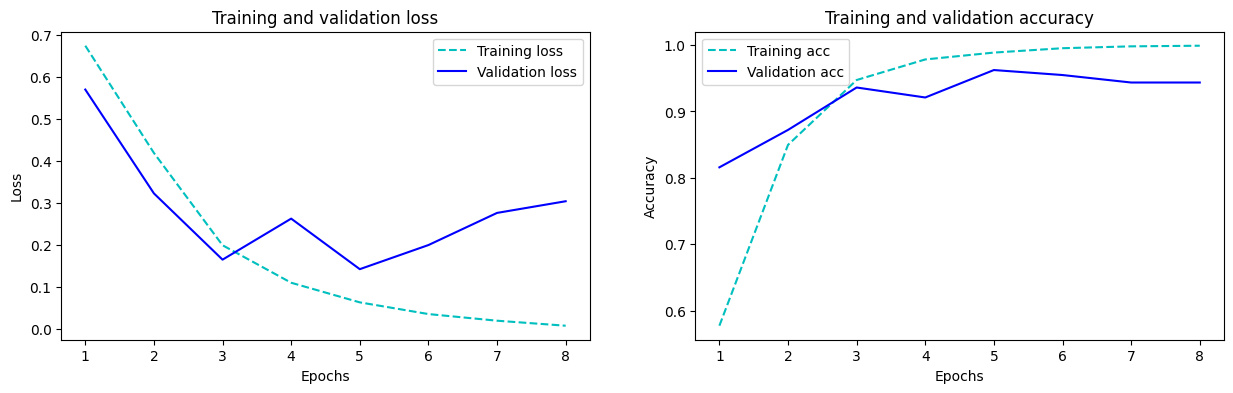

In [ ]:
fn.show_result(history_bilstm_grid)

- Convert tflite model

In [ ]:
run_model = tf.function(lambda x: bilstm_grid(x))
# This is important, let's fix the input size.
BATCH_SIZE = 1
STEPS =max_len

concrete_func = run_model.get_concrete_function(
    tf.TensorSpec([BATCH_SIZE,STEPS], bilstm_grid.inputs[0].dtype))


# model directory.
MODEL_DIR = "keras_bilstm"
bilstm_grid.save(MODEL_DIR, save_format="tf", signatures=concrete_func)

converter = tf.lite.TFLiteConverter.from_saved_model(MODEL_DIR)
tflite_model = converter.convert()
# Save the TensorFlow Lite model to a file
file = open('thbilstm_grid.tflite', 'wb')
file.write(tflite_model)
file.close()



In [ ]:
# Load the TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path='thbilstm_grid.tflite')
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print("Input details:", input_details)
print("Output details:", output_details)

Input details: [{'name': 'serving_default_x:0', 'index': 0, 'shape': array([  1, 109], dtype=int32), 'shape_signature': array([  1, 109], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
Output details: [{'name': 'StatefulPartitionedCall:0', 'index': 81, 'shape': array([1, 1], dtype=int32), 'shape_signature': array([1, 1], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


- Check the saved Tflite model to see if it works efficiently

In [ ]:
# Load the TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path='thbilstm_grid.tflite')
interpreter.allocate_tensors()

# Get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()


from sklearn.metrics import accuracy_score

# Initialize an empty list to store the predictions
predictions = []

# Iterate over each sample in the test dataset
for i in range(len(testdata)):
    # Get the input sequence for the current sample and convert it to FLOAT32
    input_sequence_float32 = testdata[i].reshape(1, -1).astype(np.float32)

    # Perform inference
    interpreter.set_tensor(input_details[0]['index'], input_sequence_float32)
    interpreter.invoke()

    # Get the output
    output_data = interpreter.get_tensor(output_details[0]['index'])

    # Convert output to binary prediction
    binary_prediction = (output_data > 0.5).astype(int)

    # Append the prediction to the list
    predictions.append(binary_prediction[0])

# accuracy for test data
accuracy2= accuracy_score(labeltest, predictions)

# Print the accuracy for test data
print("Accuracy :", accuracy2)


Accuracy : 0.5


In [ ]:
# Display the predictions for each text
for i in range(len(test_data)):
    print("Text:", test_data['processed_sentence'][i])
    print("True Label:", labeltest[i])
    print("Predicted Label:", predictions[i])
    print()

Text: ﻿ รับ   รวม   สูงสุด   เมื่อ   ช้อป   แบรนด์   ดัง   ระดับโลก   ผ่าน   บริการ   เฉพาะ   ลูกค้า   บัตรเครดิต   วัน   สยาม   กสิกร   ไทย   เท่านั้น   ช้อป   เลย   คลิก
True Label: 1
Predicted Label: [0]

Text: สินค้า   ซ่อม   เสร็จ   แล้ว   สามารถ   ติดต่อ   รับ   สินค้า   คืน   ได้ที่   ศูนย์   บริการ
True Label: 0
Predicted Label: [1]

Text: คุณ   ได้รับ   สิทธิ์   ยื่น   สินเชื่อ   ติดต่อ
True Label: 1
Predicted Label: [1]

Text: รบกวน   ติดต่อ   ฝ่าย   บริการ   เพื่อ   ยืนยัน   รับ   ของ   ที่   ท่าน   ได้   สั่ง   ผ่าน   ทาง   บริการ   ออนไลน์
True Label: 0
Predicted Label: [1]

Text: ช้อป   ออนไลน์   ใช้   คูปอง   ลด   เพิ่ม   แล้ว   รับ   เพิ่ม   ที่   ถึง   กรกฎาคม   เท่านั้น   ช้อป   เลย   คลิก
True Label: 1
Predicted Label: [1]

Text: พิเศษ   เฉพาะ   ลูกค้า   ใหม่   รับ   คูปอง   ส่วนลด   สั่ง   พิซซ่า   หน้า   โปรด   ฟรี   ที่   แอ   ป
True Label: 0
Predicted Label: [1]

Text: ขออภัย   พัสดุ   ของ   ท่าน   จัดส่ง   ไม่   สำเร็จ   กรุณา   ตรวจสอบ   และ   ยืนยัน   การจัดส่

# RNN

- Use Gridsearch

In [ ]:
# Define a function to create the Keras model
def create_model_rnn():
    model = Sequential()
    # Add layers to the model
    model.add(Embedding(input_dim=vocab_size, output_dim= max_len, input_length=max_len))
    model.add(SimpleRNN(32, return_sequences=True))
    model.add(Dropout(0.5))
    model.add(SimpleRNN(32))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create a KerasClassifier wrapper for use in GridSearchCV
rnn_grid= KerasClassifier(build_fn=create_model_rnn, verbose=1)

# Define the parameters to search
param_grid = {
    # Define the hyperparameters to search
    'epochs': [10, 20, 30],
    'batch_size': [32, 64, 128]
}


In [ ]:
# Create the GridSearchCV object
rnn_grid_search = GridSearchCV(estimator= rnn_grid, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1)

# Fit the grid search to the training data with early stopping callback
rnn_grid_search.fit(x_train, Y_train, validation_data=(x_test, Y_test), callbacks=callbacks)


Fitting 3 folds for each of 9 candidates, totalling 27 fits


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
23/23 [==============================] - 4s 83ms/step - loss: 0.6979 - accuracy: 0.5599 - val_loss: 0.5763 - val_accuracy: 0.7406
Epoch 2/10
23/23 [==============================] - 2s 70ms/step - loss: 0.5593 - accuracy: 0.7221 - val_loss: 0.4793 - val_accuracy: 0.7782
Epoch 3/10
23/23 [==============================] - 2s 69ms/step - loss: 0.4240 - accuracy: 0.8251 - val_loss: 0.3702 - val_accuracy: 0.8534
Epoch 4/10
23/23 [==============================] - 1s 63ms/step - loss: 0.2534 - accuracy: 0.9238 - val_loss: 0.2637 - val_accuracy: 0.8910
Epoch 5/10
23/23 [==============================] - 2s 83ms/step - loss: 0.1724 - accuracy: 0.9633 - val_loss: 0.2415 - val_accuracy: 0.9135
Epoch 6/10
23/23 [==============================] - 3s 125ms/step - loss: 0.1082 - accuracy: 0.9788 - val_loss: 0.2890 - val_accuracy: 0.9135
Epoch 7/10
23/23 [==============================] - 1s 61ms/step - loss: 0.0956 - accuracy: 0.9760 - val_loss: 0.2844 - val_accuracy: 0.9098
Epoch 8/10
2

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
23/23 [==============================] - 5s 108ms/step - loss: 0.7387 - accuracy: 0.5162 - val_loss: 0.6405 - val_accuracy: 0.6654
Epoch 2/10
23/23 [==============================] - 2s 101ms/step - loss: 0.6273 - accuracy: 0.6347 - val_loss: 0.5245 - val_accuracy: 0.7632
Epoch 3/10
23/23 [==============================] - 1s 62ms/step - loss: 0.5330 - accuracy: 0.7433 - val_loss: 0.4787 - val_accuracy: 0.7707
Epoch 4/10
23/23 [==============================] - 1s 61ms/step - loss: 0.3930 - accuracy: 0.8646 - val_loss: 0.4238 - val_accuracy: 0.8008
Epoch 5/10
23/23 [==============================] - 1s 61ms/step - loss: 0.2944 - accuracy: 0.8956 - val_loss: 0.2978 - val_accuracy: 0.8759
Epoch 6/10
23/23 [==============================] - 2s 67ms/step - loss: 0.1827 - accuracy: 0.9563 - val_loss: 0.4288 - val_accuracy: 0.8534
Epoch 7/10
23/23 [==============================] - 1s 64ms/step - loss: 0.2039 - accuracy: 0.9436 - val_loss: 0.2966 - val_accuracy: 0.8947
Epoch 8/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
23/23 [==============================] - 4s 84ms/step - loss: 0.7031 - accuracy: 0.5521 - val_loss: 0.6524 - val_accuracy: 0.6353
Epoch 2/10
23/23 [==============================] - 2s 65ms/step - loss: 0.6643 - accuracy: 0.6127 - val_loss: 0.5732 - val_accuracy: 0.7519
Epoch 3/10
23/23 [==============================] - 2s 80ms/step - loss: 0.5581 - accuracy: 0.7085 - val_loss: 0.4945 - val_accuracy: 0.7895
Epoch 4/10
23/23 [==============================] - 3s 120ms/step - loss: 0.4120 - accuracy: 0.8352 - val_loss: 0.4016 - val_accuracy: 0.8459
Epoch 5/10
23/23 [==============================] - 1s 62ms/step - loss: 0.3100 - accuracy: 0.8915 - val_loss: 0.3768 - val_accuracy: 0.8534
Epoch 6/10
23/23 [==============================] - 1s 61ms/step - loss: 0.1865 - accuracy: 0.9577 - val_loss: 0.2932 - val_accuracy: 0.8835
Epoch 7/10
23/23 [==============================] - 1s 60ms/step - loss: 0.1305 - accuracy: 0.9648 - val_loss: 0.3140 - val_accuracy: 0.8910
Epoch 8/10
2

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
23/23 [==============================] - 6s 112ms/step - loss: 0.6938 - accuracy: 0.5726 - val_loss: 0.5567 - val_accuracy: 0.7707
Epoch 2/20
23/23 [==============================] - 1s 63ms/step - loss: 0.5507 - accuracy: 0.7278 - val_loss: 0.4708 - val_accuracy: 0.7970
Epoch 3/20
23/23 [==============================] - 1s 63ms/step - loss: 0.4054 - accuracy: 0.8336 - val_loss: 0.3046 - val_accuracy: 0.8722
Epoch 4/20
23/23 [==============================] - 2s 67ms/step - loss: 0.3398 - accuracy: 0.8801 - val_loss: 0.5235 - val_accuracy: 0.7406
Epoch 5/20
23/23 [==============================] - 1s 63ms/step - loss: 0.3026 - accuracy: 0.8928 - val_loss: 0.3084 - val_accuracy: 0.8872
Epoch 6/20
23/23 [==============================] - 1s 62ms/step - loss: 0.1860 - accuracy: 0.9577 - val_loss: 0.2137 - val_accuracy: 0.9135
Epoch 7/20
23/23 [==============================] - 1s 62ms/step - loss: 0.1134 - accuracy: 0.9732 - val_loss: 0.1897 - val_accuracy: 0.9248
Epoch 8/20
2

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
23/23 [==============================] - 4s 79ms/step - loss: 0.6597 - accuracy: 0.6164 - val_loss: 0.5473 - val_accuracy: 0.7444
Epoch 2/20
23/23 [==============================] - 1s 63ms/step - loss: 0.5055 - accuracy: 0.7927 - val_loss: 0.4572 - val_accuracy: 0.7970
Epoch 3/20
23/23 [==============================] - 1s 64ms/step - loss: 0.3853 - accuracy: 0.8561 - val_loss: 0.7698 - val_accuracy: 0.6504
Epoch 4/20
23/23 [==============================] - 1s 62ms/step - loss: 0.2970 - accuracy: 0.9111 - val_loss: 0.3255 - val_accuracy: 0.8722
Epoch 5/20
23/23 [==============================] - 1s 63ms/step - loss: 0.1986 - accuracy: 0.9394 - val_loss: 0.3029 - val_accuracy: 0.8797
Epoch 6/20
23/23 [==============================] - 2s 103ms/step - loss: 0.1166 - accuracy: 0.9803 - val_loss: 0.3147 - val_accuracy: 0.8797
Epoch 7/20
23/23 [==============================] - 2s 94ms/step - loss: 0.0836 - accuracy: 0.9817 - val_loss: 0.3695 - val_accuracy: 0.8947
Epoch 8/20
2

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
23/23 [==============================] - 6s 142ms/step - loss: 0.7123 - accuracy: 0.5296 - val_loss: 0.6753 - val_accuracy: 0.5301
Epoch 2/20
23/23 [==============================] - 2s 69ms/step - loss: 0.6800 - accuracy: 0.5775 - val_loss: 0.5966 - val_accuracy: 0.7556
Epoch 3/20
23/23 [==============================] - 1s 61ms/step - loss: 0.5756 - accuracy: 0.7183 - val_loss: 0.5004 - val_accuracy: 0.7932
Epoch 4/20
23/23 [==============================] - 1s 61ms/step - loss: 0.4412 - accuracy: 0.8352 - val_loss: 0.4171 - val_accuracy: 0.8271
Epoch 5/20
23/23 [==============================] - 1s 63ms/step - loss: 0.2841 - accuracy: 0.9197 - val_loss: 0.3783 - val_accuracy: 0.8534
Epoch 6/20
23/23 [==============================] - 2s 67ms/step - loss: 0.1696 - accuracy: 0.9549 - val_loss: 0.3125 - val_accuracy: 0.8647
Epoch 7/20
23/23 [==============================] - 1s 62ms/step - loss: 0.1103 - accuracy: 0.9732 - val_loss: 0.4090 - val_accuracy: 0.8797
Epoch 8/20
2

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/30
23/23 [==============================] - 6s 122ms/step - loss: 0.7234 - accuracy: 0.5402 - val_loss: 0.6905 - val_accuracy: 0.5000
Epoch 2/30
23/23 [==============================] - 1s 61ms/step - loss: 0.6631 - accuracy: 0.6164 - val_loss: 0.5425 - val_accuracy: 0.7857
Epoch 3/30
23/23 [==============================] - 1s 61ms/step - loss: 0.5499 - accuracy: 0.7377 - val_loss: 0.4399 - val_accuracy: 0.8120
Epoch 4/30
23/23 [==============================] - 1s 61ms/step - loss: 0.4202 - accuracy: 0.8378 - val_loss: 0.3362 - val_accuracy: 0.8534
Epoch 5/30
23/23 [==============================] - 1s 60ms/step - loss: 0.2275 - accuracy: 0.9323 - val_loss: 0.2383 - val_accuracy: 0.9098
Epoch 6/30
23/23 [==============================] - 1s 62ms/step - loss: 0.1499 - accuracy: 0.9647 - val_loss: 0.2115 - val_accuracy: 0.9135
Epoch 7/30
23/23 [==============================] - 1s 60ms/step - loss: 0.1154 - accuracy: 0.9676 - val_loss: 0.2142 - val_accuracy: 0.9211
Epoch 8/30
2

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/30
23/23 [==============================] - 5s 102ms/step - loss: 0.7064 - accuracy: 0.5388 - val_loss: 0.5927 - val_accuracy: 0.7256
Epoch 2/30
23/23 [==============================] - 3s 111ms/step - loss: 0.5872 - accuracy: 0.6968 - val_loss: 0.4941 - val_accuracy: 0.7820
Epoch 3/30
23/23 [==============================] - 2s 66ms/step - loss: 0.4688 - accuracy: 0.8011 - val_loss: 0.3868 - val_accuracy: 0.8421
Epoch 4/30
23/23 [==============================] - 2s 66ms/step - loss: 0.3255 - accuracy: 0.9055 - val_loss: 0.3244 - val_accuracy: 0.8797
Epoch 5/30
23/23 [==============================] - 1s 61ms/step - loss: 0.2558 - accuracy: 0.9252 - val_loss: 0.2942 - val_accuracy: 0.8722
Epoch 6/30
23/23 [==============================] - 1s 58ms/step - loss: 0.1806 - accuracy: 0.9577 - val_loss: 0.2235 - val_accuracy: 0.9173
Epoch 7/30
23/23 [==============================] - 1s 60ms/step - loss: 0.0959 - accuracy: 0.9817 - val_loss: 0.2546 - val_accuracy: 0.9098
Epoch 8/30


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/30
23/23 [==============================] - 4s 81ms/step - loss: 0.7453 - accuracy: 0.5085 - val_loss: 0.6862 - val_accuracy: 0.5902
Epoch 2/30
23/23 [==============================] - 1s 65ms/step - loss: 0.7275 - accuracy: 0.5127 - val_loss: 0.6816 - val_accuracy: 0.5902
Epoch 3/30
23/23 [==============================] - 1s 61ms/step - loss: 0.6599 - accuracy: 0.5803 - val_loss: 0.5560 - val_accuracy: 0.7632
Epoch 4/30
23/23 [==============================] - 1s 61ms/step - loss: 0.4827 - accuracy: 0.7930 - val_loss: 0.4242 - val_accuracy: 0.8045
Epoch 5/30
23/23 [==============================] - 1s 59ms/step - loss: 0.3281 - accuracy: 0.8845 - val_loss: 0.3771 - val_accuracy: 0.8609
Epoch 6/30
23/23 [==============================] - 2s 94ms/step - loss: 0.1909 - accuracy: 0.9493 - val_loss: 0.3201 - val_accuracy: 0.8910
Epoch 7/30
23/23 [==============================] - 2s 104ms/step - loss: 0.1278 - accuracy: 0.9676 - val_loss: 0.3388 - val_accuracy: 0.8985
Epoch 8/30
2

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
12/12 [==============================] - 4s 122ms/step - loss: 0.7213 - accuracy: 0.5430 - val_loss: 0.6308 - val_accuracy: 0.6466
Epoch 2/10
12/12 [==============================] - 2s 125ms/step - loss: 0.5969 - accuracy: 0.6897 - val_loss: 0.5155 - val_accuracy: 0.7444
Epoch 3/10
12/12 [==============================] - 1s 124ms/step - loss: 0.5284 - accuracy: 0.7588 - val_loss: 0.4571 - val_accuracy: 0.8045
Epoch 4/10
12/12 [==============================] - 1s 121ms/step - loss: 0.4451 - accuracy: 0.8039 - val_loss: 0.3889 - val_accuracy: 0.8383
Epoch 5/10
12/12 [==============================] - 1s 76ms/step - loss: 0.3562 - accuracy: 0.8731 - val_loss: 0.2971 - val_accuracy: 0.8910
Epoch 6/10
12/12 [==============================] - 1s 71ms/step - loss: 0.2343 - accuracy: 0.9394 - val_loss: 0.8119 - val_accuracy: 0.6805
Epoch 7/10
12/12 [==============================] - 1s 70ms/step - loss: 0.1966 - accuracy: 0.9450 - val_loss: 0.2192 - val_accuracy: 0.9135
Epoch 8/1

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
12/12 [==============================] - 4s 111ms/step - loss: 0.7673 - accuracy: 0.5021 - val_loss: 0.6886 - val_accuracy: 0.5338
Epoch 2/10
12/12 [==============================] - 1s 69ms/step - loss: 0.6892 - accuracy: 0.5416 - val_loss: 0.6630 - val_accuracy: 0.5902
Epoch 3/10
12/12 [==============================] - 1s 78ms/step - loss: 0.6791 - accuracy: 0.5628 - val_loss: 0.6237 - val_accuracy: 0.7143
Epoch 4/10
12/12 [==============================] - 1s 79ms/step - loss: 0.5966 - accuracy: 0.6587 - val_loss: 0.5762 - val_accuracy: 0.7669
Epoch 5/10
12/12 [==============================] - 1s 119ms/step - loss: 0.5220 - accuracy: 0.7602 - val_loss: 0.5013 - val_accuracy: 0.8045
Epoch 6/10
12/12 [==============================] - 2s 133ms/step - loss: 0.4448 - accuracy: 0.8039 - val_loss: 0.4300 - val_accuracy: 0.8195
Epoch 7/10
12/12 [==============================] - 1s 116ms/step - loss: 0.3491 - accuracy: 0.8801 - val_loss: 0.3885 - val_accuracy: 0.8308
Epoch 8/1

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
12/12 [==============================] - 7s 132ms/step - loss: 0.7501 - accuracy: 0.5099 - val_loss: 0.6784 - val_accuracy: 0.5639
Epoch 2/10
12/12 [==============================] - 1s 93ms/step - loss: 0.7015 - accuracy: 0.5592 - val_loss: 0.6353 - val_accuracy: 0.6992
Epoch 3/10
12/12 [==============================] - 1s 119ms/step - loss: 0.6437 - accuracy: 0.6408 - val_loss: 0.5838 - val_accuracy: 0.7406
Epoch 4/10
12/12 [==============================] - 2s 137ms/step - loss: 0.5667 - accuracy: 0.7197 - val_loss: 0.5123 - val_accuracy: 0.7820
Epoch 5/10
12/12 [==============================] - 2s 157ms/step - loss: 0.4525 - accuracy: 0.8239 - val_loss: 0.4185 - val_accuracy: 0.8346
Epoch 6/10
12/12 [==============================] - 1s 88ms/step - loss: 0.3199 - accuracy: 0.9085 - val_loss: 0.3556 - val_accuracy: 0.8609
Epoch 7/10
12/12 [==============================] - 1s 95ms/step - loss: 0.2222 - accuracy: 0.9479 - val_loss: 0.3256 - val_accuracy: 0.8722
Epoch 8/1

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
12/12 [==============================] - 4s 131ms/step - loss: 0.7051 - accuracy: 0.5247 - val_loss: 0.6612 - val_accuracy: 0.6767
Epoch 2/20
12/12 [==============================] - 1s 102ms/step - loss: 0.6752 - accuracy: 0.5642 - val_loss: 0.6084 - val_accuracy: 0.7519
Epoch 3/20
12/12 [==============================] - 1s 98ms/step - loss: 0.5847 - accuracy: 0.6939 - val_loss: 0.5476 - val_accuracy: 0.7669
Epoch 4/20
12/12 [==============================] - 1s 88ms/step - loss: 0.5258 - accuracy: 0.7391 - val_loss: 0.4605 - val_accuracy: 0.8158
Epoch 5/20
12/12 [==============================] - 1s 125ms/step - loss: 0.4205 - accuracy: 0.8336 - val_loss: 0.3868 - val_accuracy: 0.8459
Epoch 6/20
12/12 [==============================] - 2s 140ms/step - loss: 0.3200 - accuracy: 0.8900 - val_loss: 0.3040 - val_accuracy: 0.8872
Epoch 7/20
12/12 [==============================] - 2s 131ms/step - loss: 0.2340 - accuracy: 0.9379 - val_loss: 0.3021 - val_accuracy: 0.8609
Epoch 8/

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
12/12 [==============================] - 5s 161ms/step - loss: 0.7271 - accuracy: 0.5360 - val_loss: 0.6565 - val_accuracy: 0.6278
Epoch 2/20
12/12 [==============================] - 2s 161ms/step - loss: 0.7181 - accuracy: 0.5289 - val_loss: 0.6479 - val_accuracy: 0.6617
Epoch 3/20
12/12 [==============================] - 1s 108ms/step - loss: 0.6650 - accuracy: 0.5952 - val_loss: 0.5951 - val_accuracy: 0.7406
Epoch 4/20
12/12 [==============================] - 1s 92ms/step - loss: 0.5975 - accuracy: 0.6643 - val_loss: 0.5406 - val_accuracy: 0.7857
Epoch 5/20
12/12 [==============================] - 1s 93ms/step - loss: 0.4972 - accuracy: 0.7687 - val_loss: 0.4857 - val_accuracy: 0.8045
Epoch 6/20
12/12 [==============================] - 1s 93ms/step - loss: 0.4176 - accuracy: 0.8251 - val_loss: 0.4371 - val_accuracy: 0.8120
Epoch 7/20
12/12 [==============================] - 1s 93ms/step - loss: 0.3214 - accuracy: 0.8900 - val_loss: 0.4002 - val_accuracy: 0.8383
Epoch 8/20

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
12/12 [==============================] - 5s 132ms/step - loss: 0.7333 - accuracy: 0.4986 - val_loss: 0.6945 - val_accuracy: 0.5038
Epoch 2/20
12/12 [==============================] - 1s 88ms/step - loss: 0.6972 - accuracy: 0.5549 - val_loss: 0.6658 - val_accuracy: 0.6090
Epoch 3/20
12/12 [==============================] - 1s 87ms/step - loss: 0.6246 - accuracy: 0.6549 - val_loss: 0.6234 - val_accuracy: 0.7143
Epoch 4/20
12/12 [==============================] - 1s 88ms/step - loss: 0.5752 - accuracy: 0.6972 - val_loss: 0.5492 - val_accuracy: 0.7895
Epoch 5/20
12/12 [==============================] - 1s 87ms/step - loss: 0.4801 - accuracy: 0.8000 - val_loss: 0.4853 - val_accuracy: 0.8045
Epoch 6/20
12/12 [==============================] - 1s 87ms/step - loss: 0.3590 - accuracy: 0.8549 - val_loss: 0.4285 - val_accuracy: 0.8308
Epoch 7/20
12/12 [==============================] - 1s 93ms/step - loss: 0.2382 - accuracy: 0.9408 - val_loss: 0.3695 - val_accuracy: 0.8459
Epoch 8/20
1

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/30
12/12 [==============================] - 4s 121ms/step - loss: 0.6551 - accuracy: 0.6276 - val_loss: 0.5911 - val_accuracy: 0.7030
Epoch 2/30
12/12 [==============================] - 1s 88ms/step - loss: 0.6334 - accuracy: 0.6403 - val_loss: 0.5165 - val_accuracy: 0.7707
Epoch 3/30
12/12 [==============================] - 1s 95ms/step - loss: 0.5387 - accuracy: 0.7391 - val_loss: 0.4538 - val_accuracy: 0.8045
Epoch 4/30
12/12 [==============================] - 1s 90ms/step - loss: 0.4251 - accuracy: 0.8322 - val_loss: 0.3680 - val_accuracy: 0.8534
Epoch 5/30
12/12 [==============================] - 1s 86ms/step - loss: 0.3124 - accuracy: 0.9027 - val_loss: 0.2741 - val_accuracy: 0.8947
Epoch 6/30
12/12 [==============================] - 1s 92ms/step - loss: 0.2653 - accuracy: 0.9083 - val_loss: 0.2430 - val_accuracy: 0.9098
Epoch 7/30
12/12 [==============================] - 1s 87ms/step - loss: 0.1820 - accuracy: 0.9591 - val_loss: 0.2375 - val_accuracy: 0.9023
Epoch 8/30
1

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/30
12/12 [==============================] - 4s 118ms/step - loss: 0.7728 - accuracy: 0.4908 - val_loss: 0.6713 - val_accuracy: 0.6053
Epoch 2/30
12/12 [==============================] - 1s 83ms/step - loss: 0.6888 - accuracy: 0.5740 - val_loss: 0.6459 - val_accuracy: 0.6654
Epoch 3/30
12/12 [==============================] - 1s 77ms/step - loss: 0.6350 - accuracy: 0.6220 - val_loss: 0.5644 - val_accuracy: 0.7744
Epoch 4/30
12/12 [==============================] - 1s 119ms/step - loss: 0.5355 - accuracy: 0.7334 - val_loss: 0.4958 - val_accuracy: 0.7932
Epoch 5/30
12/12 [==============================] - 1s 124ms/step - loss: 0.4514 - accuracy: 0.8152 - val_loss: 0.4321 - val_accuracy: 0.8120
Epoch 6/30
12/12 [==============================] - 2s 130ms/step - loss: 0.3426 - accuracy: 0.8801 - val_loss: 0.3505 - val_accuracy: 0.8684
Epoch 7/30
12/12 [==============================] - 1s 93ms/step - loss: 0.2427 - accuracy: 0.9309 - val_loss: 0.2995 - val_accuracy: 0.8759
Epoch 8/3

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/30
12/12 [==============================] - 4s 158ms/step - loss: 0.7349 - accuracy: 0.5366 - val_loss: 0.6503 - val_accuracy: 0.6842
Epoch 2/30
12/12 [==============================] - 2s 128ms/step - loss: 0.6428 - accuracy: 0.6042 - val_loss: 0.6053 - val_accuracy: 0.7331
Epoch 3/30
12/12 [==============================] - 2s 125ms/step - loss: 0.5900 - accuracy: 0.6803 - val_loss: 0.5174 - val_accuracy: 0.7932
Epoch 4/30
12/12 [==============================] - 1s 79ms/step - loss: 0.5126 - accuracy: 0.7577 - val_loss: 0.4559 - val_accuracy: 0.8233
Epoch 5/30
12/12 [==============================] - 1s 73ms/step - loss: 0.4263 - accuracy: 0.8099 - val_loss: 0.4330 - val_accuracy: 0.7970
Epoch 6/30
12/12 [==============================] - 1s 79ms/step - loss: 0.3337 - accuracy: 0.8803 - val_loss: 0.4023 - val_accuracy: 0.8195
Epoch 7/30
12/12 [==============================] - 1s 73ms/step - loss: 0.2800 - accuracy: 0.9099 - val_loss: 0.3425 - val_accuracy: 0.8571
Epoch 8/30

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
6/6 [==============================] - 5s 276ms/step - loss: 0.7402 - accuracy: 0.5063 - val_loss: 0.6935 - val_accuracy: 0.5075
Epoch 2/10
6/6 [==============================] - 1s 101ms/step - loss: 0.7148 - accuracy: 0.5416 - val_loss: 0.6675 - val_accuracy: 0.6241
Epoch 3/10
6/6 [==============================] - 1s 102ms/step - loss: 0.6815 - accuracy: 0.5543 - val_loss: 0.6365 - val_accuracy: 0.7218
Epoch 4/10
6/6 [==============================] - 1s 106ms/step - loss: 0.6246 - accuracy: 0.6460 - val_loss: 0.5934 - val_accuracy: 0.7594
Epoch 5/10
6/6 [==============================] - 1s 133ms/step - loss: 0.5759 - accuracy: 0.6982 - val_loss: 0.5359 - val_accuracy: 0.7669
Epoch 6/10
6/6 [==============================] - 1s 115ms/step - loss: 0.5299 - accuracy: 0.7250 - val_loss: 0.4732 - val_accuracy: 0.8045
Epoch 7/10
6/6 [==============================] - 1s 120ms/step - loss: 0.4411 - accuracy: 0.8152 - val_loss: 0.4128 - val_accuracy: 0.8534
Epoch 8/10
6/6 [====

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
6/6 [==============================] - 5s 232ms/step - loss: 0.7048 - accuracy: 0.5162 - val_loss: 0.6104 - val_accuracy: 0.7256
Epoch 2/10
6/6 [==============================] - 1s 105ms/step - loss: 0.6101 - accuracy: 0.6812 - val_loss: 0.5493 - val_accuracy: 0.7744
Epoch 3/10
6/6 [==============================] - 1s 121ms/step - loss: 0.5312 - accuracy: 0.7447 - val_loss: 0.4708 - val_accuracy: 0.8195
Epoch 4/10
6/6 [==============================] - 1s 112ms/step - loss: 0.4382 - accuracy: 0.8152 - val_loss: 0.4097 - val_accuracy: 0.8534
Epoch 5/10
6/6 [==============================] - 1s 106ms/step - loss: 0.3506 - accuracy: 0.9027 - val_loss: 0.3641 - val_accuracy: 0.8571
Epoch 6/10
6/6 [==============================] - 1s 101ms/step - loss: 0.3146 - accuracy: 0.9083 - val_loss: 0.3491 - val_accuracy: 0.8647
Epoch 7/10
6/6 [==============================] - 1s 100ms/step - loss: 0.2487 - accuracy: 0.9422 - val_loss: 0.3212 - val_accuracy: 0.8609
Epoch 8/10
6/6 [====

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
6/6 [==============================] - 4s 174ms/step - loss: 0.8319 - accuracy: 0.5014 - val_loss: 0.6593 - val_accuracy: 0.5113
Epoch 2/10
6/6 [==============================] - 1s 102ms/step - loss: 0.7287 - accuracy: 0.5394 - val_loss: 0.6186 - val_accuracy: 0.6504
Epoch 3/10
6/6 [==============================] - 1s 95ms/step - loss: 0.6435 - accuracy: 0.5859 - val_loss: 0.5772 - val_accuracy: 0.7782
Epoch 4/10
6/6 [==============================] - 1s 99ms/step - loss: 0.5789 - accuracy: 0.6592 - val_loss: 0.5322 - val_accuracy: 0.7895
Epoch 5/10
6/6 [==============================] - 1s 97ms/step - loss: 0.4950 - accuracy: 0.7197 - val_loss: 0.4707 - val_accuracy: 0.8120
Epoch 6/10
6/6 [==============================] - 1s 99ms/step - loss: 0.4428 - accuracy: 0.7873 - val_loss: 0.4536 - val_accuracy: 0.8233
Epoch 7/10
6/6 [==============================] - 1s 112ms/step - loss: 0.3639 - accuracy: 0.8577 - val_loss: 0.4000 - val_accuracy: 0.8496
Epoch 8/10
6/6 [========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
6/6 [==============================] - 4s 258ms/step - loss: 0.7520 - accuracy: 0.4922 - val_loss: 0.6611 - val_accuracy: 0.6391
Epoch 2/20
6/6 [==============================] - 1s 170ms/step - loss: 0.6739 - accuracy: 0.5980 - val_loss: 0.6212 - val_accuracy: 0.7256
Epoch 3/20
6/6 [==============================] - 1s 172ms/step - loss: 0.6352 - accuracy: 0.6389 - val_loss: 0.5767 - val_accuracy: 0.7293
Epoch 4/20
6/6 [==============================] - 1s 184ms/step - loss: 0.5874 - accuracy: 0.6841 - val_loss: 0.5025 - val_accuracy: 0.8008
Epoch 5/20
6/6 [==============================] - 1s 111ms/step - loss: 0.5280 - accuracy: 0.7743 - val_loss: 0.4590 - val_accuracy: 0.8008
Epoch 6/20
6/6 [==============================] - 1s 114ms/step - loss: 0.4394 - accuracy: 0.8223 - val_loss: 0.4065 - val_accuracy: 0.8195
Epoch 7/20
6/6 [==============================] - 1s 110ms/step - loss: 0.3513 - accuracy: 0.8858 - val_loss: 0.3378 - val_accuracy: 0.8797
Epoch 8/20
6/6 [====

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
6/6 [==============================] - 3s 185ms/step - loss: 0.7538 - accuracy: 0.5035 - val_loss: 0.6743 - val_accuracy: 0.5489
Epoch 2/20
6/6 [==============================] - 1s 99ms/step - loss: 0.6889 - accuracy: 0.5755 - val_loss: 0.6178 - val_accuracy: 0.7105
Epoch 3/20
6/6 [==============================] - 1s 106ms/step - loss: 0.6366 - accuracy: 0.6333 - val_loss: 0.5628 - val_accuracy: 0.7707
Epoch 4/20
6/6 [==============================] - 1s 124ms/step - loss: 0.5551 - accuracy: 0.7292 - val_loss: 0.5017 - val_accuracy: 0.7932
Epoch 5/20
6/6 [==============================] - 1s 182ms/step - loss: 0.4953 - accuracy: 0.7856 - val_loss: 0.4536 - val_accuracy: 0.7932
Epoch 6/20
6/6 [==============================] - 1s 181ms/step - loss: 0.4225 - accuracy: 0.8533 - val_loss: 0.4138 - val_accuracy: 0.8195
Epoch 7/20
6/6 [==============================] - 1s 160ms/step - loss: 0.3159 - accuracy: 0.8984 - val_loss: 0.3487 - val_accuracy: 0.8534
Epoch 8/20
6/6 [=====

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
6/6 [==============================] - 4s 184ms/step - loss: 0.7338 - accuracy: 0.5268 - val_loss: 0.6848 - val_accuracy: 0.5827
Epoch 2/20
6/6 [==============================] - 1s 108ms/step - loss: 0.7252 - accuracy: 0.5324 - val_loss: 0.6725 - val_accuracy: 0.5677
Epoch 3/20
6/6 [==============================] - 1s 96ms/step - loss: 0.6812 - accuracy: 0.5789 - val_loss: 0.6456 - val_accuracy: 0.6880
Epoch 4/20
6/6 [==============================] - 1s 97ms/step - loss: 0.6408 - accuracy: 0.6183 - val_loss: 0.5983 - val_accuracy: 0.7519
Epoch 5/20
6/6 [==============================] - 1s 96ms/step - loss: 0.5813 - accuracy: 0.6789 - val_loss: 0.5399 - val_accuracy: 0.7820
Epoch 6/20
6/6 [==============================] - 1s 97ms/step - loss: 0.5172 - accuracy: 0.7592 - val_loss: 0.4863 - val_accuracy: 0.7932
Epoch 7/20
6/6 [==============================] - 1s 96ms/step - loss: 0.4372 - accuracy: 0.8239 - val_loss: 0.4410 - val_accuracy: 0.8233
Epoch 8/20
6/6 [=========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/30
6/6 [==============================] - 3s 167ms/step - loss: 0.7055 - accuracy: 0.5614 - val_loss: 0.6334 - val_accuracy: 0.6955
Epoch 2/30
6/6 [==============================] - 1s 98ms/step - loss: 0.6482 - accuracy: 0.6121 - val_loss: 0.5759 - val_accuracy: 0.7481
Epoch 3/30
6/6 [==============================] - 1s 95ms/step - loss: 0.5824 - accuracy: 0.6869 - val_loss: 0.5241 - val_accuracy: 0.7669
Epoch 4/30
6/6 [==============================] - 1s 108ms/step - loss: 0.5420 - accuracy: 0.7193 - val_loss: 0.4720 - val_accuracy: 0.8120
Epoch 5/30
6/6 [==============================] - 1s 113ms/step - loss: 0.4700 - accuracy: 0.7927 - val_loss: 0.4223 - val_accuracy: 0.8308
Epoch 6/30
6/6 [==============================] - 1s 92ms/step - loss: 0.3968 - accuracy: 0.8406 - val_loss: 0.3638 - val_accuracy: 0.8534
Epoch 7/30
6/6 [==============================] - 1s 105ms/step - loss: 0.3154 - accuracy: 0.8956 - val_loss: 0.3107 - val_accuracy: 0.8835
Epoch 8/30
6/6 [=======

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/30
6/6 [==============================] - 3s 171ms/step - loss: 0.7106 - accuracy: 0.5543 - val_loss: 0.6306 - val_accuracy: 0.6842
Epoch 2/30
6/6 [==============================] - 1s 121ms/step - loss: 0.7040 - accuracy: 0.5360 - val_loss: 0.6639 - val_accuracy: 0.5940
Epoch 3/30
6/6 [==============================] - 1s 104ms/step - loss: 0.6472 - accuracy: 0.6220 - val_loss: 0.5802 - val_accuracy: 0.7331
Epoch 4/30
6/6 [==============================] - 1s 156ms/step - loss: 0.5829 - accuracy: 0.6996 - val_loss: 0.5423 - val_accuracy: 0.7444
Epoch 5/30
6/6 [==============================] - 1s 169ms/step - loss: 0.5277 - accuracy: 0.7475 - val_loss: 0.4922 - val_accuracy: 0.8008
Epoch 6/30
6/6 [==============================] - 1s 167ms/step - loss: 0.4543 - accuracy: 0.8223 - val_loss: 0.4500 - val_accuracy: 0.8120
Epoch 7/30
6/6 [==============================] - 1s 176ms/step - loss: 0.4004 - accuracy: 0.8632 - val_loss: 0.4127 - val_accuracy: 0.8271
Epoch 8/30
6/6 [====

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/30
6/6 [==============================] - 5s 280ms/step - loss: 0.6992 - accuracy: 0.5620 - val_loss: 0.6329 - val_accuracy: 0.6842
Epoch 2/30
6/6 [==============================] - 1s 92ms/step - loss: 0.6268 - accuracy: 0.6408 - val_loss: 0.5901 - val_accuracy: 0.7218
Epoch 3/30
6/6 [==============================] - 1s 96ms/step - loss: 0.6252 - accuracy: 0.6620 - val_loss: 0.5342 - val_accuracy: 0.7519
Epoch 4/30
6/6 [==============================] - 1s 96ms/step - loss: 0.5597 - accuracy: 0.7056 - val_loss: 0.4989 - val_accuracy: 0.7669
Epoch 5/30
6/6 [==============================] - 1s 96ms/step - loss: 0.4866 - accuracy: 0.7831 - val_loss: 0.4700 - val_accuracy: 0.7970
Epoch 6/30
6/6 [==============================] - 1s 93ms/step - loss: 0.4353 - accuracy: 0.8183 - val_loss: 0.4210 - val_accuracy: 0.8308
Epoch 7/30
6/6 [==============================] - 1s 95ms/step - loss: 0.3393 - accuracy: 0.8761 - val_loss: 0.9509 - val_accuracy: 0.5301
Epoch 8/30
6/6 [==========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/30
9/9 [==============================] - 4s 134ms/step - loss: 0.7205 - accuracy: 0.4972 - val_loss: 0.6761 - val_accuracy: 0.5977
Epoch 2/30
9/9 [==============================] - 1s 90ms/step - loss: 0.6779 - accuracy: 0.5705 - val_loss: 0.6448 - val_accuracy: 0.6805
Epoch 3/30
9/9 [==============================] - 1s 138ms/step - loss: 0.6202 - accuracy: 0.6795 - val_loss: 0.5865 - val_accuracy: 0.7669
Epoch 4/30
9/9 [==============================] - 1s 155ms/step - loss: 0.5528 - accuracy: 0.7274 - val_loss: 0.5002 - val_accuracy: 0.7970
Epoch 5/30
9/9 [==============================] - 2s 174ms/step - loss: 0.4729 - accuracy: 0.8158 - val_loss: 0.4046 - val_accuracy: 0.8459
Epoch 6/30
9/9 [==============================] - 1s 87ms/step - loss: 0.3404 - accuracy: 0.8844 - val_loss: 0.2965 - val_accuracy: 0.9023
Epoch 7/30
9/9 [==============================] - 1s 91ms/step - loss: 0.2235 - accuracy: 0.9539 - val_loss: 0.2419 - val_accuracy: 0.9098
Epoch 8/30
9/9 [=======

GridSearchCV(cv=3,
             estimator=KerasClassifier(build_fn=<function create_model_rnn at 0x7d2109c86050>),
             param_grid={'batch_size': [32, 64, 128], 'epochs': [10, 20, 30]},
             scoring='accuracy', verbose=1)

- Best Parameter

In [ ]:
# Print the best parameters found
print("Best parameters:", rnn_grid_search.best_params_)

# Print the best accuracy found
print("Best accuracy:", rnn_grid_search.best_score_)

Best parameters: {'batch_size': 128, 'epochs': 30}
Best accuracy: 0.9313890878226042


In [ ]:
# Get the best model
best_model = rnn_grid_search.best_estimator_

# Use the predict_proba method to get the predicted probabilities
y_pred_prob3 = best_model.predict_proba(x_test)

# Calculate the test loss manually using binary cross-entropy loss
from sklearn.metrics import log_loss
test_loss3 = log_loss(Y_test, y_pred_prob3)

# Print the test loss
print("Test loss of the best model:", test_loss3)


3/3 [==============================] - 0s 16ms/step
Test loss of the best model: 0.33048844663758215


- Best Accuracy

In [ ]:
from sklearn import metrics

# Print the loss and F1-score of the best model
print("best accuracy:", rnn_grid_search.best_score_)

# Get the best estimator
best_model = rnn_grid_search.best_estimator_

# Evaluate the best model on the test data
y_pred3 = best_model.predict(x_test)

# Calculate the F1-score
f1_score3 = metrics.f1_score(Y_test, y_pred3)

# Print the F1-score
print("F1-score of the best model on test data:", f1_score3)

# Print evaluation report of the best model
print("Evaluation report of the best model:")
print(metrics.classification_report(Y_test, y_pred3))


best accuracy: 0.9313890878226042
3/3 [==============================] - 0s 16ms/step
F1-score of the best model on test data: 0.9389312977099238
Evaluation report of the best model:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       133
           1       0.95      0.92      0.94       133

    accuracy                           0.94       266
   macro avg       0.94      0.94      0.94       266
weighted avg       0.94      0.94      0.94       266



- Use Best Parameter

- Model Training

In [ ]:
rnn_grid = Sequential()
rnn_grid.add(Embedding(input_dim=vocab_size, output_dim=max_len, input_length=max_len))
rnn_grid.add(SimpleRNN(32, return_sequences=True))
rnn_grid.add(Dropout(0.5))
rnn_grid.add(SimpleRNN(32))
rnn_grid.add(Dropout(0.5))
rnn_grid.add(Dense(32, activation='relu'))
rnn_grid.add(Dropout(0.5))
rnn_grid.add(Dense(1, activation='sigmoid'))
rnn_grid.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
rnn_grid.summary()



Model: "sequential_86"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_86 (Embedding)    (None, 109, 109)          232933    
                                                                 
 simple_rnn_56 (SimpleRNN)   (None, 109, 32)           4544      
                                                                 
 dropout_258 (Dropout)       (None, 109, 32)           0         
                                                                 
 simple_rnn_57 (SimpleRNN)   (None, 32)                2080      
                                                                 
 dropout_259 (Dropout)       (None, 32)                0         
                                                                 
 dense_172 (Dense)           (None, 32)                1056      
                                                                 
 dropout_260 (Dropout)       (None, 32)              

In [ ]:
history_rnn_grid = rnn_grid.fit(x_train, Y_train, epochs=30, batch_size=128, validation_data=(x_test, Y_test), callbacks=callbacks)

Epoch 1/30
9/9 [==============================] - 5s 153ms/step - loss: 0.6914 - acc: 0.5602 - val_loss: 0.5978 - val_acc: 0.7519
Epoch 2/30
9/9 [==============================] - 1s 117ms/step - loss: 0.6008 - acc: 0.6607 - val_loss: 0.5286 - val_acc: 0.7519
Epoch 3/30
9/9 [==============================] - 1s 94ms/step - loss: 0.5269 - acc: 0.7528 - val_loss: 0.4586 - val_acc: 0.8045
Epoch 4/30
9/9 [==============================] - 1s 91ms/step - loss: 0.4254 - acc: 0.8205 - val_loss: 0.3356 - val_acc: 0.8571
Epoch 5/30
9/9 [==============================] - 1s 93ms/step - loss: 0.3012 - acc: 0.9098 - val_loss: 0.3780 - val_acc: 0.8346
Epoch 6/30
9/9 [==============================] - 1s 97ms/step - loss: 0.2678 - acc: 0.9173 - val_loss: 0.2510 - val_acc: 0.9023
Epoch 7/30
9/9 [==============================] - 1s 94ms/step - loss: 0.1964 - acc: 0.9492 - val_loss: 0.1896 - val_acc: 0.9248
Epoch 8/30
9/9 [==============================] - 1s 93ms/step - loss: 0.1458 - acc: 0.9709 - v

- Model Evaluation

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = rnn_grid.evaluate(x_test, Y_test)
print(f'Test accuracy: {test_acc * 100:.2f}%')
print(f'Test loss: {test_loss * 100:.2f}%')

9/9 [==============================] - 0s 26ms/step - loss: 0.1600 - acc: 0.9398
Test accuracy: 93.98%
Test loss: 16.00%


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred3 = rnn_grid.predict(x_test)
y_pred_binary3 = (y_pred3 > 0.5).astype(int)

conf_matrix3 = confusion_matrix(Y_test, y_pred_binary3)
print("Confusion Matrix:")
print(conf_matrix3)

classification_rep3 = classification_report(Y_test, y_pred_binary3)
print("Classification Report:")
print(classification_rep3)

9/9 [==============================] - 1s 17ms/step
Confusion Matrix:
[[123  10]
 [  6 127]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       133
           1       0.93      0.95      0.94       133

    accuracy                           0.94       266
   macro avg       0.94      0.94      0.94       266
weighted avg       0.94      0.94      0.94       266



Last train accuracy: 0.9859022498130798
Last validation accuracy: 0.9436089992523193


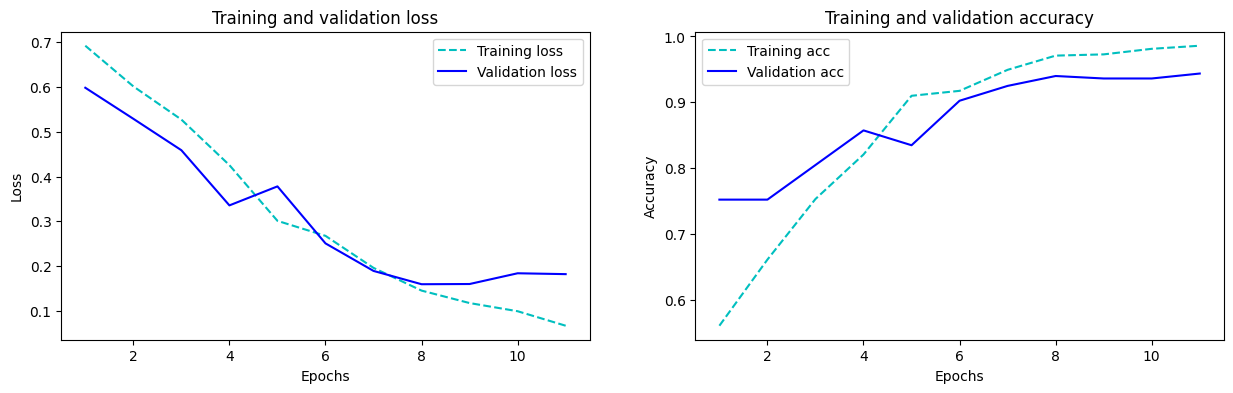

In [ ]:
fn.show_result(history_rnn_grid)

- Convert tflite model

In [ ]:
run_model = tf.function(lambda x: rnn_grid(x))
# This is important, let's fix the input size.
BATCH_SIZE = 1
STEPS =max_len

concrete_func = run_model.get_concrete_function(
    tf.TensorSpec([BATCH_SIZE,STEPS], rnn_grid.inputs[0].dtype))


# model directory.
MODEL_DIR = "keras_rnn"
rnn_grid.save(MODEL_DIR, save_format="tf", signatures=concrete_func)

converter = tf.lite.TFLiteConverter.from_saved_model(MODEL_DIR)
tflite_model = converter.convert()
# Save the TensorFlow Lite model to a file
file = open('thrnn_grid.tflite', 'wb')
file.write(tflite_model)
file.close()



In [ ]:
# Load the TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path='thrnn_grid.tflite')
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print("Input details:", input_details)
print("Output details:", output_details)

Input details: [{'name': 'serving_default_x:0', 'index': 0, 'shape': array([  1, 109], dtype=int32), 'shape_signature': array([  1, 109], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
Output details: [{'name': 'StatefulPartitionedCall:0', 'index': 31, 'shape': array([1, 1], dtype=int32), 'shape_signature': array([1, 1], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


- Check the saved Tflite model to see if it works efficiently

In [ ]:
# Load the TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path='thrnn_grid.tflite')
interpreter.allocate_tensors()

# Get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()


from sklearn.metrics import accuracy_score

# Initialize an empty list to store the predictions
predictions = []

# Iterate over each sample in the test dataset
for i in range(len(testdata)):
    # Get the input sequence for the current sample and convert it to FLOAT32
    input_sequence_float32 = testdata[i].reshape(1, -1).astype(np.float32)

    # Perform inference
    interpreter.set_tensor(input_details[0]['index'], input_sequence_float32)
    interpreter.invoke()

    # Get the output
    output_data = interpreter.get_tensor(output_details[0]['index'])

    # Convert output to binary prediction
    binary_prediction = (output_data > 0.5).astype(int)

    # Append the prediction to the list
    predictions.append(binary_prediction[0])

# accuracy for test data
accuracy3 = accuracy_score(labeltest, predictions)

# Print the accuracy for test data
print("Accuracy :", accuracy3)


Accuracy : 0.5


In [ ]:
# Display the predictions for each text
for i in range(len(test_data)):
    print("Text:", test_data['processed_sentence'][i])
    print("True Label:", labeltest[i])
    print("Predicted Label:", predictions[i])
    print()

Text: ﻿ รับ   รวม   สูงสุด   เมื่อ   ช้อป   แบรนด์   ดัง   ระดับโลก   ผ่าน   บริการ   เฉพาะ   ลูกค้า   บัตรเครดิต   วัน   สยาม   กสิกร   ไทย   เท่านั้น   ช้อป   เลย   คลิก
True Label: 1
Predicted Label: [0]

Text: สินค้า   ซ่อม   เสร็จ   แล้ว   สามารถ   ติดต่อ   รับ   สินค้า   คืน   ได้ที่   ศูนย์   บริการ
True Label: 0
Predicted Label: [1]

Text: คุณ   ได้รับ   สิทธิ์   ยื่น   สินเชื่อ   ติดต่อ
True Label: 1
Predicted Label: [1]

Text: รบกวน   ติดต่อ   ฝ่าย   บริการ   เพื่อ   ยืนยัน   รับ   ของ   ที่   ท่าน   ได้   สั่ง   ผ่าน   ทาง   บริการ   ออนไลน์
True Label: 0
Predicted Label: [1]

Text: ช้อป   ออนไลน์   ใช้   คูปอง   ลด   เพิ่ม   แล้ว   รับ   เพิ่ม   ที่   ถึง   กรกฎาคม   เท่านั้น   ช้อป   เลย   คลิก
True Label: 1
Predicted Label: [0]

Text: พิเศษ   เฉพาะ   ลูกค้า   ใหม่   รับ   คูปอง   ส่วนลด   สั่ง   พิซซ่า   หน้า   โปรด   ฟรี   ที่   แอ   ป
True Label: 0
Predicted Label: [0]

Text: ขออภัย   พัสดุ   ของ   ท่าน   จัดส่ง   ไม่   สำเร็จ   กรุณา   ตรวจสอบ   และ   ยืนยัน   การจัดส่

# GRU

- Use Gridsearch

In [ ]:
# Define a function to create the Keras model
def create_model_gru():
    model = Sequential()
    # Add layers to the model
    model.add(Embedding(input_dim=vocab_size, output_dim=max_len, input_length=max_len))
    model.add(GRU(32, return_sequences=True))
    model.add(Dropout(0.5))
    model.add(GRU(32))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create a KerasClassifier wrapper for use in GridSearchCV
gru_grid= KerasClassifier(build_fn=create_model_gru, verbose=1)

# Define the parameters to search
param_grid = {
    # Define the hyperparameters to search
    'epochs': [10, 20, 30],
    'batch_size': [32, 64, 128]
}


In [ ]:
# Create the GridSearchCV object
gru_grid_search = GridSearchCV(estimator= gru_grid, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1)

# Fit the grid search to the training data with early stopping callback
gru_grid_search.fit(x_train, Y_train, validation_data=(x_test, Y_test), callbacks=callbacks)



Fitting 3 folds for each of 9 candidates, totalling 27 fits


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
23/23 [==============================] - 9s 149ms/step - loss: 0.6924 - accuracy: 0.5205 - val_loss: 0.6863 - val_accuracy: 0.6880
Epoch 2/10
23/23 [==============================] - 3s 110ms/step - loss: 0.6633 - accuracy: 0.7151 - val_loss: 0.5975 - val_accuracy: 0.8684
Epoch 3/10
23/23 [==============================] - 3s 116ms/step - loss: 0.4043 - accuracy: 0.8984 - val_loss: 0.2829 - val_accuracy: 0.8947
Epoch 4/10
23/23 [==============================] - 4s 171ms/step - loss: 0.1502 - accuracy: 0.9549 - val_loss: 0.2830 - val_accuracy: 0.8835
Epoch 5/10
23/23 [==============================] - 3s 111ms/step - loss: 0.0781 - accuracy: 0.9774 - val_loss: 0.2043 - val_accuracy: 0.9248
Epoch 6/10
23/23 [==============================] - 2s 105ms/step - loss: 0.0268 - accuracy: 0.9958 - val_loss: 0.2831 - val_accuracy: 0.9211
Epoch 7/10
23/23 [==============================] - 3s 115ms/step - loss: 0.0120 - accuracy: 0.9986 - val_loss: 0.3664 - val_accuracy: 0.9135
Epoch 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
23/23 [==============================] - 11s 219ms/step - loss: 0.6905 - accuracy: 0.5247 - val_loss: 0.6868 - val_accuracy: 0.5602
Epoch 2/10
23/23 [==============================] - 3s 141ms/step - loss: 0.6712 - accuracy: 0.6629 - val_loss: 0.6326 - val_accuracy: 0.8571
Epoch 3/10
23/23 [==============================] - 3s 135ms/step - loss: 0.4676 - accuracy: 0.8872 - val_loss: 0.2988 - val_accuracy: 0.8759
Epoch 4/10
23/23 [==============================] - 5s 213ms/step - loss: 0.2015 - accuracy: 0.9394 - val_loss: 0.2602 - val_accuracy: 0.8947
Epoch 5/10
23/23 [==============================] - 3s 134ms/step - loss: 0.0797 - accuracy: 0.9803 - val_loss: 0.2277 - val_accuracy: 0.9323
Epoch 6/10
23/23 [==============================] - 3s 136ms/step - loss: 0.0352 - accuracy: 0.9915 - val_loss: 0.2111 - val_accuracy: 0.9398
Epoch 7/10
23/23 [==============================] - 3s 139ms/step - loss: 0.0138 - accuracy: 1.0000 - val_loss: 0.2712 - val_accuracy: 0.9323
Epoch

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
23/23 [==============================] - 10s 181ms/step - loss: 0.6915 - accuracy: 0.5324 - val_loss: 0.6860 - val_accuracy: 0.7030
Epoch 2/10
23/23 [==============================] - 3s 133ms/step - loss: 0.6493 - accuracy: 0.7197 - val_loss: 0.5360 - val_accuracy: 0.8647
Epoch 3/10
23/23 [==============================] - 5s 212ms/step - loss: 0.3304 - accuracy: 0.9070 - val_loss: 0.3459 - val_accuracy: 0.8722
Epoch 4/10
23/23 [==============================] - 3s 140ms/step - loss: 0.1627 - accuracy: 0.9549 - val_loss: 0.2479 - val_accuracy: 0.9211
Epoch 5/10
23/23 [==============================] - 3s 135ms/step - loss: 0.0810 - accuracy: 0.9803 - val_loss: 0.3453 - val_accuracy: 0.9098
Epoch 6/10
23/23 [==============================] - 3s 131ms/step - loss: 0.0429 - accuracy: 0.9944 - val_loss: 0.2592 - val_accuracy: 0.9436
Epoch 7/10
23/23 [==============================] - 5s 207ms/step - loss: 0.0336 - accuracy: 0.9944 - val_loss: 0.2855 - val_accuracy: 0.9211
Epoch

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
23/23 [==============================] - 10s 244ms/step - loss: 0.6906 - accuracy: 0.5402 - val_loss: 0.6845 - val_accuracy: 0.7669
Epoch 2/20
23/23 [==============================] - 3s 130ms/step - loss: 0.6655 - accuracy: 0.7165 - val_loss: 0.6095 - val_accuracy: 0.8534
Epoch 3/20
23/23 [==============================] - 3s 140ms/step - loss: 0.4308 - accuracy: 0.8646 - val_loss: 0.3147 - val_accuracy: 0.8609
Epoch 4/20
23/23 [==============================] - 3s 149ms/step - loss: 0.1655 - accuracy: 0.9535 - val_loss: 0.2582 - val_accuracy: 0.8910
Epoch 5/20
23/23 [==============================] - 4s 182ms/step - loss: 0.0756 - accuracy: 0.9873 - val_loss: 0.1686 - val_accuracy: 0.9361
Epoch 6/20
23/23 [==============================] - 3s 125ms/step - loss: 0.0430 - accuracy: 0.9887 - val_loss: 0.2091 - val_accuracy: 0.9361
Epoch 7/20
23/23 [==============================] - 3s 126ms/step - loss: 0.0145 - accuracy: 1.0000 - val_loss: 0.2210 - val_accuracy: 0.9511
Epoch

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
23/23 [==============================] - 9s 174ms/step - loss: 0.6885 - accuracy: 0.5501 - val_loss: 0.6692 - val_accuracy: 0.7895
Epoch 2/20
23/23 [==============================] - 3s 119ms/step - loss: 0.5919 - accuracy: 0.8068 - val_loss: 0.3951 - val_accuracy: 0.8722
Epoch 3/20
23/23 [==============================] - 4s 183ms/step - loss: 0.2500 - accuracy: 0.9168 - val_loss: 0.2113 - val_accuracy: 0.9286
Epoch 4/20
23/23 [==============================] - 3s 119ms/step - loss: 0.1070 - accuracy: 0.9732 - val_loss: 0.1582 - val_accuracy: 0.9436
Epoch 5/20
23/23 [==============================] - 3s 124ms/step - loss: 0.0372 - accuracy: 0.9915 - val_loss: 0.1875 - val_accuracy: 0.9398
Epoch 6/20
23/23 [==============================] - 3s 119ms/step - loss: 0.0186 - accuracy: 0.9972 - val_loss: 0.2395 - val_accuracy: 0.9361
Epoch 7/20
23/23 [==============================] - 4s 155ms/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.2511 - val_accuracy: 0.9511
Epoch 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
23/23 [==============================] - 11s 261ms/step - loss: 0.6890 - accuracy: 0.5662 - val_loss: 0.6792 - val_accuracy: 0.6842
Epoch 2/20
23/23 [==============================] - 3s 119ms/step - loss: 0.6233 - accuracy: 0.7225 - val_loss: 0.4841 - val_accuracy: 0.8684
Epoch 3/20
23/23 [==============================] - 3s 112ms/step - loss: 0.3330 - accuracy: 0.9113 - val_loss: 0.3076 - val_accuracy: 0.8684
Epoch 4/20
23/23 [==============================] - 4s 156ms/step - loss: 0.1492 - accuracy: 0.9606 - val_loss: 0.2699 - val_accuracy: 0.9135
Epoch 5/20
23/23 [==============================] - 3s 138ms/step - loss: 0.0805 - accuracy: 0.9803 - val_loss: 0.2662 - val_accuracy: 0.9248
Epoch 6/20
23/23 [==============================] - 3s 117ms/step - loss: 0.0459 - accuracy: 0.9915 - val_loss: 0.2355 - val_accuracy: 0.9323
Epoch 7/20
23/23 [==============================] - 3s 123ms/step - loss: 0.0247 - accuracy: 0.9958 - val_loss: 0.2880 - val_accuracy: 0.9248
Epoch

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/30
23/23 [==============================] - 8s 147ms/step - loss: 0.6895 - accuracy: 0.5190 - val_loss: 0.6771 - val_accuracy: 0.5301
Epoch 2/30
23/23 [==============================] - 3s 142ms/step - loss: 0.6400 - accuracy: 0.6728 - val_loss: 0.5559 - val_accuracy: 0.7932
Epoch 3/30
23/23 [==============================] - 3s 141ms/step - loss: 0.3951 - accuracy: 0.9041 - val_loss: 0.2686 - val_accuracy: 0.8872
Epoch 4/30
23/23 [==============================] - 3s 116ms/step - loss: 0.1521 - accuracy: 0.9633 - val_loss: 0.1882 - val_accuracy: 0.9248
Epoch 5/30
23/23 [==============================] - 3s 115ms/step - loss: 0.0680 - accuracy: 0.9859 - val_loss: 0.2469 - val_accuracy: 0.9060
Epoch 6/30
23/23 [==============================] - 2s 106ms/step - loss: 0.0373 - accuracy: 0.9901 - val_loss: 0.2332 - val_accuracy: 0.9436
Epoch 7/30
23/23 [==============================] - 3s 153ms/step - loss: 0.0278 - accuracy: 0.9958 - val_loss: 0.3964 - val_accuracy: 0.9023
Epoch 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/30
23/23 [==============================] - 9s 147ms/step - loss: 0.6883 - accuracy: 0.5176 - val_loss: 0.6782 - val_accuracy: 0.6165
Epoch 2/30
23/23 [==============================] - 3s 114ms/step - loss: 0.6226 - accuracy: 0.7137 - val_loss: 0.5000 - val_accuracy: 0.8459
Epoch 3/30
23/23 [==============================] - 3s 127ms/step - loss: 0.3438 - accuracy: 0.9055 - val_loss: 0.2754 - val_accuracy: 0.9023
Epoch 4/30
23/23 [==============================] - 4s 175ms/step - loss: 0.1647 - accuracy: 0.9605 - val_loss: 0.1733 - val_accuracy: 0.9286
Epoch 5/30
23/23 [==============================] - 3s 109ms/step - loss: 0.0492 - accuracy: 0.9929 - val_loss: 0.2017 - val_accuracy: 0.9398
Epoch 6/30
23/23 [==============================] - 2s 104ms/step - loss: 0.0550 - accuracy: 0.9901 - val_loss: 0.2347 - val_accuracy: 0.9361
Epoch 7/30
23/23 [==============================] - 3s 111ms/step - loss: 0.0258 - accuracy: 0.9986 - val_loss: 0.2484 - val_accuracy: 0.9436
Epoch 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/30
23/23 [==============================] - 8s 157ms/step - loss: 0.6890 - accuracy: 0.5620 - val_loss: 0.6821 - val_accuracy: 0.6880
Epoch 2/30
23/23 [==============================] - 3s 123ms/step - loss: 0.6544 - accuracy: 0.7056 - val_loss: 0.5790 - val_accuracy: 0.8383
Epoch 3/30
23/23 [==============================] - 4s 170ms/step - loss: 0.3842 - accuracy: 0.8930 - val_loss: 0.3382 - val_accuracy: 0.8797
Epoch 4/30
23/23 [==============================] - 2s 103ms/step - loss: 0.1710 - accuracy: 0.9521 - val_loss: 0.2671 - val_accuracy: 0.9211
Epoch 5/30
23/23 [==============================] - 2s 108ms/step - loss: 0.0863 - accuracy: 0.9789 - val_loss: 0.3091 - val_accuracy: 0.9248
Epoch 6/30
23/23 [==============================] - 3s 112ms/step - loss: 0.0502 - accuracy: 0.9901 - val_loss: 0.2871 - val_accuracy: 0.9248
Epoch 7/30
23/23 [==============================] - 2s 107ms/step - loss: 0.0549 - accuracy: 0.9845 - val_loss: 0.2959 - val_accuracy: 0.9135
Epoch 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
12/12 [==============================] - 7s 207ms/step - loss: 0.6917 - accuracy: 0.5219 - val_loss: 0.6886 - val_accuracy: 0.5188
Epoch 2/10
12/12 [==============================] - 1s 124ms/step - loss: 0.6822 - accuracy: 0.6023 - val_loss: 0.6701 - val_accuracy: 0.7782
Epoch 3/10
12/12 [==============================] - 2s 178ms/step - loss: 0.6462 - accuracy: 0.7729 - val_loss: 0.5989 - val_accuracy: 0.8008
Epoch 4/10
12/12 [==============================] - 3s 218ms/step - loss: 0.4931 - accuracy: 0.8745 - val_loss: 0.3542 - val_accuracy: 0.8759
Epoch 5/10
12/12 [==============================] - 1s 122ms/step - loss: 0.2543 - accuracy: 0.9309 - val_loss: 0.2801 - val_accuracy: 0.8947
Epoch 6/10
12/12 [==============================] - 1s 124ms/step - loss: 0.1559 - accuracy: 0.9633 - val_loss: 0.2392 - val_accuracy: 0.9023
Epoch 7/10
12/12 [==============================] - 1s 124ms/step - loss: 0.0710 - accuracy: 0.9887 - val_loss: 0.1873 - val_accuracy: 0.9248
Epoch 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
12/12 [==============================] - 11s 250ms/step - loss: 0.6917 - accuracy: 0.5472 - val_loss: 0.6887 - val_accuracy: 0.6880
Epoch 2/10
12/12 [==============================] - 2s 190ms/step - loss: 0.6852 - accuracy: 0.6234 - val_loss: 0.6754 - val_accuracy: 0.7632
Epoch 3/10
12/12 [==============================] - 3s 247ms/step - loss: 0.6553 - accuracy: 0.7560 - val_loss: 0.6170 - val_accuracy: 0.8684
Epoch 4/10
12/12 [==============================] - 2s 166ms/step - loss: 0.5367 - accuracy: 0.8956 - val_loss: 0.3998 - val_accuracy: 0.8759
Epoch 5/10
12/12 [==============================] - 2s 155ms/step - loss: 0.2777 - accuracy: 0.9351 - val_loss: 0.2717 - val_accuracy: 0.8797
Epoch 6/10
12/12 [==============================] - 2s 168ms/step - loss: 0.1604 - accuracy: 0.9577 - val_loss: 0.1972 - val_accuracy: 0.9173
Epoch 7/10
12/12 [==============================] - 2s 168ms/step - loss: 0.0784 - accuracy: 0.9873 - val_loss: 0.2556 - val_accuracy: 0.9060
Epoch

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
12/12 [==============================] - 7s 231ms/step - loss: 0.6909 - accuracy: 0.5718 - val_loss: 0.6841 - val_accuracy: 0.7368
Epoch 2/10
12/12 [==============================] - 3s 245ms/step - loss: 0.6749 - accuracy: 0.6648 - val_loss: 0.6560 - val_accuracy: 0.7481
Epoch 3/10
12/12 [==============================] - 2s 192ms/step - loss: 0.6191 - accuracy: 0.7859 - val_loss: 0.5515 - val_accuracy: 0.8308
Epoch 4/10
12/12 [==============================] - 2s 153ms/step - loss: 0.4411 - accuracy: 0.8986 - val_loss: 0.3780 - val_accuracy: 0.8684
Epoch 5/10
12/12 [==============================] - 2s 167ms/step - loss: 0.2646 - accuracy: 0.9394 - val_loss: 0.2927 - val_accuracy: 0.8872
Epoch 6/10
12/12 [==============================] - 2s 171ms/step - loss: 0.1538 - accuracy: 0.9592 - val_loss: 0.2457 - val_accuracy: 0.9135
Epoch 7/10
12/12 [==============================] - 2s 164ms/step - loss: 0.1002 - accuracy: 0.9746 - val_loss: 0.2609 - val_accuracy: 0.9248
Epoch 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
12/12 [==============================] - 9s 357ms/step - loss: 0.6923 - accuracy: 0.5289 - val_loss: 0.6901 - val_accuracy: 0.6880
Epoch 2/20
12/12 [==============================] - 2s 167ms/step - loss: 0.6846 - accuracy: 0.6333 - val_loss: 0.6784 - val_accuracy: 0.7406
Epoch 3/20
12/12 [==============================] - 2s 163ms/step - loss: 0.6580 - accuracy: 0.7687 - val_loss: 0.6265 - val_accuracy: 0.8571
Epoch 4/20
12/12 [==============================] - 2s 164ms/step - loss: 0.5434 - accuracy: 0.8914 - val_loss: 0.4198 - val_accuracy: 0.8722
Epoch 5/20
12/12 [==============================] - 2s 151ms/step - loss: 0.2745 - accuracy: 0.9351 - val_loss: 0.2873 - val_accuracy: 0.8647
Epoch 6/20
12/12 [==============================] - 2s 153ms/step - loss: 0.1478 - accuracy: 0.9605 - val_loss: 0.2526 - val_accuracy: 0.9135
Epoch 7/20
12/12 [==============================] - 3s 257ms/step - loss: 0.0762 - accuracy: 0.9803 - val_loss: 0.1947 - val_accuracy: 0.9286
Epoch 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
12/12 [==============================] - 7s 246ms/step - loss: 0.6916 - accuracy: 0.5374 - val_loss: 0.6851 - val_accuracy: 0.5940
Epoch 2/20
12/12 [==============================] - 2s 198ms/step - loss: 0.6776 - accuracy: 0.6234 - val_loss: 0.6606 - val_accuracy: 0.7406
Epoch 3/20
12/12 [==============================] - 3s 256ms/step - loss: 0.6271 - accuracy: 0.7306 - val_loss: 0.5560 - val_accuracy: 0.8383
Epoch 4/20
12/12 [==============================] - 2s 146ms/step - loss: 0.4480 - accuracy: 0.8731 - val_loss: 0.3578 - val_accuracy: 0.8835
Epoch 5/20
12/12 [==============================] - 2s 158ms/step - loss: 0.2795 - accuracy: 0.9309 - val_loss: 0.2541 - val_accuracy: 0.8835
Epoch 6/20
12/12 [==============================] - 2s 161ms/step - loss: 0.1376 - accuracy: 0.9619 - val_loss: 0.2362 - val_accuracy: 0.8985
Epoch 7/20
12/12 [==============================] - 2s 161ms/step - loss: 0.0739 - accuracy: 0.9831 - val_loss: 0.1721 - val_accuracy: 0.9323
Epoch 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
12/12 [==============================] - 8s 222ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6903 - val_accuracy: 0.6654
Epoch 2/20
12/12 [==============================] - 2s 157ms/step - loss: 0.6881 - accuracy: 0.6056 - val_loss: 0.6822 - val_accuracy: 0.7481
Epoch 3/20
12/12 [==============================] - 2s 144ms/step - loss: 0.6660 - accuracy: 0.7352 - val_loss: 0.6350 - val_accuracy: 0.8571
Epoch 4/20
12/12 [==============================] - 2s 169ms/step - loss: 0.5533 - accuracy: 0.8620 - val_loss: 0.4147 - val_accuracy: 0.8722
Epoch 5/20
12/12 [==============================] - 3s 223ms/step - loss: 0.3089 - accuracy: 0.9254 - val_loss: 0.3192 - val_accuracy: 0.8722
Epoch 6/20
12/12 [==============================] - 2s 156ms/step - loss: 0.1850 - accuracy: 0.9592 - val_loss: 0.2583 - val_accuracy: 0.9211
Epoch 7/20
12/12 [==============================] - 2s 133ms/step - loss: 0.1174 - accuracy: 0.9690 - val_loss: 0.2255 - val_accuracy: 0.9323
Epoch 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/30
12/12 [==============================] - 8s 272ms/step - loss: 0.6921 - accuracy: 0.5346 - val_loss: 0.6890 - val_accuracy: 0.6917
Epoch 2/30
12/12 [==============================] - 3s 246ms/step - loss: 0.6849 - accuracy: 0.6121 - val_loss: 0.6719 - val_accuracy: 0.6729
Epoch 3/30
12/12 [==============================] - 2s 138ms/step - loss: 0.6425 - accuracy: 0.7109 - val_loss: 0.5982 - val_accuracy: 0.7481
Epoch 4/30
12/12 [==============================] - 2s 138ms/step - loss: 0.4904 - accuracy: 0.8519 - val_loss: 0.3647 - val_accuracy: 0.8872
Epoch 5/30
12/12 [==============================] - 2s 140ms/step - loss: 0.2681 - accuracy: 0.9252 - val_loss: 0.2868 - val_accuracy: 0.8947
Epoch 6/30
12/12 [==============================] - 2s 138ms/step - loss: 0.1314 - accuracy: 0.9690 - val_loss: 0.2191 - val_accuracy: 0.9135
Epoch 7/30
12/12 [==============================] - 2s 141ms/step - loss: 0.0734 - accuracy: 0.9817 - val_loss: 0.2126 - val_accuracy: 0.9398
Epoch 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/30
12/12 [==============================] - 8s 216ms/step - loss: 0.6898 - accuracy: 0.5628 - val_loss: 0.6807 - val_accuracy: 0.6805
Epoch 2/30
12/12 [==============================] - 2s 135ms/step - loss: 0.6658 - accuracy: 0.6841 - val_loss: 0.6385 - val_accuracy: 0.7218
Epoch 3/30
12/12 [==============================] - 2s 128ms/step - loss: 0.5854 - accuracy: 0.7687 - val_loss: 0.4925 - val_accuracy: 0.8684
Epoch 4/30
12/12 [==============================] - 2s 138ms/step - loss: 0.3779 - accuracy: 0.9238 - val_loss: 0.3237 - val_accuracy: 0.8797
Epoch 5/30
12/12 [==============================] - 2s 207ms/step - loss: 0.2209 - accuracy: 0.9408 - val_loss: 0.2622 - val_accuracy: 0.8835
Epoch 6/30
12/12 [==============================] - 2s 207ms/step - loss: 0.1074 - accuracy: 0.9760 - val_loss: 0.1951 - val_accuracy: 0.9398
Epoch 7/30
12/12 [==============================] - 2s 133ms/step - loss: 0.0703 - accuracy: 0.9803 - val_loss: 0.2854 - val_accuracy: 0.8835
Epoch 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/30
12/12 [==============================] - 8s 281ms/step - loss: 0.6928 - accuracy: 0.5056 - val_loss: 0.6887 - val_accuracy: 0.6165
Epoch 2/30
12/12 [==============================] - 2s 181ms/step - loss: 0.6808 - accuracy: 0.6394 - val_loss: 0.6705 - val_accuracy: 0.6654
Epoch 3/30
12/12 [==============================] - 2s 128ms/step - loss: 0.6391 - accuracy: 0.7563 - val_loss: 0.5917 - val_accuracy: 0.7744
Epoch 4/30
12/12 [==============================] - 2s 136ms/step - loss: 0.4767 - accuracy: 0.8718 - val_loss: 0.3595 - val_accuracy: 0.8910
Epoch 5/30
12/12 [==============================] - 2s 128ms/step - loss: 0.2321 - accuracy: 0.9380 - val_loss: 0.2821 - val_accuracy: 0.9023
Epoch 6/30
12/12 [==============================] - 1s 125ms/step - loss: 0.1318 - accuracy: 0.9662 - val_loss: 0.2765 - val_accuracy: 0.9098
Epoch 7/30
12/12 [==============================] - 1s 124ms/step - loss: 0.0729 - accuracy: 0.9817 - val_loss: 0.2599 - val_accuracy: 0.9436
Epoch 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
6/6 [==============================] - 6s 365ms/step - loss: 0.6920 - accuracy: 0.5219 - val_loss: 0.6897 - val_accuracy: 0.6429
Epoch 2/10
6/6 [==============================] - 1s 167ms/step - loss: 0.6879 - accuracy: 0.5853 - val_loss: 0.6826 - val_accuracy: 0.7218
Epoch 3/10
6/6 [==============================] - 1s 169ms/step - loss: 0.6751 - accuracy: 0.6953 - val_loss: 0.6639 - val_accuracy: 0.8421
Epoch 4/10
6/6 [==============================] - 1s 172ms/step - loss: 0.6482 - accuracy: 0.8025 - val_loss: 0.6232 - val_accuracy: 0.8534
Epoch 5/10
6/6 [==============================] - 1s 248ms/step - loss: 0.5872 - accuracy: 0.8773 - val_loss: 0.5360 - val_accuracy: 0.8910
Epoch 6/10
6/6 [==============================] - 2s 321ms/step - loss: 0.4689 - accuracy: 0.9252 - val_loss: 0.3821 - val_accuracy: 0.8835
Epoch 7/10
6/6 [==============================] - 1s 232ms/step - loss: 0.2981 - accuracy: 0.9351 - val_loss: 0.2855 - val_accuracy: 0.8835
Epoch 8/10
6/6 [====

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
6/6 [==============================] - 11s 1s/step - loss: 0.6923 - accuracy: 0.5219 - val_loss: 0.6891 - val_accuracy: 0.6842
Epoch 2/10
6/6 [==============================] - 2s 269ms/step - loss: 0.6857 - accuracy: 0.6178 - val_loss: 0.6804 - val_accuracy: 0.7556
Epoch 3/10
6/6 [==============================] - 1s 242ms/step - loss: 0.6704 - accuracy: 0.6911 - val_loss: 0.6598 - val_accuracy: 0.7331
Epoch 4/10
6/6 [==============================] - 2s 272ms/step - loss: 0.6401 - accuracy: 0.7024 - val_loss: 0.6122 - val_accuracy: 0.7895
Epoch 5/10
6/6 [==============================] - 1s 247ms/step - loss: 0.5643 - accuracy: 0.8364 - val_loss: 0.5092 - val_accuracy: 0.8759
Epoch 6/10
6/6 [==============================] - 2s 295ms/step - loss: 0.4289 - accuracy: 0.8999 - val_loss: 0.3728 - val_accuracy: 0.8947
Epoch 7/10
6/6 [==============================] - 2s 383ms/step - loss: 0.2947 - accuracy: 0.9323 - val_loss: 0.2941 - val_accuracy: 0.8947
Epoch 8/10
6/6 [======

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
6/6 [==============================] - 7s 440ms/step - loss: 0.6917 - accuracy: 0.5352 - val_loss: 0.6896 - val_accuracy: 0.5526
Epoch 2/10
6/6 [==============================] - 1s 244ms/step - loss: 0.6868 - accuracy: 0.5831 - val_loss: 0.6816 - val_accuracy: 0.5940
Epoch 3/10
6/6 [==============================] - 2s 377ms/step - loss: 0.6687 - accuracy: 0.7099 - val_loss: 0.6555 - val_accuracy: 0.8008
Epoch 4/10
6/6 [==============================] - 2s 377ms/step - loss: 0.6254 - accuracy: 0.8324 - val_loss: 0.5909 - val_accuracy: 0.8835
Epoch 5/10
6/6 [==============================] - 2s 270ms/step - loss: 0.5250 - accuracy: 0.9028 - val_loss: 0.4589 - val_accuracy: 0.8797
Epoch 6/10
6/6 [==============================] - 2s 270ms/step - loss: 0.3645 - accuracy: 0.9211 - val_loss: 0.3408 - val_accuracy: 0.8722
Epoch 7/10
6/6 [==============================] - 2s 260ms/step - loss: 0.2628 - accuracy: 0.9310 - val_loss: 0.3386 - val_accuracy: 0.8759
Epoch 8/10
6/6 [====

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
6/6 [==============================] - 7s 452ms/step - loss: 0.6912 - accuracy: 0.5388 - val_loss: 0.6878 - val_accuracy: 0.5865
Epoch 2/20
6/6 [==============================] - 2s 263ms/step - loss: 0.6828 - accuracy: 0.6446 - val_loss: 0.6775 - val_accuracy: 0.7707
Epoch 3/20
6/6 [==============================] - 2s 264ms/step - loss: 0.6662 - accuracy: 0.7687 - val_loss: 0.6525 - val_accuracy: 0.8308
Epoch 4/20
6/6 [==============================] - 2s 329ms/step - loss: 0.6338 - accuracy: 0.8138 - val_loss: 0.6008 - val_accuracy: 0.8459
Epoch 5/20
6/6 [==============================] - 2s 393ms/step - loss: 0.5500 - accuracy: 0.8970 - val_loss: 0.4987 - val_accuracy: 0.8534
Epoch 6/20
6/6 [==============================] - 2s 262ms/step - loss: 0.4122 - accuracy: 0.9210 - val_loss: 0.3670 - val_accuracy: 0.8759
Epoch 7/20
6/6 [==============================] - 2s 281ms/step - loss: 0.2973 - accuracy: 0.9267 - val_loss: 0.2996 - val_accuracy: 0.8684
Epoch 8/20
6/6 [====

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
6/6 [==============================] - 7s 428ms/step - loss: 0.6920 - accuracy: 0.5162 - val_loss: 0.6906 - val_accuracy: 0.5714
Epoch 2/20
6/6 [==============================] - 2s 267ms/step - loss: 0.6891 - accuracy: 0.5684 - val_loss: 0.6853 - val_accuracy: 0.7331
Epoch 3/20
6/6 [==============================] - 1s 256ms/step - loss: 0.6827 - accuracy: 0.6432 - val_loss: 0.6752 - val_accuracy: 0.7556
Epoch 4/20
6/6 [==============================] - 2s 387ms/step - loss: 0.6667 - accuracy: 0.7221 - val_loss: 0.6531 - val_accuracy: 0.8233
Epoch 5/20
6/6 [==============================] - 2s 402ms/step - loss: 0.6322 - accuracy: 0.8364 - val_loss: 0.6072 - val_accuracy: 0.8609
Epoch 6/20
6/6 [==============================] - 2s 421ms/step - loss: 0.5597 - accuracy: 0.8745 - val_loss: 0.5092 - val_accuracy: 0.8759
Epoch 7/20
6/6 [==============================] - 1s 227ms/step - loss: 0.4227 - accuracy: 0.9210 - val_loss: 0.3445 - val_accuracy: 0.8985
Epoch 8/20
6/6 [====

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
6/6 [==============================] - 8s 418ms/step - loss: 0.6927 - accuracy: 0.5169 - val_loss: 0.6907 - val_accuracy: 0.6729
Epoch 2/20
6/6 [==============================] - 1s 214ms/step - loss: 0.6890 - accuracy: 0.5958 - val_loss: 0.6866 - val_accuracy: 0.7105
Epoch 3/20
6/6 [==============================] - 1s 214ms/step - loss: 0.6839 - accuracy: 0.6183 - val_loss: 0.6770 - val_accuracy: 0.7594
Epoch 4/20
6/6 [==============================] - 1s 243ms/step - loss: 0.6678 - accuracy: 0.7169 - val_loss: 0.6537 - val_accuracy: 0.7970
Epoch 5/20
6/6 [==============================] - 1s 233ms/step - loss: 0.6346 - accuracy: 0.7958 - val_loss: 0.6000 - val_accuracy: 0.8609
Epoch 6/20
6/6 [==============================] - 1s 210ms/step - loss: 0.5620 - accuracy: 0.8690 - val_loss: 0.4903 - val_accuracy: 0.8835
Epoch 7/20
6/6 [==============================] - 2s 325ms/step - loss: 0.4065 - accuracy: 0.9183 - val_loss: 0.3552 - val_accuracy: 0.8759
Epoch 8/20
6/6 [====

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/30
6/6 [==============================] - 7s 400ms/step - loss: 0.6935 - accuracy: 0.4880 - val_loss: 0.6906 - val_accuracy: 0.5113
Epoch 2/30
6/6 [==============================] - 2s 341ms/step - loss: 0.6880 - accuracy: 0.5896 - val_loss: 0.6833 - val_accuracy: 0.7105
Epoch 3/30
6/6 [==============================] - 2s 305ms/step - loss: 0.6747 - accuracy: 0.7433 - val_loss: 0.6653 - val_accuracy: 0.8008
Epoch 4/30
6/6 [==============================] - 1s 202ms/step - loss: 0.6450 - accuracy: 0.8209 - val_loss: 0.6256 - val_accuracy: 0.8308
Epoch 5/30
6/6 [==============================] - 1s 199ms/step - loss: 0.5821 - accuracy: 0.8829 - val_loss: 0.5394 - val_accuracy: 0.8609
Epoch 6/30
6/6 [==============================] - 1s 217ms/step - loss: 0.4555 - accuracy: 0.9224 - val_loss: 0.3896 - val_accuracy: 0.8835
Epoch 7/30
6/6 [==============================] - 1s 207ms/step - loss: 0.3019 - accuracy: 0.9337 - val_loss: 0.2805 - val_accuracy: 0.8872
Epoch 8/30
6/6 [====

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/30
6/6 [==============================] - 6s 366ms/step - loss: 0.6914 - accuracy: 0.5261 - val_loss: 0.6891 - val_accuracy: 0.5602
Epoch 2/30
6/6 [==============================] - 1s 207ms/step - loss: 0.6851 - accuracy: 0.5755 - val_loss: 0.6817 - val_accuracy: 0.6654
Epoch 3/30
6/6 [==============================] - 1s 196ms/step - loss: 0.6757 - accuracy: 0.5980 - val_loss: 0.6627 - val_accuracy: 0.6992
Epoch 4/30
6/6 [==============================] - 2s 306ms/step - loss: 0.6493 - accuracy: 0.6953 - val_loss: 0.6202 - val_accuracy: 0.7895
Epoch 5/30
6/6 [==============================] - 2s 336ms/step - loss: 0.5847 - accuracy: 0.8152 - val_loss: 0.5275 - val_accuracy: 0.8647
Epoch 6/30
6/6 [==============================] - 1s 201ms/step - loss: 0.4570 - accuracy: 0.9055 - val_loss: 0.3773 - val_accuracy: 0.8872
Epoch 7/30
6/6 [==============================] - 1s 196ms/step - loss: 0.3041 - accuracy: 0.9295 - val_loss: 0.2827 - val_accuracy: 0.8947
Epoch 8/30
6/6 [====

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/30
6/6 [==============================] - 9s 434ms/step - loss: 0.6932 - accuracy: 0.5099 - val_loss: 0.6920 - val_accuracy: 0.5150
Epoch 2/30
6/6 [==============================] - 2s 299ms/step - loss: 0.6899 - accuracy: 0.5775 - val_loss: 0.6890 - val_accuracy: 0.5602
Epoch 3/30
6/6 [==============================] - 2s 311ms/step - loss: 0.6856 - accuracy: 0.6423 - val_loss: 0.6816 - val_accuracy: 0.6917
Epoch 4/30
6/6 [==============================] - 1s 184ms/step - loss: 0.6747 - accuracy: 0.6944 - val_loss: 0.6644 - val_accuracy: 0.7556
Epoch 5/30
6/6 [==============================] - 1s 180ms/step - loss: 0.6441 - accuracy: 0.7972 - val_loss: 0.6234 - val_accuracy: 0.8534
Epoch 6/30
6/6 [==============================] - 1s 168ms/step - loss: 0.5859 - accuracy: 0.8845 - val_loss: 0.5302 - val_accuracy: 0.8872
Epoch 7/30
6/6 [==============================] - 1s 182ms/step - loss: 0.4518 - accuracy: 0.9239 - val_loss: 0.3797 - val_accuracy: 0.8797
Epoch 8/30
6/6 [====

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/30
17/17 [==============================] - 8s 183ms/step - loss: 0.6861 - accuracy: 0.5461 - val_loss: 0.6655 - val_accuracy: 0.7218
Epoch 2/30
17/17 [==============================] - 2s 140ms/step - loss: 0.6068 - accuracy: 0.8148 - val_loss: 0.4600 - val_accuracy: 0.8797
Epoch 3/30
17/17 [==============================] - 3s 173ms/step - loss: 0.3161 - accuracy: 0.9098 - val_loss: 0.2819 - val_accuracy: 0.8947
Epoch 4/30
17/17 [==============================] - 3s 205ms/step - loss: 0.1524 - accuracy: 0.9521 - val_loss: 0.2119 - val_accuracy: 0.9060
Epoch 5/30
17/17 [==============================] - 2s 122ms/step - loss: 0.0881 - accuracy: 0.9756 - val_loss: 0.1394 - val_accuracy: 0.9586
Epoch 6/30
17/17 [==============================] - 2s 144ms/step - loss: 0.0333 - accuracy: 0.9953 - val_loss: 0.1534 - val_accuracy: 0.9624
Epoch 7/30
17/17 [==============================] - 2s 136ms/step - loss: 0.0258 - accuracy: 0.9962 - val_loss: 0.1298 - val_accuracy: 0.9737
Epoch 

GridSearchCV(cv=3,
             estimator=KerasClassifier(build_fn=<function create_model_gru at 0x7d210cb17910>),
             param_grid={'batch_size': [32, 64, 128], 'epochs': [10, 20, 30]},
             scoring='accuracy', verbose=1)

- Best Parameter

In [ ]:
# Print the best parameters found
print("Best parameters:", gru_grid_search.best_params_)

# Print the best accuracy found
print("Best accuracy:", gru_grid_search.best_score_)

Best parameters: {'batch_size': 64, 'epochs': 30}
Best accuracy: 0.9388981724622689


In [ ]:
# Get the best model
best_model = gru_grid_search.best_estimator_

# Use the predict_proba method to get the predicted probabilities
y_pred_prob4 = best_model.predict_proba(x_test)

# Calculate the test loss manually using binary cross-entropy loss
from sklearn.metrics import log_loss
test_loss4 = log_loss(Y_test, y_pred_prob4)

# Print the test loss
print("Test loss of the best model:", test_loss4)


5/5 [==============================] - 1s 28ms/step
Test loss of the best model: 0.2155265289121136


- Best Accuracy

In [ ]:
from sklearn import metrics

# Print the loss and F1-score of the best model
print("best accuracy:", gru_grid_search.best_score_)

# Get the best estimator
best_model = gru_grid_search.best_estimator_

# Evaluate the best model on the test data
y_pred4 = best_model.predict(x_test)

# Calculate the F1-score
f1_score4 = metrics.f1_score(Y_test, y_pred4)

# Print the F1-score
print("F1-score of the best model on test data:", f1_score4)

# Print evaluation report of the best model
print("Evaluation report of the best model:")
print(metrics.classification_report(Y_test, y_pred4))


best accuracy: 0.9388981724622689
5/5 [==============================] - 0s 25ms/step
F1-score of the best model on test data: 0.9737827715355805
Evaluation report of the best model:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       133
           1       0.97      0.98      0.97       133

    accuracy                           0.97       266
   macro avg       0.97      0.97      0.97       266
weighted avg       0.97      0.97      0.97       266



- Use Best Parameter

- Model Training

In [ ]:
gru_grid = Sequential()
gru_grid.add(Embedding(input_dim=vocab_size, output_dim=max_len, input_length=max_len))
gru_grid.add(GRU(32, return_sequences=True))
gru_grid.add(Dropout(0.5))
gru_grid.add(GRU(32))
gru_grid.add(Dropout(0.5))
gru_grid.add(Dense(32, activation='relu'))
gru_grid.add(Dropout(0.5))
gru_grid.add(Dense(1, activation='sigmoid'))
gru_grid.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
gru_grid.summary()





Model: "sequential_115"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_115 (Embedding)   (None, 109, 109)          232933    
                                                                 
 gru_56 (GRU)                (None, 109, 32)           13728     
                                                                 
 dropout_345 (Dropout)       (None, 109, 32)           0         
                                                                 
 gru_57 (GRU)                (None, 32)                6336      
                                                                 
 dropout_346 (Dropout)       (None, 32)                0         
                                                                 
 dense_230 (Dense)           (None, 32)                1056      
                                                                 
 dropout_347 (Dropout)       (None, 32)             

In [ ]:
history_gru_grid = gru_grid.fit(x_train, Y_train, epochs=30, batch_size=64, validation_data=(x_test, Y_test), callbacks=callbacks)

Epoch 1/30
17/17 [==============================] - 9s 213ms/step - loss: 0.6912 - acc: 0.5348 - val_loss: 0.6858 - val_acc: 0.6316
Epoch 2/30
17/17 [==============================] - 3s 163ms/step - loss: 0.6659 - acc: 0.7162 - val_loss: 0.6168 - val_acc: 0.8571
Epoch 3/30
17/17 [==============================] - 2s 146ms/step - loss: 0.4543 - acc: 0.9023 - val_loss: 0.3381 - val_acc: 0.8647
Epoch 4/30
17/17 [==============================] - 3s 165ms/step - loss: 0.2308 - acc: 0.9352 - val_loss: 0.1811 - val_acc: 0.9286
Epoch 5/30
17/17 [==============================] - 4s 220ms/step - loss: 0.1128 - acc: 0.9699 - val_loss: 0.1134 - val_acc: 0.9586
Epoch 6/30
17/17 [==============================] - 2s 142ms/step - loss: 0.0546 - acc: 0.9915 - val_loss: 0.1190 - val_acc: 0.9737
Epoch 7/30
17/17 [==============================] - 3s 150ms/step - loss: 0.0212 - acc: 0.9972 - val_loss: 0.1198 - val_acc: 0.9774
Epoch 8/30
17/17 [==============================] - 3s 159ms/step - loss: 0.

- Model Evaluation

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = gru_grid.evaluate(x_test, Y_test)
print(f'Test accuracy: {test_acc * 100:.2f}%')
print(f'Test loss: {test_loss * 100:.2f}%')

9/9 [==============================] - 0s 28ms/step - loss: 0.1134 - acc: 0.9586
Test accuracy: 95.86%
Test loss: 11.34%


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred4 = gru_grid.predict(x_test)
y_pred_binary4 = (y_pred4 > 0.5).astype(int)

conf_matrix4 = confusion_matrix(Y_test, y_pred_binary4)
print("Confusion Matrix:")
print(conf_matrix4)

classification_rep4 = classification_report(Y_test, y_pred_binary4)
print("Classification Report:")
print(classification_rep4)

9/9 [==============================] - 1s 30ms/step
Confusion Matrix:
[[125   8]
 [  3 130]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       133
           1       0.94      0.98      0.96       133

    accuracy                           0.96       266
   macro avg       0.96      0.96      0.96       266
weighted avg       0.96      0.96      0.96       266



Last train accuracy: 0.9962406158447266
Last validation accuracy: 0.9473684430122375


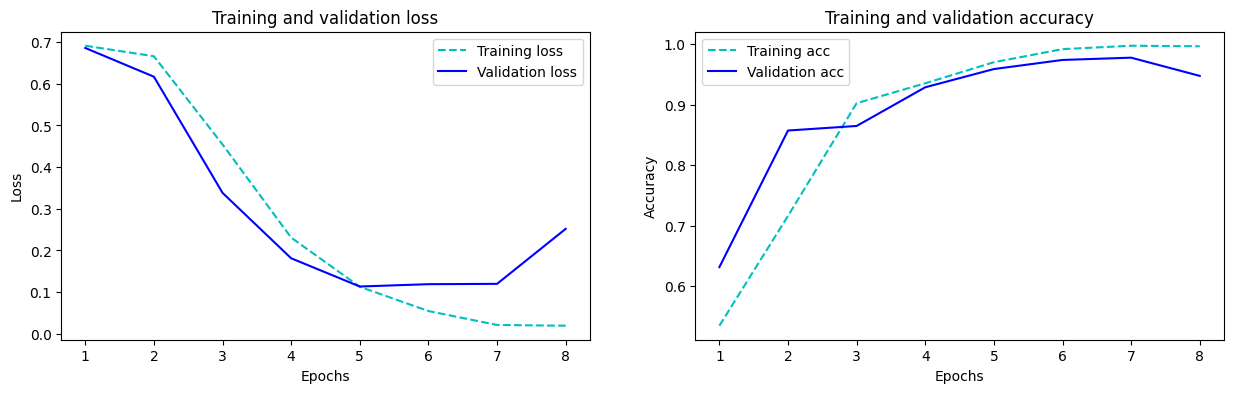

In [ ]:
fn.show_result(history_gru_grid)

In [ ]:
run_model = tf.function(lambda x: gru_grid(x))
# This is important, let's fix the input size.
BATCH_SIZE = 1
STEPS =max_len

concrete_func = run_model.get_concrete_function(
    tf.TensorSpec([BATCH_SIZE,STEPS], gru_grid.inputs[0].dtype))


# model directory.
MODEL_DIR = "keras_gru"
gru_grid.save(MODEL_DIR, save_format="tf", signatures=concrete_func)

converter = tf.lite.TFLiteConverter.from_saved_model(MODEL_DIR)
tflite_model = converter.convert()
# Save the TensorFlow Lite model to a file
file = open('thgru_grid.tflite', 'wb')
file.write(tflite_model)
file.close()



In [ ]:
# Load the TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path='thgru_grid.tflite')
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print("Input details:", input_details)
print("Output details:", output_details)

Input details: [{'name': 'serving_default_x:0', 'index': 0, 'shape': array([  1, 109], dtype=int32), 'shape_signature': array([  1, 109], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
Output details: [{'name': 'StatefulPartitionedCall:0', 'index': 35, 'shape': array([1, 1], dtype=int32), 'shape_signature': array([1, 1], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


- Convert tflite model

In [ ]:
# Load the TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path='thgru_grid.tflite')
interpreter.allocate_tensors()

# Get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()


from sklearn.metrics import accuracy_score

# Initialize an empty list to store the predictions
predictions = []

# Iterate over each sample in the test dataset
for i in range(len(testdata)):
    # Get the input sequence for the current sample and convert it to FLOAT32
    input_sequence_float32 = testdata[i].reshape(1, -1).astype(np.float32)

    # Perform inference
    interpreter.set_tensor(input_details[0]['index'], input_sequence_float32)
    interpreter.invoke()

    # Get the output
    output_data = interpreter.get_tensor(output_details[0]['index'])

    # Convert output to binary prediction
    binary_prediction = (output_data > 0.5).astype(int)

    # Append the prediction to the list
    predictions.append(binary_prediction[0])

# accuracy for test data
accuracy2= accuracy_score(labeltest, predictions)

# Print the accuracy for test data
print("Accuracy :", accuracy2)


Accuracy : 0.4


In [ ]:
# Display the predictions for each text
for i in range(len(test_data)):
    print("Text:", test_data['processed_sentence'][i])
    print("True Label:", labeltest[i])
    print("Predicted Label:", predictions[i])
    print()

Text: ﻿ รับ   รวม   สูงสุด   เมื่อ   ช้อป   แบรนด์   ดัง   ระดับโลก   ผ่าน   บริการ   เฉพาะ   ลูกค้า   บัตรเครดิต   วัน   สยาม   กสิกร   ไทย   เท่านั้น   ช้อป   เลย   คลิก
True Label: 1
Predicted Label: [0]

Text: สินค้า   ซ่อม   เสร็จ   แล้ว   สามารถ   ติดต่อ   รับ   สินค้า   คืน   ได้ที่   ศูนย์   บริการ
True Label: 0
Predicted Label: [1]

Text: คุณ   ได้รับ   สิทธิ์   ยื่น   สินเชื่อ   ติดต่อ
True Label: 1
Predicted Label: [1]

Text: รบกวน   ติดต่อ   ฝ่าย   บริการ   เพื่อ   ยืนยัน   รับ   ของ   ที่   ท่าน   ได้   สั่ง   ผ่าน   ทาง   บริการ   ออนไลน์
True Label: 0
Predicted Label: [1]

Text: ช้อป   ออนไลน์   ใช้   คูปอง   ลด   เพิ่ม   แล้ว   รับ   เพิ่ม   ที่   ถึง   กรกฎาคม   เท่านั้น   ช้อป   เลย   คลิก
True Label: 1
Predicted Label: [0]

Text: พิเศษ   เฉพาะ   ลูกค้า   ใหม่   รับ   คูปอง   ส่วนลด   สั่ง   พิซซ่า   หน้า   โปรด   ฟรี   ที่   แอ   ป
True Label: 0
Predicted Label: [0]

Text: ขออภัย   พัสดุ   ของ   ท่าน   จัดส่ง   ไม่   สำเร็จ   กรุณา   ตรวจสอบ   และ   ยืนยัน   การจัดส่